# Plots for the 'Results' Chapter of Analysis Note


In [1]:
import ROOT
from ROOT import TFile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd 
import time
import uproot
import uproot3
import R2h_module as r2h
import root_pandas as rpd
from root_pandas import read_root
from matplotlib import rc

mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'legend.fontsize': 20})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
rc('font', weight='bold')
colors = {}
colors['C'] = '#1f77b4'
colors['Fe'] = '#ff7f0e'
colors['Pb']=  '#2ca02c'


Welcome to JupyROOT 6.22/09


# EMC ratio

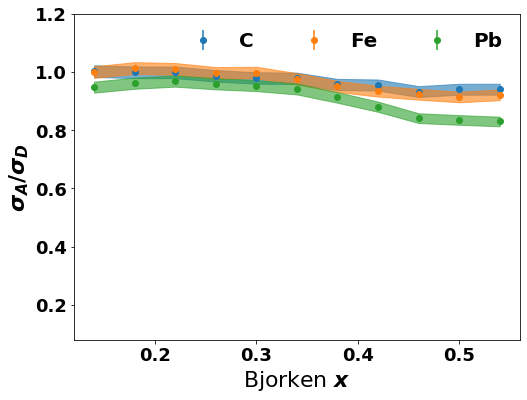

<Figure size 1152x864 with 0 Axes>

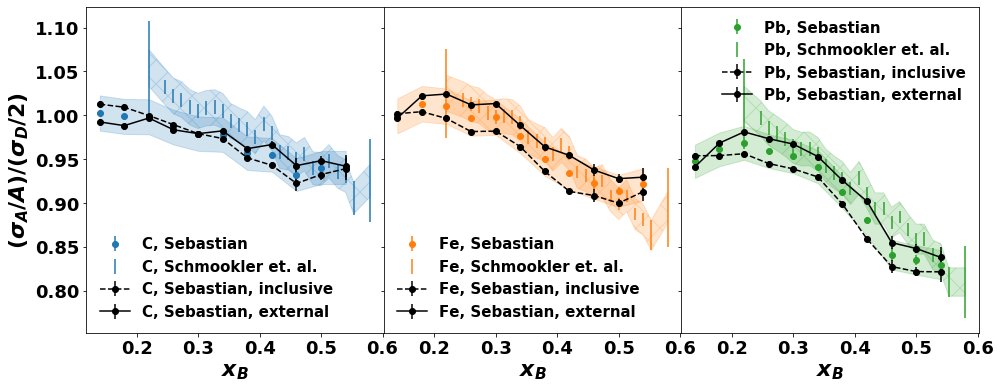

<Figure size 1152x864 with 0 Axes>

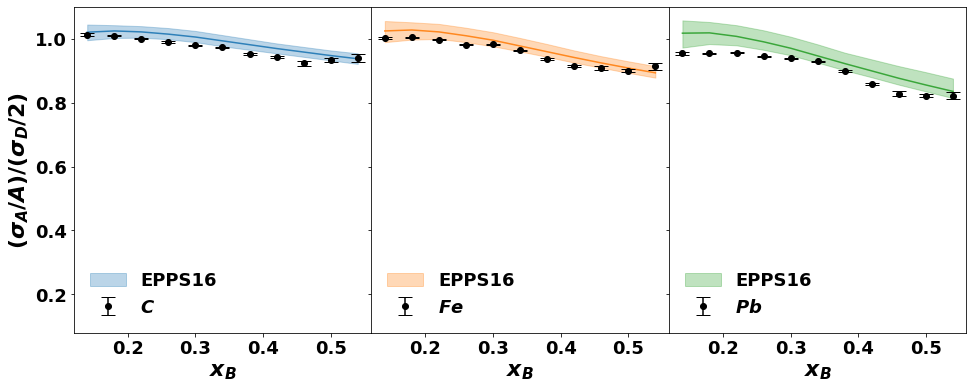

<Figure size 1152x864 with 0 Axes>

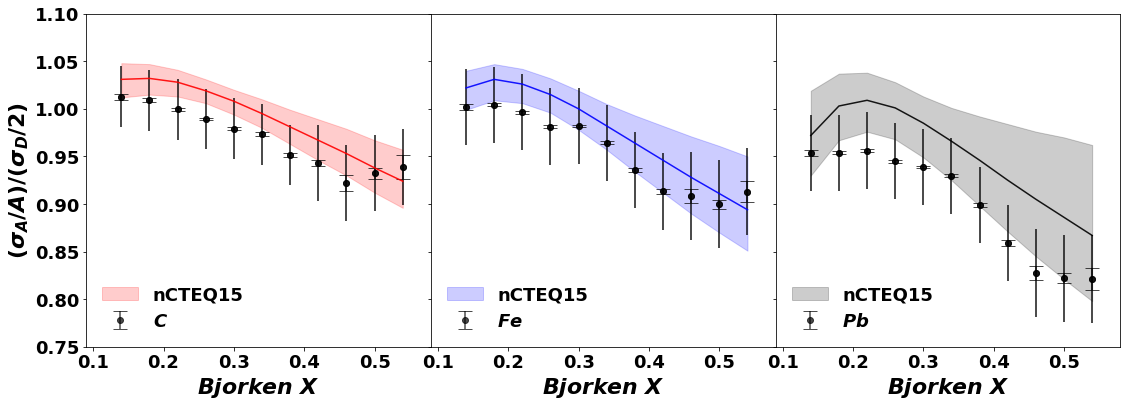

In [2]:
#Carbon
y = {}
erry = {}
y_sys = {}
x_data = np.array([ 0.14,0.18,0.22,0.26,0.3,0.34,0.38,0.42,0.46,0.5,0.54])

x = np.array([ 0.14,0.18,0.22,0.26,0.3,0.34,0.38,0.42,0.46,0.5,0.54])
y['C_external'] = np.array([1.01269*0.98 , 0.998203*0.99 , 0.996826*1.0001 , 0.98352*1.0 , 0.979083*1.0 , 0.973507*1.009 , 0.951525*1.011 , 0.943042*1.025 , 0.922308*1.022 , 0.932446*1.017 , 0.93916*1.003 ])
y['Pb_external'] = np.array([ 0.953903*0.9867 , 0.95404*1.015 , 0.95623*1.026 , 0.9449905*1.03 , 0.938897*1.0301 , 0.9297*1.025 , 0.898736*1.03 , 0.858879*1.05 , 0.827517*1.033 , 0.821817*1.032 , 0.821458*1.02  ])
y['Fe_external'] = np.array([ 1.00179*0.995 , 1.00415*1.018 , 0.99637*1.028 , 0.981458*1.031 , 0.981975*1.032 , 0.964282*1.025 , 0.935957*1.03 , 0.913193*1.045 , 0.908522*1.032 , 0.899843*1.031 , 0.913053*1.018    ])
erry['Fe_external'] = np.array([0.00287365 , 0.00145233 , 0.00131672 , 0.0012838 , 0.00123376 , 0.00142665 , 0.00180622 , 0.0029394 , 0.00716964 , 0.00471396 , 0.0106048  ])
erry['C_external'] = np.array([ 0.00304203 , 0.00158751 , 0.0014663 , 0.00145366 , 0.00142023 , 0.00167251 , 0.00213371 , 0.00350786 , 0.00858236 , 0.00557585 , 0.01221  ])
erry['Pb_external'] =np.array([ 0.00297193 , 0.0015468 , 0.00141706 , 0.00139052 , 0.00135338 , 0.00157598 , 0.00199544 , 0.00320456 , 0.00735309 , 0.00512059 , 0.0111908   ])


x = np.array([ 0.14,0.18,0.22,0.26,0.3,0.34,0.38,0.42,0.46,0.5,0.54])
y['C_inclusive'] = np.array([1.01269 , 1.009203 , 0.9996826 , 0.989352 , 0.979083 , 0.973507 , 0.951525 , 0.943042 , 0.922308 , 0.932446 , 0.93916 ])

y['Pb_inclusive'] = np.array([ 0.953903 , 0.95404 , 0.95623 , 0.9449905 , 0.938897 , 0.9297 , 0.898736 , 0.858879 , 0.827517 , 0.821817 , 0.821458  ])
erry['Pb_inclusive'] =np.array([  0.00360086 , 0.00183763 , 0.00165862 , 0.00156597 , 0.00148517 , 0.00167876 , 0.00211614 , 0.0033511 , 0.00739443 , 0.00533414 , 0.0117663  ])
erry['C_inclusive'] = np.array([ 0.00370786 , 0.00190198 , 0.00173334 , 0.00165687 , 0.00157841 , 0.00178995 , 0.00227449 , 0.00368508 , 0.00863522 , 0.00583053 , 0.0129134    ])
y['Fe_inclusive'] = np.array([ 1.00179 , 1.00415 , 0.99637 , 0.981458 , 0.981975 , 0.964282 , 0.935957 , 0.913193 , 0.908522 , 0.899843 , 0.913053    ])
erry['Fe_inclusive'] = np.array([ 0.00347509 , 0.00171883 , 0.00153366 , 0.00143941 , 0.00134832 , 0.00151553 , 0.00190727 , 0.00305914 , 0.00719938 , 0.00489239 , 0.0111235 ])

diff = {}
syst_total = {} 
average = {} 

y_sys['C']=np.array([ 3.2 , 3.2 , 3.2 , 3.2 , 3.2 , 3.2 , 3.2 ,4,4,4,4    ])
y_sys['Fe']=np.array([ 4,4,4,4,4,4,4,4, 4.6,4.6,4.6    ])
y_sys['Pb']=np.array([ 4,4,4,4,4,4,4,4, 4.6,4.6,4.6    ])

for target in ['C','Fe','Pb']:
    y[target] = (y['%s_external'%target] + y['%s_inclusive'%target])/2.0
    average[target] = (y['%s_external'%target] + y['%s_inclusive'%target])/2.0
    erry[target] = (erry['%s_external'%target] + erry['%s_inclusive'%target])/2.0
    diff[target] = np.abs((y['%s_external'%target] - y['%s_inclusive'%target])/2.0)
    #syst_total[target] = np.sqrt(np.power(diff[target],2.0) + np.power(0.025*y[target],2.0))
    syst_total[target] = np.sqrt(np.power(0.01*y_sys[target]  ,2.0))
    #print(target)
    #print (100*diff[target])


fig = plt.figure(figsize=(8,6))


colors = {}
colors['C'] = '#1f77b4'
colors['Fe'] = '#ff7f0e'
colors['Pb']=  '#2ca02c'



for target in ['C','Fe','Pb']:
    plt.errorbar(x,y[target],yerr=erry[target],color=colors[target],fmt='o',label=target)
    plt.fill_between(x, 1.02*y[target],0.98*y[target],color=colors[target],alpha=0.6)

plt.locator_params(nbins=6)
plt.ylim([0.08,1.2])
#plt.xlim([0.2,0.6])

plt.xlabel('Bjorken $x$',fontsize=22)
plt.ylabel('$\sigma_{A}/\sigma_{D}$',fontsize=22)
plt.legend(loc='best',ncol=3,frameon=False)


import csv

y_data = {}
erry_data = {}

x_data = []
y_data['C'] = []
erry_data['C'] = []
y_data['Al'] = []
erry_data['Al'] = []
y_data['Fe'] = []
erry_data['Fe'] = []
y_data['Pb'] = []
erry_data['Pb'] = []

pdf = {}
pdf['C'] = []
pdf['Fe'] = []
pdf['Pb'] = []

errpdf_plus = {}
errpdf_minus = {}

errpdf_plus['C'] = []
errpdf_plus['Fe'] = []
errpdf_plus['Pb'] = []

errpdf_minus['C'] = []
errpdf_minus['Fe'] = []
errpdf_minus['Pb'] = []


with open('EPPSData.dta') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        #print(row)
        row = row[0].split()
        #print row[0], ' ', row[1]

       # x_data.append(row[0])
        x_data.append(float(row[0]))
        y_data['C'].append(float(row[1]))
        erry_data['C'].append(float(row[2]))


        pdf['C'].append(float(row[6])) 
        errpdf_minus['C'].append(float(row[7]))
        errpdf_plus['C'].append(float(row[8]))
        
        y_data['Al'].append(float(row[9]))
        erry_data['Al'].append(float(row[10]))
        
        y_data['Fe'].append(float(row[17]))
        erry_data['Fe'].append(float(row[18]))
        
        
        pdf['Fe'].append(float(row[22])) 
        errpdf_minus['Fe'].append(float(row[23]))
        errpdf_plus['Fe'].append(float(row[24]))
                
        
        y_data['Pb'].append(float(row[25]))
        erry_data['Pb'].append(float(row[26]))
        
                
        pdf['Pb'].append(float(row[30])) 
        errpdf_minus['Pb'].append(float(row[31]))
        errpdf_plus['Pb'].append(float(row[32]))

x_pdf = [0.140,0.180,0.220,0.260, 0.300,0.340,0.380,0.420,0.460,0.500,0.540 ]
pdf = {}
pdf['C_EPPS16'] = [1.020 ,1.024, 1.021,1.014,1.005,0.993,0.981 ,0.969,0.958, 0.947,0.937]
pdf['Fe_EPPS16'] = [1.024,1.027,1.021,1.009,0.995,0.977, 0.959,0.941,0.924,0.908,0.893]
pdf['Pb_EPPS16'] = [ 1.017 , 1.018,1.007,0.990, 0.970, 0.946 ,0.922,0.899,0.876,0.855,0.835 ]

errpdf_plus = {}
errpdf_minus = {}

errpdf_plus['C_EPPS16'] = [0.024,0.018,0.018,0.019,0.019,0.018,0.017,0.016,0.016,0.016,0.017]
errpdf_plus['Fe_EPPS16'] = [0.031,0.024,0.025,0.025,0.025,0.025,0.024,0.022,0.021,0.021,0.021]
errpdf_plus['Pb_EPPS16'] = [0.040,0.034,0.035,0.036,0.036,0.036,0.034,0.036,0.038,0.040,0.040]

errpdf_minus['C_EPPS16'] = [0.025,0.022 ,0.018,0.016,0.016,0.017,0.016,0.015,0.015,0.015,0.016]
errpdf_minus['Fe_EPPS16'] = [0.035,0.030,0.022,0.020,0.019,0.017,0.016,0.016,0.015,0.015,0.015]
errpdf_minus['Pb_EPPS16'] = [0.045,0.035,0.028,0.025, 0.022,0.021,0.021,0.020 ,0.020 ,0.020 ,0.021]

for i,target in enumerate(['C_EPPS16','Fe_EPPS16','Pb_EPPS16']):
    pdf[target] = np.array(pdf[target])
    errpdf_minus[target] = np.array(errpdf_minus[target])
    errpdf_plus[target] = np.array(errpdf_plus[target])


pdf['Pb'] = [ 0.972,1.003,1.009,1.001,0.985,0.966,0.946,0.925,0.905,0.886,0.867]
errpdf_minus['Pb'] = [0.042, 0.036,0.033, 0.033,0.036,0.041,0.048,0.054,0.060,0.065,0.069]
errpdf_plus['Pb'] = [0.047,0.034,0.029,0.027,0.028,0.035,0.046,0.059,0.071,0.084,0.095]


pdf['Fe'] = [ 1.022,1.031,1.026,1.015,1.000,0.982,0.964,0.946,0.928,0.911,0.894]
errpdf_minus['Fe'] = [0.023,0.022,0.020,0.019,0.022,0.025,0.030,0.034,0.038,0.041,0.043]
errpdf_plus['Fe'] = [0.018,0.016,0.016,0.017,0.019,0.023,0.029,0.036,0.043,0.050,0.056]

pdf['C'] = [ 1.031, 1.032, 1.028, 1.019, 1.008, 0.995, 0.981, 0.967, 0.953, 0.938, 0.924] 
errpdf_minus['C'] = [0.019, 0.017,0.015,0.013,0.014,0.015,0.018,0.021,0.023,0.026,0.028]
errpdf_plus['C'] = [0.017,0.015,0.013,0.012,0.012,0.015,0.018,0.022,0.026,0.029,0.033]


for i,target in enumerate(['C','Fe','Pb']):
    pdf[target] = np.array(pdf[target])
    errpdf_minus[target] = np.array(errpdf_minus[target])
    errpdf_plus[target] = np.array(errpdf_plus[target])


fig = plt.figure(figsize=(16,12))


fig, axs = plt.subplots(1, 3,sharex=True, sharey=True,figsize=(16,6),gridspec_kw={'hspace': 0, 'wspace':0})

for i,target in enumerate(['C','Fe','Pb']):
    axs[i].errorbar(x,y[target],yerr=erry[target],color=colors[target],fmt='o',label='%s, Sebastian'%target)
    axs[i].errorbar(x_data,y_data[target],yerr=erry_data[target],color=colors[target],fmt='-',ls='None',label='%s, Schmookler et. al.'%target)
    axs[i].fill_between(x, 1.02*y[target],0.98*y[target],color=colors[target],alpha=0.2)
    axs[i].fill_between(x_data,np.multiply(y_data[target],1.02),np.multiply(y_data[target],0.98),color=colors[target],alpha=0.2,hatch="X")
    axs[i].errorbar(x,y['%s_inclusive'%target],yerr=erry[target],color='black',fmt='--o',label='%s, Sebastian, inclusive'%target)
    axs[i].errorbar(x,y['%s_external'%target],yerr=erry[target],color='black',fmt='-o',label='%s, Sebastian, external'%target)
    axs[i].xaxis.set_label_text('$x_{B}$',fontsize=22)
    axs[i].legend(loc='best',ncol=1,frameon=False,fontsize=15)


axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$',fontsize=22)
#plt.legend(loc='best',ncol=1,frameon=False,fontsize=15)
    #plt.fill_between(x, 1.02*y[target],0.98*y[target],color=colors[target],alpha=0.6)

fig = plt.figure(figsize=(16,12))

label = {} 

label['C'] = '$C$'
label['Fe'] = '$Fe$'
label['Pb'] = '$Pb$'
fig, axs = plt.subplots(1, 3,sharex=True, sharey=True,figsize=(16,6),gridspec_kw={'hspace': 0, 'wspace':0})


for i,target in enumerate(['C','Fe','Pb']):
   
    
    axs[i].fill_between(x_pdf,pdf['%s_EPPS16'%target]-errpdf_minus['%s_EPPS16'%target],pdf['%s_EPPS16'%target]+errpdf_plus['%s_EPPS16'%target],color=colors[target],alpha=0.3,label='EPPS16')#,hatch="X")    
    axs[i].plot(x_pdf,pdf['%s_EPPS16'%target],'-',color=colors[target],alpha=0.9)#,hatch="X")    
    axs[i].errorbar(x,y['%s_inclusive'%target],yerr=erry['%s_inclusive'%target],color='black',fmt='o',label=label[target],capsize=7,capthick=1)
    axs[i].xaxis.set_label_text('$x_{B}$',fontsize=22)
    axs[i].legend(loc='best',ncol=1,frameon=False,fontsize=18)

axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$',fontsize=22)
axs[0].set_ylim([0.08,1.1])

#plt.tight_layout()
fig = plt.figure(figsize=(16,12))

label = {} 
label['C'] = '$C$'
label['Fe'] = '$Fe$'
label['Pb'] = '$Pb$'

colors = {}
colors['C'] = 'red'
colors['Fe'] = 'blue'
colors['Pb']=  'black'

colors2 = {}
colors2['C'] = 'orange'
colors2['Fe'] = 'cyan'
colors2['Pb']=  'purple'

fig, axs = plt.subplots(1, 3,sharex=True, sharey=True,figsize=(16,6),gridspec_kw={'hspace': 0, 'wspace':0})

for i,target in enumerate(['C','Fe','Pb']):
    pdf[target] = np.array(pdf[target])
    errpdf_minus[target] = np.array(errpdf_minus[target])
    errpdf_plus[target] = np.array(errpdf_plus[target])

for i,target in enumerate(['C','Fe','Pb']):
   
    
    #plot data (stat error only)
    axs[i].errorbar(x,y['%s_inclusive'%target],yerr=erry[target],color='black',fmt='o',label='%s'%label[target],capsize=7,capthick=1, alpha=0.7)
    #axs[i].errorbar(x,y['%s_external'%target],yerr=erry[target],color=colors2[target],fmt='o',label='%s, EXTERNAL'%label[target],capsize=7,capthick=1, alpha=0.7)
    #plot data (systematic = 2.5% plus diff inclusive - exclusive results )
    axs[i].errorbar(x, y['%s_inclusive'%target], yerr=syst_total[target], fmt='o', color='black',  ecolor='black', elinewidth=2, capsize=0,capthick=0, alpha=0.7);
    #axs[i].errorbar(x, y['%s_external'%target], yerr=syst_total[target], fmt='o', color=colors2[target],  ecolor=colors2[target], elinewidth=2, capsize=0,capthick=0, alpha=0.7);
    #axs[i].errorbar(x,average['%s'%target],0,color='green',fmt='-',label='%s, Average'%label[target],capsize=7,capthick=1,lw=2, alpha=0.7)
    #axs[i].errorbar(x,average['%s'%target] , yerr=syst_total[target], fmt='o', color='green',  ecolor='green', elinewidth=2, capsize=0,capthick=0, lw=2, alpha=0.7);
    
    #plot PDF
    axs[i].fill_between(x_pdf,pdf['%s'%target]-errpdf_minus['%s'%target],pdf['%s'%target]+errpdf_plus['%s'%target],color=colors[target],alpha=0.2,label='nCTEQ15')#,hatch="X")    
    axs[i].plot(x_pdf,pdf['%s'%target],'-',color=colors[target],alpha=0.9)#,hatch="X")    

    axs[i].xaxis.set_label_text('$Bjorken$ $X$',fontsize=22)
    axs[i].legend(loc='lower left',ncol=1,frameon=False,fontsize=18)

axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$',fontsize=22)
axs[0].set_ylim([0.75,1.1])
axs[0].set_xlim([0.09,0.58])
axs[0].set_xticks([0.1,0.2,0.3,0.4,0.5])
#axs[0].grid(True, axis='y',color='gainsboro', linestyle='dashed')
#axs[1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
#axs[2].grid(True, axis='y',color='gainsboro', linestyle='dashed')

#axs[0].grid(True, axis='x',color='gainsboro', linestyle='dashed')
#axs[1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
#axs[2].grid(True, axis='x',color='gainsboro', linestyle='dashed')

#axs[0].set_xscale('log')


plt.tight_layout()
plt.savefig('test_EMCratio_withnCTEQ15.pdf', bbox_inches='tight')




In [3]:
def applyCut(inputDataframe, cut, text=None):
    nbeforecut = inputDataframe.shape[0]
    if nbeforecut>0:
        cutDataframe = inputDataframe.query(cut)
        if text:
            print (text, cutDataframe.shape[0], ' (%2.2f '%(100.0*cutDataframe.shape[0]/nbeforecut), '%)')
    return cutDataframe
def applyHadronCuts(fullDataframe,name='default',isMC=False): 
    dataframe = fullDataframe
    print ('Entries before cut ', dataframe.shape[0])
    dataframe.eval('inelasticity = Nu/5.014', inplace=True)
    dataframe.eval('E = z*Nu', inplace=True)
    dataframe.eval('P = sqrt(E*E-0.1396*0.1396)', inplace=True)
    dataframe.eval('Pkaon = sqrt(E*E-0.493677*0.493677)', inplace=True)
    dataframe.eval('T = E-0.1396', inplace=True)
    dataframe.eval('pt2 = pt*pt', inplace=True)
    dataframe = applyCut(dataframe, 'Q2>1.0 and Q2<4', ' 1.0 <Q2<4')
    dataframe = applyCut(dataframe, 'Nu>2.2 and Nu<4.25',  ' 2.2 <Nu<4.25')
    dataframe = applyCut(dataframe, 'P <3.7 ', 'P<3.7 ')
    dataframe = applyCut(dataframe, 'P >0.2 ', 'P>0.2 ')
    #dataframe = applyCut(dataframe, 'W>2.0',  'W>2.0')
    dataframe = applyCut(dataframe, 'inelasticity<0.85','inelasticity < 0.85')
    return dataframe

def applyElectronCuts(fullDataframe,name='default',isMC=False): 
    dataframe = fullDataframe
    print ('Entries before cut ', dataframe.shape[0])
    dataframe.eval('inelasticity = Nu/5.014', inplace=True)
    dataframe = applyCut(dataframe, 'Q2>1.0 and Q2<4.00', ' 1.0 <Q2<4.00')
    dataframe = applyCut(dataframe, 'Nu>2.2 and Nu<4.25',  ' 2.2 <Nu<4.25')
    #dataframe = applyCut(dataframe, 'W>2.0',  'W>2.0')
    dataframe = applyCut(dataframe, 'inelasticity<0.85','inelasticity < 0.85')
    return dataframe

def getRatio(df_A,df_D,df_electron_A,df_electron_D, variable='z',event_cut='Q2>1.0',mybins=None,hadron_cut = ' and P>0',minz=0.05,maxz=1.0,nbins=9):
    
    norm_A = df_electron_A.query(event_cut).shape[0]
    norm_D = df_electron_D.query(event_cut).shape[0]
    y_A, x_conditional = np.histogram(df_A.query(event_cut+hadron_cut)[variable],bins=mybins)
    y_D, x_conditional = np.histogram(df_D.query(event_cut+hadron_cut)[variable],bins=mybins)
    x_conditional = (x_conditional[1:] + x_conditional[:-1])/2.0
    err_A = np.true_divide(np.sqrt(y_A),y_A)
    err_D = np.true_divide(np.sqrt(y_D),y_D)
    y_A = np.true_divide(y_A,norm_A)
    y_D = np.true_divide(y_D,norm_D)
    ratio_conditional = np.true_divide(y_A,y_D)
    error_conditional = np.multiply(ratio_conditional, np.sqrt(np.power(err_A,2.0) + np.power(err_D,2.0)))
    
    return ratio_conditional,error_conditional,x_conditional

def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df


In [4]:
df={}

for target in ['D','C','Fe','Pb']:
    #GiBUU
    print (target)
    print ('hadron')
    #df['GiBUU_%s_hadron'%target]= getdatainChunks('/home/miguel/eg2dihadron/GiBUU_SingleHadron_%s.root'%target, '%s_hadron'%target)
    df['GiBUU_%s_hadron'%target]= getdatainChunks('/home/seba/singleHadron/GiBUU_%s.root'%target, '%s_hadron'%target)
    print ('electron')
    #df['GiBUU_%s_electron'%target]= getdatainChunks('/home/miguel/eg2dihadron/GiBUU_SingleHadron_%s.root'%target,'%s_electron'%target)
    df['GiBUU_%s_electron'%target]= getdatainChunks('/home/seba/singleHadron/GiBUU_%s.root'%target,'%s_electron'%target)
    
print (df.keys())



D
hadron
electron
C
hadron
electron
Fe
hadron
electron
Pb
hadron
electron
dict_keys(['GiBUU_D_hadron', 'GiBUU_D_electron', 'GiBUU_C_hadron', 'GiBUU_C_electron', 'GiBUU_Fe_hadron', 'GiBUU_Fe_electron', 'GiBUU_Pb_hadron', 'GiBUU_Pb_electron'])


In [5]:
for target in ['D','C','Fe','Pb']:
    print (target)
    df['GiBUU_%s_electron'%target] = applyElectronCuts(df['GiBUU_%s_electron'%target], isMC=True)
    df['GiBUU_%s_hadron'%target] = applyHadronCuts(df['GiBUU_%s_hadron'%target], isMC=True)
    print (' ')


D
Entries before cut  8363332
 1.0 <Q2<4.00 8358878  (99.95  %)
 2.2 <Nu<4.25 8358878  (100.00  %)
inelasticity < 0.85 8358878  (100.00  %)
Entries before cut  27216969
 1.0 <Q2<4 27204025  (99.95  %)
 2.2 <Nu<4.25 27204025  (100.00  %)
P<3.7  26212135  (96.35  %)
P>0.2  24529369  (93.58  %)
inelasticity < 0.85 24529369  (100.00  %)
 
C
Entries before cut  10000001
 1.0 <Q2<4.00 9994629  (99.95  %)
 2.2 <Nu<4.25 9994629  (100.00  %)
inelasticity < 0.85 9994629  (100.00  %)
Entries before cut  40923508
 1.0 <Q2<4 40902389  (99.95  %)
 2.2 <Nu<4.25 40902389  (100.00  %)
P<3.7  40117323  (98.08  %)
P>0.2  36362427  (90.64  %)
inelasticity < 0.85 36362427  (100.00  %)
 
Fe
Entries before cut  5596315
 1.0 <Q2<4.00 5593261  (99.95  %)
 2.2 <Nu<4.25 5593261  (100.00  %)
inelasticity < 0.85 5593261  (100.00  %)
Entries before cut  28044179
 1.0 <Q2<4 28028732  (99.94  %)
 2.2 <Nu<4.25 28028732  (100.00  %)
P<3.7  27722050  (98.91  %)
P>0.2  24581097  (88.67  %)
inelasticity < 0.85 24581097  (

# Integrated ratios as a function of Z
### **For both charged pions**
### **Comparison with GiBUU and models**

In [6]:
import csv

FF = {}

errFF_plus = {}
errFF_minus = {}


FF['C_pim'] = []
FF['Fe_pim'] = []
FF['Pb_pim'] = []


errFF_plus['C_pim'] = []
errFF_plus['Fe_pim'] = []
errFF_plus['Pb_pim'] = []

errFF_minus['C_pim'] = []
errFF_minus['Fe_pim'] = []
errFF_minus['Pb_pim'] = []

x_FF = []

with open('/home/miguel/clas_for_miguel_68CL_minus.txt') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        row = row[0].split()
        #print(row[2])
        x_FF.append(float(row[2]))
        FF['C_pim'].append(float(row[3]))
        errFF_minus['C_pim'].append(float(row[4]))
        errFF_plus['C_pim'].append(float(row[5]))

        FF['Fe_pim'].append(float(row[6]))
        errFF_minus['Fe_pim'].append(float(row[7]))
        errFF_plus['Fe_pim'].append(float(row[8]))

        FF['Pb_pim'].append(float(row[9]))
        errFF_minus['Pb_pim'].append(float(row[10]))
        errFF_plus['Pb_pim'].append(float(row[11]))

FF['C_pip'] = []
FF['Fe_pip'] = []
FF['Pb_pip'] = []

errFF_plus['C_pip'] = []
errFF_plus['Fe_pip'] = []
errFF_plus['Pb_pip'] = []

errFF_minus['C_pip'] = []
errFF_minus['Fe_pip'] = []
errFF_minus['Pb_pip'] = []

x_FF = []

with open('/home/miguel/clas_for_miguel_68CL_plus.txt') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        #print(row)
        row = row[0].split()
        #print(row)
        x_FF.append(float(row[2]))
        FF['C_pip'].append(float(row[3]))
        errFF_minus['C_pip'].append(float(row[4]))
        errFF_plus['C_pip'].append(float(row[5]))

        FF['Fe_pip'].append(float(row[6]))
        errFF_minus['Fe_pip'].append(float(row[7]))
        errFF_plus['Fe_pip'].append(float(row[8]))

        FF['Pb_pip'].append(float(row[9]))
        errFF_minus['Pb_pip'].append(float(row[10]))
        errFF_plus['Pb_pip'].append(float(row[11]))


In [7]:
x_data = np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95])
y_data = {}
erry_data  ={}

y_data['pip_C'] = np.array([1.14377 , 0.991528 , 0.902358 , 0.853406 , 0.837642 , 0.828422 , 0.811364 , 0.746689 , 0.76447 , 0.674661])
erry_data['pip_C'] = np.array([0.00311613 , 0.00157512 , 0.001843 , 0.00229271 , 0.00291008 , 0.00359768 , 0.00431984 , 0.00496413 , 0.00650761 , 0.00752696])
y_data['pip_Fe'] = np.array([1.16785 , 0.914393 , 0.758705 , 0.683655 , 0.642149 , 0.625825 , 0.598528 , 0.540816 , 0.527262 , 0.431077])
erry_data['pip_Fe'] = np.array([0.00285128 , 0.00131102 , 0.00141581 , 0.00169536 , 0.00206393 , 0.00249893 , 0.00292176 , 0.00328728 , 0.00410943 , 0.00449481 ])
y_data['pip_Pb'] = np.array([0.958606 , 0.719983 , 0.57628 , 0.503447 , 0.464043 , 0.449215 , 0.430703 , 0.386296 , 0.374475 , 0.269722  ])
erry_data['pip_Pb'] = np.array([0.00273899 , 0.00124261 , 0.00132827 , 0.00159042 , 0.00194019 , 0.00237144 , 0.00283215 , 0.00326646 , 0.00418617 , 0.0044482])

x_data_pim = np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75])

y_data['pim_C'] = np.array([ 1.14172 , 0.992301 , 0.904382 , 0.858762 , 0.814561 , 0.796786 , 0.765917 , 0.761169])
erry_data['pim_C'] = np.array([0.0054489 , 0.00266114 , 0.00303142 , 0.00430438 , 0.00651458 , 0.00980551 , 0.0135989 , 0.0204994 ])

y_data['pim_Fe'] = np.array([1.18926 , 0.949964 , 0.802236 , 0.717104 , 0.656101 , 0.61487 , 0.593029 , 0.601603])
erry_data['pim_Fe'] = np.array([0.00532453 , 0.00237637 , 0.00250118 , 0.00334693 , 0.00490003 , 0.00705277 , 0.00966497 , 0.0145691 ])

y_data['pim_Pb'] = np.array([1.07461 , 0.826597 , 0.668954 , 0.571658 , 0.511301 , 0.481163 , 0.470438 , 0.444172]) 
erry_data['pim_Pb'] = np.array([0.00523426 , 0.00230227 , 0.00241594 , 0.00321067 , 0.00467534 , 0.00683594 , 0.00997877 , 0.0146861 ])


C
[1.14377  0.991528 0.902358 0.853406 0.837642 0.828422 0.811364 0.746689
 0.76447  0.674661]
[0.05156389 0.04464655 0.04064791 0.03847165 0.03780606 0.03745219
 0.03676604 0.03396572 0.03501126 0.03127889]
Fe
[1.16785  0.914393 0.758705 0.683655 0.642149 0.625825 0.598528 0.540816
 0.527262 0.431077]
[0.05263054 0.04116857 0.03417107 0.03081115 0.02897032 0.02827278
 0.02709177 0.02455773 0.02408003 0.0199124 ]
Pb
[0.958606 0.719983 0.57628  0.503447 0.464043 0.449215 0.430703 0.386296
 0.374475 0.269722]
[0.04322414 0.03242306 0.02596659 0.02271087 0.02097188 0.0203533
 0.01958747 0.01768755 0.01736355 0.01292692]


Text(0, 0.5, '$R_{h}$')

<Figure size 1152x864 with 0 Axes>

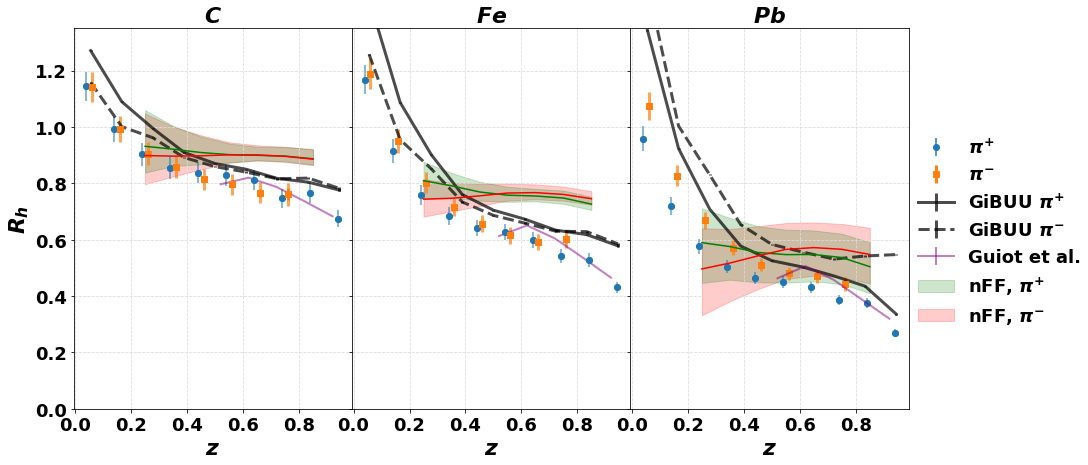

In [8]:
fig = plt.figure(figsize=(16,12))
label = {} 
label['C'] = '$C$'
label['Fe'] = '$Fe$'
label['Pb'] = '$Pb$'
colors = {}
colors['C'] = '#1f77b4'
colors['C_pim'] = '#ff7f0e'
colors['Fe']=  '#2ca02c'
colors['Fe_pim'] = '#d62728'
colors['Pb'] = '#9467bd'
colors['Pb_pim']=  '#8c564b'
sysError=0.045
fig, axs = plt.subplots(1, 3,sharex=True, sharey=True,figsize=(16,7),gridspec_kw={'hspace': 0, 'wspace':0})

for i,target in enumerate(['C','Fe','Pb']):

    r_pip, err,x = getRatio(df['GiBUU_%s_hadron'%target].query('pid==211'), 
                            df['GiBUU_D_hadron'].query('pid==211'), 
                        df['GiBUU_%s_electron'%target], df['GiBUU_D_electron'],
                      mybins=np.linspace(0.0,1.0,10))
    #print('target:',target,' : ',err)
    
    lgibuu_pip = axs[i].errorbar(x,y=r_pip,yerr=err,fmt='-',color='black',lw=3,alpha=0.7,
                                 label='GiBUU $\pi^{+}$')

    r_pim, err,x = getRatio(df['GiBUU_%s_hadron'%target].query('pid==-211'), 
                            df['GiBUU_D_hadron'].query('pid==-211'), 
                        df['GiBUU_%s_electron'%target], df['GiBUU_D_electron'],
                        mybins=np.linspace(0.0,1.0,10))
    #print('x:',x)
    #print('target:',target,' : ',err)
    lgibuu_pim = axs[i].errorbar(x,y=r_pim,yerr=err,fmt='--',color='black',lw=3,alpha=0.7,
                                 label='GiBUU $\pi^{-}$')

        #pi+
    lpip = axs[i].errorbar(x_data-0.01,y_data['pip_%s'%target],yerr=erry_data['pip_%s'%target],
                           color='#1f77b4',fmt='o',ms=6,alpha=0.99,label='$\pi^{+}$')
    
    totalerror = np.sqrt(np.power(np.array(erry_data['pip_%s'%target]),2) + 
                         np.power(np.array(y_data['pip_%s'%target])*sysError,2))

    axs[i].errorbar(x_data-0.01,y_data['pip_%s'%target],yerr=totalerror,
                    color='#1f77b4',fmt='o',ms=6,alpha=0.7)  
    print(target)
    print(y_data['pip_%s'%target])
    print(totalerror)
    #print(0.045*y_data['pip_%s'%target]/totalerror)
    
    #axs[i].errorbar(x_data-0.01,y_data['pip_%s'%target],yerr=0.045*y_data['pip_%s'%target],
    #                color='#1f77b4',fmt='o',ms=6,alpha=0.7)
    #pi-
   
    lpim = axs[i].errorbar(x_data_pim+0.01 ,y_data['pim_%s'%target],yerr=erry_data['pim_%s'%target],
                           color='#ff7f0e',fmt='s',
                           lw=3,ms=6,alpha=0.99,label='$\pi^{-}$')
    totalerror = np.sqrt(np.power(np.array(erry_data['pim_%s'%target]),2) + 
                         np.power(np.array(y_data['pim_%s'%target])*sysError,2))

    axs[i].errorbar(x_data_pim+0.01 ,y_data['pim_%s'%target],yerr= totalerror ,
                    color='#ff7f0e',fmt='s',lw=3,ms=6,alpha=0.7)

    axs[i].xaxis.set_label_text('$z$',fontsize=22)

    
axs[0].set_title('$C$',fontsize=22)
axs[1].set_title('$Fe$',fontsize=22)
axs[2].set_title('$Pb$',fontsize=22)
axs[0].set_ylim([0.0,1.35])

lben = axs[2].errorbar(x=np.array([0.52,0.62,0.72,0.82,0.92]),
                       y=np.array([0.463033,0.506209,0.458207,0.388899,0.319686]),
                       yerr=np.zeros(len(np.array([0.52,0.62,0.72,0.82,0.92]))),
                       label='Guiot et al.',color='purple',lw=2,alpha=0.5)
axs[1].plot(np.array([0.52,0.62,0.72,0.82,0.92]),np.array([0.613186,0.650574,0.604122,0.535936,0.465189]),
            label='Guiot et al.',color='purple',lw=2,alpha=0.5)
axs[0].plot(np.array([0.52,0.62,0.72,0.82,0.92]),np.array([0.796494,0.820125,0.786835,0.736159,0.682875]), 
            label ='Guiot et al.',color='purple',lw=2,alpha=0.5)

for i,target in enumerate(['C','Fe','Pb']):
    axs[i].errorbar(x_FF[2:9],FF['%s_pip'%target][2:9],label='pi+ %s'%target,color='green')
    axs[i].errorbar(x_FF[2:9],FF['%s_pim'%target][2:9],label ='pi- %s'%target,color='red')
    lzurita_pim = axs[i].fill_between(x_FF[2:9],errFF_minus['%s_pim'%target][2:9],
                                      errFF_plus['%s_pim'%target][2:9],alpha=0.2,
                                      label='nFF, $\pi^{-}$',color='red')                 
    lzurita_pip = axs[i].fill_between(x_FF[2:9],errFF_minus['%s_pip'%target][2:9],
                                      errFF_plus['%s_pip'%target][2:9],alpha=0.2,
                                      label='nFF, $\pi^{+}$',color='green')


for i in range(0,3):    
    axs[i].grid(True, axis='x',color='gainsboro', linestyle='dashed')
    axs[i].grid(True, axis='y',color='gainsboro', linestyle='dashed')
handles = [lpip,lpim, lgibuu_pip, lgibuu_pim,lben,lzurita_pip,lzurita_pim]


fig.legend(handles = handles,     # The line objects,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.01,    # Small spacing around legend box
           title="" , # Title for the legend
           frameon=False,
           fontsize=18
          )

plt.subplots_adjust(right=0.85)

axs[0].yaxis.set_label_text('$R_{h}$',fontsize=22)
#plt.savefig('Rh_data_gibuu_3panels.pdf', bbox_inches='tight')

# 3D ratios as a function of Z
**For both charged pions**

In [9]:
file_pip = TFile.Open('3D_Rh_piPlus_Nu_Q2_bins.root')
file_pim = TFile.Open('3D_Rh_piMinus_Nu_Q2_bins.root')

daya type is:  <class cppyy.gbl.TGraphErrors at 0x6bd0ae0>
daya type is:  <class cppyy.gbl.TGraphErrors at 0x6bd0ae0>
daya type is:  <class cppyy.gbl.TGraphErrors at 0x6bd0ae0>
daya type is:  <class cppyy.gbl.TGraphErrors at 0x6bd0ae0>
daya type is:  <class cppyy.gbl.TGraphErrors at 0x6bd0ae0>
daya type is:  <class cppyy.gbl.TGraphErrors at 0x6bd0ae0>
daya type is:  <class cppyy.gbl.TGraphErrors at 0x6bd0ae0>
daya type is:  <class cppyy.gbl.TGraphErrors at 0x6bd0ae0>
daya type is:  <class cppyy.gbl.TGraphErrors at 0x6bd0ae0>
C_Q2_1bin_nu_1bin
C_Q2_2bin_nu_1bin
C_Q2_3bin_nu_1bin
C_Q2_1bin_nu_2bin
C_Q2_2bin_nu_2bin
C_Q2_3bin_nu_2bin
C_Q2_1bin_nu_3bin
C_Q2_2bin_nu_3bin
C_Q2_3bin_nu_3bin


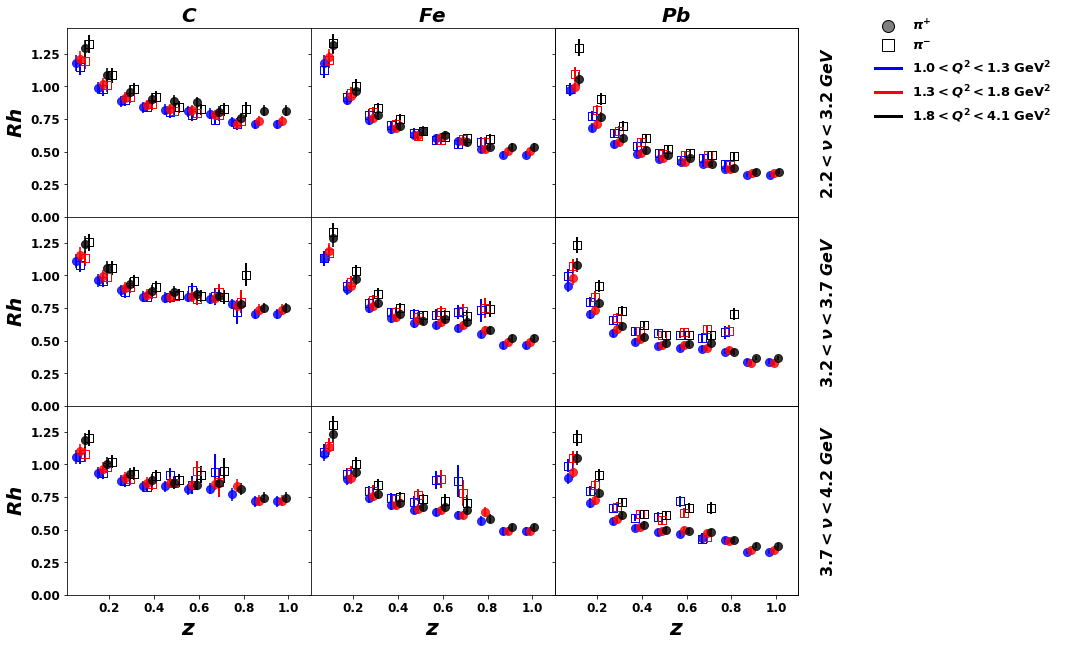

In [10]:

y = {}
x = {} 
erry={}
for nubin in range(1,4):
    for q2bin in range (1,4):
        #Carbon
        data = file_pip.Get('g_q2_%i_nu_%i_C'%(q2bin,nubin))
        print( 'daya type is: ', type(data))
        y['C_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetY(),copy=True)
        x['C_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['C_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetEY(),copy=True)
        #Iron
        data = file_pip.Get('g_q2_%i_nu_%i_Fe'%(q2bin,nubin))
        y['Fe_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetY(),copy=True)
        x['Fe_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Fe_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetEY(),copy=True)
        #Lead
        data = file_pip.Get('g_q2_%i_nu_%i_Pb'%(q2bin,nubin))
        y['Pb_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetY(),copy=True)
        x['Pb_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Pb_pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetEY(),copy=True)

        data = file_pim.Get('g_q2_%i_nu_%i_C'%(q2bin,nubin))
        y['C_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetY(),copy=True)
        x['C_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['C_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetEY(),copy=True)

        data = file_pim.Get('g_q2_%i_nu_%i_Fe'%(q2bin,nubin))
        y['Fe_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetY(),copy=True)
        x['Fe_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Fe_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetEY(),copy=True)

        data = file_pim.Get('g_q2_%i_nu_%i_Pb'%(q2bin,nubin))
        y['Pb_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetY(),copy=True)
        x['Pb_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Pb_pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)] =  np.array(data.GetEY(),copy=True)

fig, axs = plt.subplots(3, 3,sharex=True, sharey=True,figsize=(16,9),gridspec_kw={'hspace': 0, 'wspace':0})
color_list = plt.cm.tab20c(np.linspace(0, 1, 5))

q2label = {} 
q2label['bin_1'] = '$1.0<Q^{2}<1.3$' 
q2label['bin_2'] = '$1.3<Q^{2}<1.8$' 
q2label['bin_3'] = '$1.8<Q^{2}<4.1$' 

nulabel2 = {} 
nulabel2['bin_1'] =  r'$Rh$' 
nulabel2['bin_2'] =  r'$Rh$' 
nulabel2['bin_3'] =  r'$Rh$' 

nulabel = {} 
nulabel['bin_1'] = r'$C$' 
nulabel['bin_2'] =  r'$Fe$' 
nulabel['bin_3'] =  r'$Pb$'

colors = {}
colors['bin_1'] = 'blue'
colors['bin_2'] = 'red'
colors['bin_3']=  'black'

marker = {}
marker['bin_1'] = 'full'
marker['bin_2'] = 'none'
marker['bin_3'] = 'full'
transp_alpha = 0.8 
sysError=0.05
for nubin in range(1,4):
    for q2bin in range(1,4):
        skip = 2
        if(nubin==3): 
            skip = 3
        
        print('C_Q2_%ibin_nu_%ibin'%(q2bin,nubin))
        
        ibin = 'pip_Q2_%ibin_nu_%ibin'%(q2bin,nubin)
        key = 'C_'+ibin
        totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))

        axs[nubin-1,0].errorbar(x[key]+0.02*(q2bin-1),y[key],yerr=totalerror,color=colors['bin_%i'%q2bin],
                                fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                ms=8,label=nulabel['bin_%i'%nubin])
        key = 'Fe_'+ibin
        totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
        axs[nubin-1,1].errorbar(x[key]+0.02*q2bin,y[key],yerr=totalerror,color=colors['bin_%i'%q2bin],
                                fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                ms=8,label=nulabel['bin_%i'%nubin])
        key = 'Pb_'+ibin
        totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
        axs[nubin-1,2].errorbar(x[key]+0.02*q2bin,y[key],yerr=totalerror,color=colors['bin_%i'%q2bin],
                                fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                ms=8,label=nulabel['bin_%i'%nubin])

        #pi minus
        ibin = 'pim_Q2_%ibin_nu_%ibin'%(q2bin,nubin)
        key = 'C_'+ibin
        axs[nubin-1,0].errorbar(x[key][:-skip]+0.02*q2bin,y[key][:-skip],yerr=erry[key][:-skip],
                                color=colors['bin_%i'%q2bin],fmt='s',fillstyle=marker['bin_2'],
                                lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin])
        totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
        #print(totalerror)
        axs[nubin-1,0].errorbar(x[key][:-skip]+0.02*q2bin,y[key][:-skip],yerr=totalerror[:-skip],
                                color=colors['bin_%i'%q2bin],fmt='s',fillstyle=marker['bin_2'],
                                lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin])
        
        key = 'Fe_'+ibin
        axs[nubin-1,1].errorbar(x[key][:-skip]+0.02*q2bin,y[key][:-skip],yerr=erry[key][:-skip],
                                color=colors['bin_%i'%q2bin],fmt='s',fillstyle=marker['bin_2'],
                                lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin])
        totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
        axs[nubin-1,1].errorbar(x[key][:-skip]+0.02*q2bin,y[key][:-skip],yerr=totalerror[:-skip],
                                color=colors['bin_%i'%q2bin],fmt='s',fillstyle=marker['bin_2'],
                                lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin])

        
        key = 'Pb_'+ibin
        axs[nubin-1,2].errorbar(x[key][:-skip]+0.02*q2bin,y[key][:-skip],
                                yerr=erry[key][:-skip],color=colors['bin_%i'%q2bin],fmt='s',
                                fillstyle=marker['bin_2'],lw=2,alpha=transp_alpha+0.2,ms=8,
                                label=nulabel['bin_%i'%nubin])
        totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
        axs[nubin-1,2].errorbar(x[key][:-skip]+0.02*q2bin,y[key][:-skip],yerr=totalerror[:-skip],
                                color=colors['bin_%i'%q2bin],fmt='s',fillstyle=marker['bin_2'],
                                lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin])

        
        axs[2,nubin-1].xaxis.set_label_text('$z$',fontsize=22)
        axs[0,nubin-1].set_ylim([0.0,1.45])
        axs[1,nubin-1].set_ylim([0.0,1.45])
        
        
        #axs[0,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        #axs[1,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        #axs[2,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        #axs[0,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        #axs[1,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        #axs[2,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        
        axs[0,nubin-1].set_xlim([0.01,1.1])
        axs[0,nubin-1].set_xticks(np.arange(0,1.1,0.2))
        axs[0,nubin-1].set_yticks(np.arange(0,1.4,0.25))

    #axs[q2bin-1].legend(loc='best',ncol=3,frameon=False,fontsize=15)
    axs[0,nubin-1].set_title(nulabel['bin_%i'%nubin],fontsize=20)
    
   
from matplotlib.lines import Line2D
from matplotlib.patches import Patch


h3, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='gray', mew=1, alpha=1.0)


h4, = axs[0,0].plot([], ls='none', marker='s', fillstyle='none',
              ms=12, mec='black', mfc='white', mew=1, alpha=1.0)


h5, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='black', mew=1, alpha=1.0)

handles = [ h3,h4,Line2D([0], [0], color=colors['bin_1'], lw=3),
                Line2D([0], [0], color=colors['bin_2'], lw=3),
                Line2D([0], [0], color=colors['bin_3'], lw=3) ,     ]

handles = [handles[i] for i in [0,1,2,3,4]]
line_labels =[r'$\pi^{+}$' , r'$\pi^{-}$', r'$1.0<Q^{2}<1.3$ GeV$^2$',
              r'$1.3<Q^{2}<1.8$ GeV$^2$',r'$1.8<Q^{2}<4.1$ GeV$^2$']
fig.legend(handles=handles,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=1,    # Small spacing around legend box
           #title="  " , # Title for the legend
           frameon=False,
           fontsize=13

          )

plt.subplots_adjust(right=0.76,top=1)
for i in range(0,3):
    axs[i,0].tick_params(axis='y', which='major', labelsize=12)
    axs[2,i].tick_params(axis='both', which='major', labelsize=12)
nulabel3 = {} 
nulabel3['bin_1'] = r'$2.2<\nu<3.2$ $GeV$' 
nulabel3['bin_2'] =  r'$3.2<\nu<3.7$ $GeV$'  
nulabel3['bin_3'] =  r'$3.7<\nu<4.2$ $GeV$'  

ax01 = axs[0,2].twinx()
ax01.tick_params(axis='y', colors='red')  
ax01.yaxis.set_label_text('\n' + nulabel3['bin_1'] ,fontsize=16, color='black')
ax01.set_ylim([3.2,2.21])
ax01.set_yticks(np.arange(3.2,2.21,1))
ax02 = axs[1,2].twinx()
ax02.tick_params(axis='y', colors='red')  
ax02.yaxis.set_label_text( '\n' + nulabel3['bin_2'] ,fontsize=16, color='black')
ax02.set_ylim([3.2,2.21])
ax02.set_yticks(np.arange(3.2,2.21,1))

ax03 = axs[2,2].twinx()
ax03.tick_params(axis='y', colors='red')  
ax03.yaxis.set_label_text('\n' + nulabel3['bin_3'] ,fontsize=16, color='black')
ax03.set_ylim([3.2,2.21])
ax03.set_yticks(np.arange(3.2,2.21,1))

axs[0,0].yaxis.set_label_text(nulabel2['bin_1'],fontsize=20)
axs[1,0].yaxis.set_label_text(nulabel2['bin_2'],fontsize=20)
axs[2,0].yaxis.set_label_text(nulabel2['bin_3'],fontsize=20)
plt.savefig('3D_chargedPions.pdf', bbox_inches='tight')
#plt.savefig('test.png', bbox_inches='tight')

# Cronin-like Ratios

# $\pi^{+}$

In [11]:
file_pip = TFile.Open('cronin_effect_piPlus.root')
file_pip.Print()
ydata = {}
xdata = {} 
erry={}
for zbin in range(4,10):
    #print(zbin)
    data = file_pip.Get('g_zh_%i_C'%(zbin))
    #data.Print()
    ydata['C_pip_%ibin'%(zbin)] =  np.array(data.GetY(),copy=True)
    xdata['C_pip_%ibin'%(zbin)] =  np.array(data.GetX(),copy=True)
    erry['C_pip_%ibin'%(zbin)] =  np.array(data.GetEY(),copy=True)
    del data
    #print(xdata['C_pip_%ibin'%(zbin)])
    data = file_pip.Get('g_zh_%i_Fe'%(zbin))
    #data.Print()
    ydata['Fe_pip_%ibin'%(zbin)] =  np.array(data.GetY(),copy=True)
    xdata['Fe_pip_%ibin'%(zbin)] =  np.array(data.GetX(),copy=True)
    erry['Fe_pip_%ibin'%(zbin)] =  np.array(data.GetEY(),copy=True)
    del data
    data = file_pip.Get('g_zh_%i_Pb'%(zbin))
    #data.Print()
    ydata['Pb_pip_%ibin'%(zbin)] =  np.array(data.GetY(),copy=True)
    xdata['Pb_pip_%ibin'%(zbin)] =  np.array(data.GetX(),copy=True)
    erry['Pb_pip_%ibin'%(zbin)] =  np.array(data.GetEY(),copy=True)
    
 
file_pip.Close()


TFile: name=cronin_effect_piPlus.root, title=, option=READ


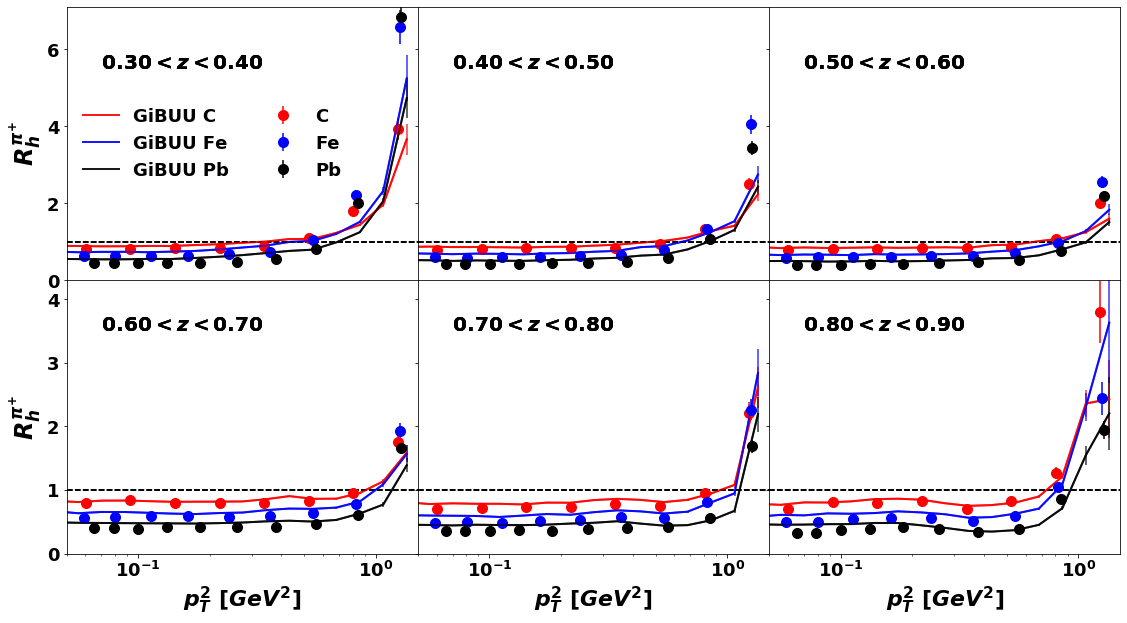

In [12]:
fig, axs = plt.subplots(2, 3,sharex=True,sharey='row',figsize=(16,9),gridspec_kw={'hspace': 0, 'wspace':0})
sysError=0.05

CroninBins_pip = np.logspace(np.log10(0.02),np.log10(1.5),20)#np.array([0.0,0.1,0.25,0.4,0.55,0.75,1.0,1.25])
colors={}
colors['C'] = 'red'#'#1f77b4'
colors['Fe'] = 'blue'#'#ff7f0e'
colors['Pb']=  'black'#'#2ca02c'
for zbin in range(1,10):
    if(zbin==1 or zbin==2 or zbin==3): continue
    col = ((zbin-1)%3)
    row = ((zbin-1)//3)-1
    zquery = ' z>%2.2f and z<%2.2f'%((zbin-1)*0.1,zbin*0.1)
    label = '%2.2f<z<%2.2f'%(((zbin-1)*0.1,zbin*0.1))
    for i,target in enumerate(['C','Fe','Pb']):
    #zquery = ' z>0.3 and z<0.8'
        #print(i)
        r, err,x = getRatio(df['GiBUU_%s_hadron'%target].query('pid==211 and' +zquery), 
                            df['GiBUU_D_hadron'].query('pid==211 and' + zquery),
                            df['GiBUU_%s_electron'%target], df['GiBUU_D_electron'],
                             variable='pt2',mybins=CroninBins_pip)
        #axs[row,col].fill_between(x,r-err,r+err,label='GiBUU %s'%target)
        axs[0,col].set_ylim(bottom=0.0,top=7.1)
        axs[1,col].set_ylim(bottom=0.0,top=4.3)
        axs[row,col].set_xlim(left=0.05,right=1.5)

        ##GIBUU
        axs[row,col].errorbar(x,r,yerr=err,color=colors['%s'%target],lw=2,alpha=0.6)#,ds='steps')
        axs[row,col].plot(x,r,label='GiBUU %s'%target,color=colors['%s'%target],lw=2,alpha=0.9)#,ds='steps')

        
        #totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))

        
        
        ##Plot Data
        totalerror = np.sqrt(np.power(np.array(erry['%s_pip_%ibin'%(target,zbin)]),2) + 
                             np.power(np.array(ydata['%s_pip_%ibin'%(target,zbin)])*sysError,2))
        
        axs[row,col].errorbar(xdata['%s_pip_%ibin'%(target,zbin)]+0.02*i,
                              ydata['%s_pip_%ibin'%(target,zbin)],
                              yerr=totalerror,
                              ms=10,fmt='o',color=colors['%s'%target],label='%s'%target)
     
        axs[row,col].xaxis.set_label_text('$p_{T}^{2}$ $[GeV^{2}]$',fontsize=22)
        axs[row,0].yaxis.set_label_text('$R_{h}^{\pi^{+}}$',fontsize=24)
        axs[row,col].axhline(y=1.0,color='black',linestyle='--')
        axs[row,col].set_xscale('log')
        #axs[row,col].set_yscale('log')

        zmax = 0.1*zbin
        zmin = 0.1*(zbin-1)
        title=r'     %2.2f$<z<$%2.2f'%(zmin,zmax)
        if(row==0):
            axs[row,col].text(0.05, 5.5,title, fontsize=20)
        else:
            axs[row,col].text(0.05, 3.5,title, fontsize=20)
        #axs[row,col].set_title('%2.2f<z<%2.2f'%(zmin,zmax),fontsize=18,loc='right')#,pad=-16.3)
leg = axs[0,0].legend(frameon=False,ncol=2,loc='center left',fontsize=18)  
plt.setp(leg.get_title(),fontsize=20)

plt.tight_layout()
#axs[0,0].grid(True, axis='y',color='gainsboro', linestyle='dashed')
#axs[0,1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
#axs[0,2].grid(True, axis='y',color='gainsboro', linestyle='dashed')
#axs[1,0].grid(True, axis='y',color='gainsboro', linestyle='dashed')
#axs[1,1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
#axs[1,2].grid(True, axis='y',color='gainsboro', linestyle='dashed')



plt.savefig('Cronin_pip.pdf', bbox_inches='tight')
#axs[0,0].set_ylim([0.4,1.])

# $\pi^{-}$


In [13]:
## pi-    
file_pim = TFile.Open('cronin_effect_piMinus.root')
file_pim.Print()
for zbin in range(4,10):
    #print(zbin)
    data = file_pim.Get('g_zh_%i_C'%(zbin))
    #data.Print()
    ydata['C_pim_%ibin'%(zbin)] =  np.array(data.GetY(),copy=True)
    xdata['C_pim_%ibin'%(zbin)] =  np.array(data.GetX(),copy=True)
    erry['C_pim_%ibin'%(zbin)] =  np.array(data.GetEY(),copy=True)
    
    #print(xdata['C_pim_%ibin'%(zbin)])
    del data
    data = file_pim.Get('g_zh_%i_Fe'%(zbin))
    #data.Print()
    ydata['Fe_pim_%ibin'%(zbin)] =  np.array(data.GetY(),copy=True)
    xdata['Fe_pim_%ibin'%(zbin)] =  np.array(data.GetX(),copy=True)
    erry['Fe_pim_%ibin'%(zbin)] =  np.array(data.GetEY(),copy=True)
    del data
    data = file_pim.Get('g_zh_%i_Pb'%(zbin))
    #data.Print()
    ydata['Pb_pim_%ibin'%(zbin)] =  np.array(data.GetY(),copy=True)
    xdata['Pb_pim_%ibin'%(zbin)] =  np.array(data.GetX(),copy=True)
    erry['Pb_pim_%ibin'%(zbin)] =  np.array(data.GetEY(),copy=True)
    
file_pim.Close()

TFile: name=cronin_effect_piMinus.root, title=, option=READ


[None, None]

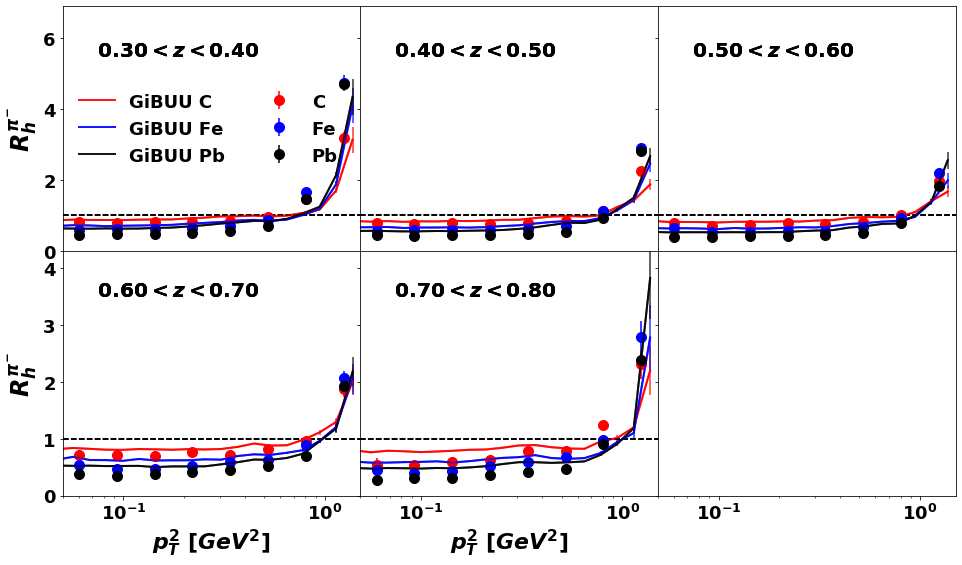

In [14]:
fig, axs = plt.subplots(2, 3,sharex=True,sharey='row',figsize=(16,9),gridspec_kw={'hspace': 0, 'wspace':0})
sysError=0.0
CroninBins = np.logspace(np.log10(0.02),np.log10(1.5),24)# np.array([0.0,0.1,0.25,0.4,0.55,0.75,1.0,1.25])
colors={}
colors['C'] = 'red'#'#1f77b4'
colors['Fe'] = 'blue'#'#ff7f0e'
colors['Pb']=  'black'#'#2ca02c'
for zbin in range(1,9):
    if(zbin==1 or zbin==2 or zbin==3): continue
    col = ((zbin-1)%3)
    row = ((zbin-1)//3)-1
    zquery = ' z>%2.2f and z<%2.2f'%((zbin-1)*0.1,zbin*0.1)
    label = '%2.2f<z<%2.2f'%(((zbin-1)*0.1,zbin*0.1))
    for i,target in enumerate(['C','Fe','Pb']):
    #zquery = ' z>0.3 and z<0.8'
        #print(i)
        r, err,x = getRatio(df['GiBUU_%s_hadron'%target].query('pid==-211 and' +zquery), 
                            df['GiBUU_D_hadron'].query('pid==-211 and' + zquery),
                            df['GiBUU_%s_electron'%target], df['GiBUU_D_electron'],
                             variable='pt2',mybins=CroninBins)
        #axs[row,col].fill_between(x,r-err,r+err,label='GiBUU %s'%target)
        axs[0,col].set_ylim(bottom=0.0,top=6.9)
        axs[1,col].set_ylim(bottom=0.0,top=4.3)
        axs[row,col].set_xlim(left=0.05,right=1.5)

        ##GIBUU
        axs[row,col].errorbar(x,r,yerr=err,color=colors['%s'%target],lw=2,alpha=0.6)#,ds='steps')
        axs[row,col].plot(x,r,label='GiBUU %s'%target,color=colors['%s'%target],lw=2,alpha=0.9)#,ds='steps')
        #print(erry['%s_pim_%ibin'%(target,zbin)])
        ##Plot Data
        totalerror = np.sqrt(np.power(np.array(erry['%s_pim_%ibin'%(target,zbin)]),2) + 
                             np.power(np.array(ydata['%s_pim_%ibin'%(target,zbin)])*sysError,2))
        
        axs[row,col].errorbar(xdata['%s_pim_%ibin'%(target,zbin)]+0.0*i,
                              ydata['%s_pim_%ibin'%(target,zbin)],
                              yerr=totalerror,
                              ms=10,fmt='o',color=colors['%s'%target],
                              label='%s'%target)
        #print('totError/statError: ',totalerror/erry['%s_pim_%ibin'%(target,zbin)])
        axs[row,col].xaxis.set_label_text('$p_{T}^{2}$ $[GeV^{2}]$',fontsize=22)
        axs[row,0].yaxis.set_label_text('$R_{h}^{\pi^{-}}$',fontsize=24)
        axs[row,col].axhline(y=1.0,color='black',linestyle='--')
        axs[row,col].set_xscale('log')
        #axs[row,col].set_yscale('log')

        zmax = 0.1*zbin
        zmin = 0.1*(zbin-1)
        title=r'     %2.2f$<z<$%2.2f'%(zmin,zmax)
        if(row==0):
            axs[row,col].text(0.05, 5.5,title, fontsize=20)
        else:
            axs[row,col].text(0.05, 3.5,title, fontsize=20)
        #axs[row,col].set_title('%2.2f<z<%2.2f'%(zmin,zmax),fontsize=18,loc='right')#,pad=-16.3)

leg = axs[0,0].legend(frameon=False,ncol=2,loc='center left',fontsize=18)  
plt.setp(leg.get_title(),fontsize=20)
#print(  (erry['Pb_pim_7bin']/ydata['Pb_pim_7bin'] )
#plt.tight_layout()


#axs[0,0].grid(True, axis='y',color='gainsboro', linestyle='dashed')
#axs[0,1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
#axs[0,2].grid(True, axis='y',color='gainsboro', linestyle='dashed')
#axs[1,0].grid(True, axis='y',color='gainsboro', linestyle='dashed')
#axs[1,1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
#axs[1,2].grid(True, axis='y',color='gainsboro', linestyle='dashed')

#axs[1,1].set_ylim([0.,0.8])

#print(  (erry['Pb_pim_7bin']/ydata['Pb_pim_7bin'] )*100
#plt.savefig('Cronin_pim.pdf', bbox_inches='tight')

# Cronin-like plots, Comparison with Taya

**$\pi^{0}$ results by taya**

In [15]:

y_pi0 = {}
erry_pi0 = {}

y_pi0['C_nu_1_z_4'] = np.array([0.875153 , 0.841417 , 0.871752 , 1.07817 , 1.2951 , -100 ])
y_pi0['C_nu_1_z_5'] = np.array([0.833425 , 0.843493 , 0.87116 , 0.9103 , 1.0894 , 2.02411 ])
y_pi0['C_nu_1_z_6'] = np.array([0.8338 , 0.917356 , 0.922332 , 0.908766 , 0.949329 , 1.49288 ])
y_pi0['C_nu_1_z_7'] = np.array([0.918445 , 0.88437 , 0.858053 , 0.83768 , 1.01723 , 1.68364 ])
y_pi0['C_nu_1_z_8'] = np.array([0.828118 , 0.829617 , 0.810514 , 0.758637 , 0.831836 , 1.90966 ])
y_pi0['C_nu_1_z_9'] = np.array([0.785481 , 0.733456 , 0.667381 , 0.68911 , 1.21769 , -100 ])

y_pi0['Fe_nu_2_z_4'] = np.array([0.651638 , 0.658773 , 0.65656 , 0.777922 , 1.00294 , -100 ])
y_pi0['Fe_nu_2_z_5'] = np.array([0.622864 , 0.608481 , 0.633734 , 0.709973 , 0.84983 , 1.21969  ])
y_pi0['Fe_nu_2_z_6'] = np.array([0.59486 , 0.599782 , 0.599638 , 0.738549 , 0.790446 , 1.14788 ])
y_pi0['Fe_nu_2_z_7'] = np.array([0.577958 , 0.591346 , 0.60167 , 0.641391 , 0.686621 , 1.02776 ])
y_pi0['Fe_nu_2_z_8'] = np.array([0.617529 , 0.648331 , 0.576632 , 0.544263 , 0.719163 , 0.643907 ])
y_pi0['Fe_nu_2_z_9'] = np.array([0.482686 , 0.472035 , 0.44609 , 0.527866 , 0.436074 , -100 ])

y_pi0['Pb_nu_2_z_4'] = np.array([0.463964 , 0.484709 , 0.531587 , 0.582024 , 0.749799 , -100 ])
y_pi0['Pb_nu_2_z_5'] = np.array([0.49444 , 0.459587 , 0.464581 , 0.563444 , 0.619106 , 1.01195 ])
y_pi0['Pb_nu_2_z_6'] = np.array([0.488871 , 0.416071 , 0.483466 , 0.50054 , 0.526092 , 0.793554 ])
y_pi0['Pb_nu_2_z_7'] = np.array([0.436603 , 0.409097 , 0.46406 , 0.424312 , 0.498432 , 0.613213 ])
y_pi0['Pb_nu_2_z_8'] = np.array([0.373611 , 0.420613 , 0.336352 , 0.359164 , 0.481024 , 0.510431 ])
y_pi0['Pb_nu_2_z_9'] = np.array([0.257878 , 0.258608 , 0.26317 , 0.209987 , 0.26381 , -100 ])

y_pi0['Fe_nu_3_z_4'] = np.array([0.618546 , 0.608611 , 0.649082 , 0.686163 , 0.916935 , 1.56593  ])
y_pi0['Fe_nu_3_z_5'] = np.array([0.552268 , 0.596201 , 0.618594 , 0.655429 , 0.776653 , 1.19347 ])
y_pi0['Fe_nu_3_z_6'] = np.array([0.583968 , 0.556822 , 0.58728 , 0.628835 , 0.691996 , 0.984132 ])
y_pi0['Fe_nu_3_z_7'] = np.array([0.507887 , 0.563134 , 0.622979 , 0.607675 , 0.654184 , 0.816434 ])
y_pi0['Fe_nu_3_z_8'] = np.array([0.591603 , 0.55267 , 0.61293 , 0.513784 , 0.599515 , 0.727693 ])
y_pi0['Fe_nu_3_z_9'] = np.array([0.33733 , 0.438929 , 0.438908 , 0.432662 , 0.433351 , -100 ])

y_pi0['Pb_nu_3_z_4'] = np.array([0.466619 , 0.454041 , 0.514555 , 0.544083 , 0.754792 , 0.820463])
y_pi0['Pb_nu_3_z_5'] = np.array([0.444355 , 0.441128 , 0.48551 , 0.483534 , 0.652443 , 0.981292 ])
y_pi0['Pb_nu_3_z_6'] = np.array([0.397294 , 0.394168 , 0.418942 , 0.478204 , 0.557032 , 0.671797 ])
y_pi0['Pb_nu_3_z_7'] = np.array([0.251332 , 0.414833 , 0.380186 , 0.345362 , 0.489769 , 0.525062 ])
y_pi0['Pb_nu_3_z_8'] = np.array([0.164851 , 0.286975 , 0.370444 , 0.254904 , 0.294418 , 0.376242 ])
y_pi0['Pb_nu_3_z_9'] = np.array([0.140144 , 0.204258 , 0.149364 , 0.163882 , 0.248399 , -100 ])

y_pi0['C_nu_2_z_4'] = np.array([0.917119 , 0.879412 , 0.849641 , 0.914274 , 1.15585 , -100])
y_pi0['C_nu_2_z_5'] = np.array([0.823018 , 0.875605 , 0.876036 , 0.846991 , 0.996461 , 1.37442 ])
y_pi0['C_nu_2_z_6'] = np.array([0.892528 , 0.868236 , 0.870379 , 0.931038 , 0.951758 , 1.23429 ])
y_pi0['C_nu_2_z_7'] = np.array([0.994351 , 0.921023 , 0.913406 , 0.934789 , 0.890193 , 1.03929 ])
y_pi0['C_nu_2_z_8'] = np.array([0.935484 , 0.876323 , 0.800505 , 0.738996 , 1.02243 , 0.796294 ])
y_pi0['C_nu_2_z_9'] = np.array([0.796361 , 0.720589 , 0.714175 , 0.77737 , 0.702267 , -100 ])

y_pi0['C_nu_3_z_4'] = np.array([0.822707 , 0.855286 , 0.849328 , 0.872581 , 0.936989 , 1.4111 ])
y_pi0['C_nu_3_z_5'] = np.array([0.828322 , 0.811279 , 0.856494 , 0.93376 , 0.927248 , 1.31564 ])
y_pi0['C_nu_3_z_6'] = np.array([0.807353 , 0.859067 , 0.771989 , 0.817494 , 1.04427 , 1.16661 ])
y_pi0['C_nu_3_z_7'] = np.array([0.668017 , 0.812788 , 0.811085 , 0.908983 , 1.02259 , 1.07799 ])
y_pi0['C_nu_3_z_8'] = np.array([0.716316 , 0.830675 , 0.884668 , 0.781456 , 0.902251 , 0.987589 ])
y_pi0['C_nu_3_z_9'] = np.array([0.614069 , 0.760003 , 0.701041 , 0.706743 , 0.62472 , -100 ])

y_pi0['Fe_nu_1_z_4'] = np.array([0.616108 , 0.613774 , 0.652957 , 0.799833 , 1.21402 , -100 ])
y_pi0['Fe_nu_1_z_5'] = np.array([0.626539 , 0.617202 , 0.616133 , 0.741695 , 0.929664 , 1.80505 ])
y_pi0['Fe_nu_1_z_6'] = np.array([0.592798 , 0.634191 , 0.642133 , 0.697632 , 0.763267 , 1.31471 ])
y_pi0['Fe_nu_1_z_7'] = np.array([0.66582 , 0.632562 , 0.602523 , 0.727553 , 0.669938 , 1.24812 ])
y_pi0['Fe_nu_1_z_8'] = np.array([0.620274 , 0.584494 , 0.610638 , 0.536404 , 0.55224 , 1.42486 ])
y_pi0['Fe_nu_1_z_9'] = np.array([0.528161 , 0.498827 , 0.432725 , 0.475295 , 0.878426 , -100 ])

y_pi0['Pb_nu_1_z_4'] = np.array([0.485925 , 0.456361 , 0.492792 , 0.449891 , 1.10606 , -100  ])
y_pi0['Pb_nu_1_z_5'] = np.array([0.446949 , 0.460679 , 0.454248 , 0.514203 , 0.599825 , -100 ])
y_pi0['Pb_nu_1_z_6'] = np.array([0.381462 , 0.446225 , 0.441528 , 0.50258 , 0.530899 , 1.07442 ])
y_pi0['Pb_nu_1_z_7'] = np.array([0.453568 , 0.433454 , 0.403969 , 0.434986 , 0.476292 , 0.936945 ])
y_pi0['Pb_nu_1_z_8'] = np.array([0.357535 , 0.367948 , 0.329892 , 0.287829 , 0.309835 , 1.10501  ])
y_pi0['Pb_nu_1_z_9'] = np.array([0.31078 , 0.279785 , 0.269463 , 0.254244 , 0.507712 , -100 ])

##ERRORS

erry_pi0['Fe_nu_1_z_4'] = np.array([0.0346467 , 0.0333492 , 0.0373942 , 0.0568038 , 0.223832 , 0 ])
erry_pi0['Fe_nu_1_z_5'] = np.array([0.0399865 , 0.0378644 , 0.0386552 , 0.048459 , 0.0792209 , 0.258615 ])
erry_pi0['Fe_nu_1_z_6'] = np.array([0.03674 , 0.0371047 , 0.0387728 , 0.0437555 , 0.0532724 , 0.146479 ])
erry_pi0['Fe_nu_1_z_7'] = np.array([0.0508736 , 0.0483624 , 0.0469452 , 0.0573737 , 0.0600922 , 0.125933 ])
erry_pi0['Fe_nu_1_z_8'] = np.array([0.0627371 , 0.0582976 , 0.0600809 , 0.0576791 , 0.065071 , 0.186277 ])
erry_pi0['Fe_nu_1_z_9'] = np.array([0.0499684 , 0.0466866 , 0.0409845 , 0.048152 , 0.0953161 , 0])

erry_pi0['Pb_nu_1_z_4'] = np.array([0.0305 , 0.0288621 , 0.0403519 , 0.0518777 , 0.186658 , 0  ])
erry_pi0['Pb_nu_1_z_5'] = np.array([0.0338873 , 0.0339516 , 0.0360224 , 0.0431078 , 0.0720329 , 0 ])
erry_pi0['Pb_nu_1_z_6'] = np.array([0.0412319 , 0.037004 , 0.0375989 , 0.0444722 , 0.057868 , 0.195237  ])
erry_pi0['Pb_nu_1_z_7'] = np.array([0.0509958 , 0.0462213 , 0.0453502 , 0.0539939 , 0.0599348 , 0.167052  ])
erry_pi0['Pb_nu_1_z_8'] = np.array([0.0480405 , 0.0463607 , 0.0487066 , 0.0475815 , 0.0620424 , 0.312069 ])
erry_pi0['Pb_nu_1_z_9'] = np.array([0.0376956 , 0.0333626 , 0.0396545 , 0.0406934 , 0.106321 , 0 ])

erry_pi0['C_nu_3_z_4'] = np.array([0.0525046 , 0.0517719 , 0.0516978 , 0.0554313 , 0.0818069 , 0.210397 ])
erry_pi0['C_nu_3_z_5'] = np.array([0.0654577 , 0.0521392 , 0.0535611 , 0.0599234 , 0.0681565 , 0.105925 ])
erry_pi0['C_nu_3_z_6'] = np.array([0.0798602 , 0.0655255 , 0.0547897 , 0.05914 , 0.0760721 , 0.0928768 ])
erry_pi0['C_nu_3_z_7'] = np.array([0.0755335 , 0.0753525 , 0.0648718 , 0.0730409 , 0.0890572 , 0.10455 ])
erry_pi0['C_nu_3_z_8'] = np.array([0.132518 , 0.0806129 , 0.092221 , 0.0815267 , 0.107145 , 0.102862 ])
erry_pi0['C_nu_3_z_9'] = np.array([0.138666 , 0.0846492 , 0.0870722 , 0.0813099 , 0.0924512 , 0  ])

erry_pi0['C_nu_1_z_4'] = np.array([0.0504588 , 0.0465096 , 0.0536973 , 0.097647 , 0.481732 , 0 ])
erry_pi0['C_nu_1_z_5'] = np.array([0.0523989 , 0.0508649 , 0.0543877 , 0.0665245 , 0.109122 , 0.459717  ])
erry_pi0['C_nu_1_z_6'] = np.array([0.0514065 , 0.0531454 , 0.0547548 , 0.0599038 , 0.0802874 , 0.234522 ])
erry_pi0['C_nu_1_z_7'] = np.array([0.0713708 , 0.0667184 , 0.066645 , 0.0710775 , 0.0989055 , 0.234005 ])
erry_pi0['C_nu_1_z_8'] = np.array([0.0839704 , 0.0821781 , 0.081948 , 0.0839582 , 0.103744 , 0.286606 ])
erry_pi0['C_nu_1_z_9'] = np.array([0.0743089 , 0.0707608 , 0.0660182 , 0.0746581 , 0.148812 , 0 ])

erry_pi0['C_nu_2_z_4'] = np.array([0.0518222 , 0.0471479 , 0.0470923 , 0.0568114 , 0.109967 , 0 ])
erry_pi0['C_nu_2_z_5'] = np.array([0.0545687 , 0.0521155 , 0.0529566 , 0.0561551 , 0.0740703 , 0.159343 ])
erry_pi0['C_nu_2_z_6'] = np.array([0.0639163 , 0.053012 , 0.0529474 , 0.0607568 , 0.0733629 , 0.10753 ])
erry_pi0['C_nu_2_z_7'] = np.array([0.0775598 , 0.0594872 , 0.0590918 , 0.0704878 , 0.0677911 , 0.0907453 ])
erry_pi0['C_nu_2_z_8'] = np.array([0.106557 , 0.0926583 , 0.0869604 , 0.086764 , 0.124347 , 0.111667 ])
erry_pi0['C_nu_2_z_9'] = np.array([0.0889278 , 0.076113 , 0.0808988 , 0.0919215 , 0.0908933 ,0])

erry_pi0['Fe_nu_2_z_4'] = np.array([0.0353649 , 0.0333123 , 0.0337946 , 0.0439825 , 0.078076 , 0 ])
erry_pi0['Fe_nu_2_z_5'] = np.array([0.0400716 , 0.0354963 , 0.0372896 , 0.0425187 , 0.0530613 , 0.122066 ])
erry_pi0['Fe_nu_2_z_6'] = np.array([0.0393961 , 0.0365061 , 0.0361869 , 0.0439983 , 0.049971 , 0.0793364 ])
erry_pi0['Fe_nu_2_z_7'] = np.array([0.0406251 , 0.0408481 , 0.0392762 , 0.0406034 , 0.0444254 , 0.0752176 ])
erry_pi0['Fe_nu_2_z_8'] = np.array([0.0665278 , 0.064485 , 0.0669124 , 0.0576782 , 0.0774423 , 0.0775428 ])
erry_pi0['Fe_nu_2_z_9'] = np.array([0.0525229 , 0.0484814 , 0.0574348 , 0.056561 , 0.0511526 , 0])

erry_pi0['Pb_nu_2_z_4'] = np.array([0.0289636 , 0.027599 , 0.0315017 , 0.0493615 , 0.0835623 , 0 ])
erry_pi0['Pb_nu_2_z_5'] = np.array([0.0422978 , 0.0315627 , 0.0347113 , 0.0445791 , 0.0592718 , 0.172467 ])
erry_pi0['Pb_nu_2_z_6'] = np.array([0.0452099 , 0.0331101 , 0.0395414 , 0.0375727 , 0.0501899 , 0.105469  ])
erry_pi0['Pb_nu_2_z_7'] = np.array([0.0575958 , 0.0379638 , 0.0417693 , 0.038828 , 0.0468158 , 0.116228 ])
erry_pi0['Pb_nu_2_z_8'] = np.array([0.0721638 , 0.0540695 , 0.0453616 , 0.0527019 , 0.0773808 , 0.109577 ])
erry_pi0['Pb_nu_2_z_9'] = np.array([0.060436 , 0.0409771 , 0.0398129 , 0.0383643 , 0.0623794 , 0 ])

erry_pi0['Fe_nu_3_z_4'] = np.array([0.0396351 , 0.0373377 , 0.0391616 , 0.0423565 , 0.0589014 , 0.169417  ])
erry_pi0['Fe_nu_3_z_5'] = np.array([0.0430676 , 0.0392053 , 0.0399555 , 0.0428031 , 0.0539767 , 0.0808783 ])
erry_pi0['Fe_nu_3_z_6'] = np.array([0.0500153 , 0.0364347 , 0.0385056 , 0.0419123 , 0.04611 , 0.0716944 ])
erry_pi0['Fe_nu_3_z_7'] = np.array([0.0499164 , 0.0471361 , 0.0480832 , 0.0461666 , 0.0500867 , 0.0756224 ])
erry_pi0['Fe_nu_3_z_8'] = np.array([0.11647 , 0.052426 , 0.0541957 , 0.0508736 , 0.0570077 , 0.0630618 ])
erry_pi0['Fe_nu_3_z_9'] = np.array([0.11063 , 0.0517453 , 0.0506133 , 0.052156 , 0.0537971 , 0  ])

erry_pi0['Pb_nu_3_z_4'] = np.array([0.0359162 , 0.032728 , 0.0378286 , 0.0440513 , 0.0565191 , 0.218708 ])
erry_pi0['Pb_nu_3_z_5'] = np.array([0.0444708 , 0.0377922 , 0.0433743 , 0.0458298 , 0.0563918 , 0.0910211 ])
erry_pi0['Pb_nu_3_z_6'] = np.array([0.0608917 , 0.0370993 , 0.0405584 , 0.0395569 , 0.0492438 , 0.0663187 ])
erry_pi0['Pb_nu_3_z_7'] = np.array([0.0495131 , 0.0425775 , 0.0416064 , 0.0577887 , 0.055279 , 0.0640918 ])
erry_pi0['Pb_nu_3_z_8'] = np.array([0.065065 , 0.0542651 , 0.0620931 , 0.0639092 , 0.0651245 , 0.0624451 ])
erry_pi0['Pb_nu_3_z_9'] = np.array([0.0656134 , 0.0549236 , 0.0470759 , 0.0593133 , 0.076231 , 0])


In [16]:
file_pip_nu_dep = TFile.Open('TAYA_bin_Pt2_MR_pip.root')
file_pim_nu_dep = TFile.Open('TAYA_bin_Pt2_MR_pim.root')

ydata = {}
xdata = {} 
erry={}
for nubin in range(1,4):
    for zbin in range (4,10):
        data = file_pip_nu_dep.Get('g_zh_%i_C_nu_%i'%(zbin,nubin))
        #print('g_zh_%i_C_nu_%i'%(zbin, nubin))
        #print('data type is :', zbin , type(data))
        ydata['C_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetY(),copy=True)
        xdata['C_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['C_pip_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data.GetEY(),copy=True)

        data = file_pip_nu_dep.Get('g_zh_%i_Fe_nu_%i'%(zbin, nubin))
        ydata['Fe_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetY(),copy=True)
        xdata['Fe_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Fe_pip_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data.GetEY(),copy=True)
        
        data = file_pip_nu_dep.Get('g_zh_%i_Pb_nu_%i'%(zbin, nubin))
        ydata['Pb_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetY(),copy=True)
        xdata['Pb_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Pb_pip_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data.GetEY(),copy=True)
        ## Pi MINUS
        data = file_pim_nu_dep.Get('g_zh_%i_C_nu_%i'%(zbin, nubin))
        ydata['C_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetY(),copy=True)
        xdata['C_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['C_pim_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data.GetEY(),copy=True)

        data = file_pim_nu_dep.Get('g_zh_%i_Fe_nu_%i'%(zbin, nubin))
        ydata['Fe_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetY(),copy=True)
        xdata['Fe_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Fe_pim_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data.GetEY(),copy=True)
        
        data = file_pim_nu_dep.Get('g_zh_%i_Pb_nu_%i'%(zbin, nubin))
        ydata['Pb_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetY(),copy=True)
        xdata['Pb_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Pb_pim_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data.GetEY(),copy=True)




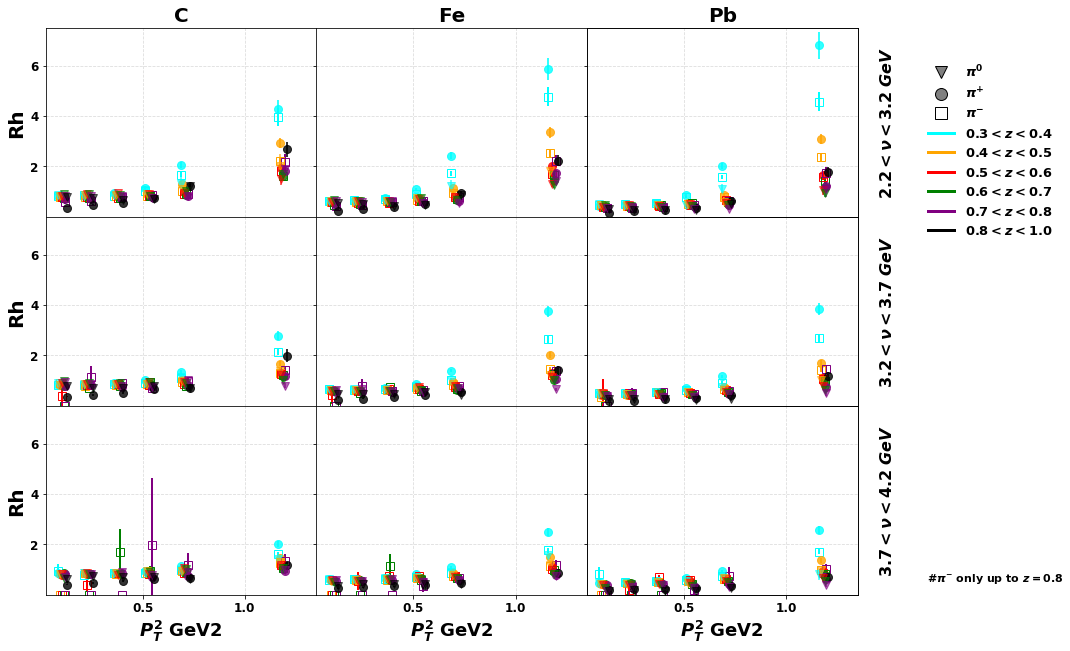

In [70]:
fig, axs = plt.subplots(3, 3,sharex=True, sharey=True,figsize=(16,9),gridspec_kw={'hspace': 0, 'wspace':0})
color_list = plt.cm.tab20c(np.linspace(0, 1, 5))

zlabel = {} 
zlabel['bin_4'] = '$0.3<z<0.4$' 
zlabel['bin_5'] = '$0.4<z<0.5$' 
zlabel['bin_6'] = '$0.5<z<0.6$' 
zlabel['bin_7'] = '$0.6<z<0.7$' 
zlabel['bin_8'] = '$0.7<z<0.8$' 
zlabel['bin_9'] = '$0.8<z<1.0$' 

nulabel2 = {} 
nulabel2['bin_1'] =  r'Rh' 
nulabel2['bin_2'] =  r'Rh' 
nulabel2['bin_3'] =  r'Rh' 

nulabel = {} 
nulabel['bin_1'] = r'C' 
nulabel['bin_2'] =  r'Fe' 
nulabel['bin_3'] =  r'Pb'

colors = {}
colors['bin_4'] = 'cyan'
colors['bin_5'] = 'orange'
colors['bin_6']=  'red'
colors['bin_7'] = 'green'
colors['bin_8'] = 'purple'
colors['bin_9']=  'black'


marker = {}
marker['bin_1'] = 'full'
marker['bin_2'] = 'none'
marker['bin_3'] = 'full'
transp_alpha = 0.8 
sysError=0.05
shiftx=0.009
for nubin in range(1,4):
    for zbin in range(4,10):
        skip = 200 ## meaningless here
        if(nubin==3): 
            skip = 300 ## meaningless here
        y=ydata
        x=xdata            
        if True:
            ibin = 'pip_zh_%ibin_nu_%ibin'%(zbin,nubin)
            key = 'C_'+ibin

            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
    
            axs[nubin-1,0].errorbar(x[key]+shiftx*(zbin),y[key],yerr=totalerror,color=colors['bin_%i'%zbin],
                                    fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                    ms=8,label=nulabel['bin_%i'%nubin], ls='')
            key = 'Fe_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,1].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,color=colors['bin_%i'%zbin],
                                    fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                    ms=8,label=nulabel['bin_%i'%nubin], ls='')
            key = 'Pb_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,2].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,color=colors['bin_%i'%zbin],
                                    fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                    ms=8,label=nulabel['bin_%i'%nubin], ls='')
        #pi minus
        if zbin!=9:
            ibin = 'pim_zh_%ibin_nu_%ibin'%(zbin,nubin)
            key = 'C_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            #print(totalerror)
            axs[nubin-1,0].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,
                                    color=colors['bin_%i'%zbin],fmt='s',fillstyle=marker['bin_2'],
                                    lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin], ls='')
            
            key = 'Fe_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,1].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,
                                    color=colors['bin_%i'%zbin],fmt='s',fillstyle=marker['bin_2'],
                                    lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin], ls='')
            key = 'Pb_'+ibin

            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,2].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,
                                    color=colors['bin_%i'%zbin],fmt='s',fillstyle=marker['bin_2'],
                                    lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin], ls='')
    
        axs[2,nubin-1].xaxis.set_label_text('$P_{T}^{2}$ GeV2',fontsize=18, fontweight='bold')
        axs[0,nubin-1].set_ylim([0.001,7.5])
        axs[1,nubin-1].set_ylim([0.001,7.5])
        
        
        axs[0,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[1,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[2,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[0,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        axs[1,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        axs[2,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        
        axs[0,nubin-1].set_xlim([0.025,1.35])
        #axs[0,nubin-1].set_xticks(np.arange(0,1.5,0.2))
        #axs[0,nubin-1].set_yticks(np.arange(0,2.5,0.25))

    #axs[q2bin-1].legend(loc='best',ncol=3,frameon=False,fontsize=15)
    axs[0,nubin-1].set_title(nulabel['bin_%i'%nubin],fontsize=20, fontweight='bold')
## adding Taya's numbers for pi0    
    
for i,target in enumerate(['C','Fe','Pb']):  
    ibin = 'pim_zh_4bin_nu_1bin'
    key = 'C_'+ibin
    for zbin in range(4,10):
        if zbin !=9 and zbin!=4 and zbin!=5:   
            axs[0,i].errorbar(x[key]+shiftx*zbin,y_pi0['%s_nu_1_z_%i'%(target,zbin)],
                            yerr=erry_pi0['%s_nu_1_z_%i'%(target,zbin)],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')   
        if zbin==9: 
            axs[0,i].errorbar(x[key][:-1]+shiftx*zbin,y_pi0['%s_nu_1_z_%i'%(target,zbin)][:-1],
                            yerr=erry_pi0['%s_nu_1_z_%i'%(target,zbin)][:-1],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')     
        if zbin==4: 
            axs[0,i].errorbar(x[key][:-1]+shiftx*zbin,y_pi0['%s_nu_1_z_%i'%(target,zbin)][:-1],
                            yerr=erry_pi0['%s_nu_1_z_%i'%(target,zbin)][:-1],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')
        if zbin==5 and target=='Pb':     
            axs[0,i].errorbar(x[key][:-1]+shiftx*zbin,y_pi0['%s_nu_1_z_%i'%(target,zbin)][:-1],
                            yerr=erry_pi0['%s_nu_1_z_%i'%(target,zbin)][:-1],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')   
        if zbin==5 and target=='C': 
            axs[0,i].errorbar(x[key]+shiftx*zbin,y_pi0['%s_nu_1_z_%i'%(target,zbin)],
                            yerr=erry_pi0['%s_nu_1_z_%i'%(target,zbin)],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')               
        if zbin==5 and target=='Fe':               
            axs[0,i].errorbar(x[key]+shiftx*zbin,y_pi0['%s_nu_1_z_%i'%(target,zbin)],
                            yerr=erry_pi0['%s_nu_1_z_%i'%(target,zbin)],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')               
            
    
for i,target in enumerate(['C','Fe','Pb']):  
    for zbin in range(4,10):
        if zbin !=9 and zbin!=4:        
            axs[1,i].errorbar(x[key]+shiftx*zbin,y_pi0['%s_nu_2_z_%i'%(target,zbin)],
                            yerr=erry_pi0['%s_nu_2_z_%i'%(target,zbin)],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')    
        if zbin==9:
            axs[1,i].errorbar(x[key][:-1]+shiftx*zbin,y_pi0['%s_nu_2_z_%i'%(target,zbin)][:-1],
                            yerr=erry_pi0['%s_nu_2_z_%i'%(target,zbin)][:-1],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')             
        if zbin==4:
            axs[1,i].errorbar(x[key][:-1]+shiftx*zbin,y_pi0['%s_nu_2_z_%i'%(target,zbin)][:-1],
                            yerr=erry_pi0['%s_nu_2_z_%i'%(target,zbin)][:-1],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')            
            
for i,target in enumerate(['C','Fe','Pb']):  
    for zbin in range(4,10):
        if zbin !=9:
            axs[2,i].errorbar(x[key]+shiftx*zbin,y_pi0['%s_nu_3_z_%i'%(target,zbin)],
                            yerr=erry_pi0['%s_nu_3_z_%i'%(target,zbin)],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')     
        if zbin==9:
            axs[2,i].errorbar(x[key][:-1]+shiftx*zbin,y_pi0['%s_nu_3_z_%i'%(target,zbin)][:-1],
                            yerr=erry_pi0['%s_nu_3_z_%i'%(target,zbin)][:-1],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')               
            
    
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
h32, = axs[0,0].plot([], ls='none', marker='v', fillstyle='full',
              ms=12, mec='black', mfc='gray', mew=1, alpha=1.0)
h3, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='gray', mew=1, alpha=1.0)

h4, = axs[0,0].plot([], ls='none', marker='s', fillstyle='none',
              ms=12, mec='black', mfc='white', mew=1, alpha=1.0)

h5, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='black', mew=1, alpha=1.0)

handles = [h32, h3,h4,Line2D([0], [0], color=colors['bin_4'], lw=3),
                Line2D([0], [0], color=colors['bin_5'], lw=3),
                Line2D([0], [0], color=colors['bin_6'], lw=3) ,
          Line2D([0], [0], color=colors['bin_7'], lw=3),
                Line2D([0], [0], color=colors['bin_8'], lw=3),
                Line2D([0], [0], color=colors['bin_9'], lw=3) ]

handles = [handles[i] for i in [0,1,2,3,4,5,6,7,8]]
line_labels =[r'$\pi^{0}$' ,r'$\pi^{+}$' , r'$\pi^{-}$', r'$0.3<z<0.4$',
              r'$0.4<z<0.5$',r'$0.5<z<0.6$',r'$0.6<z<0.7$',r'$0.7<z<0.8$',r'$0.8<z<1.0$' ]
fig.legend(handles=handles,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=1,    # Small spacing around legend box
           title='\n' , # Title for the legend
           frameon=False,
           fontsize=13
          )

plt.subplots_adjust(right=0.83,top=1)
for i in range(0,3):
    axs[i,0].tick_params(axis='y', which='major', labelsize=12)
    axs[2,i].tick_params(axis='both', which='major', labelsize=12)
nulabel3 = {} 
nulabel3['bin_1'] = r'$2.2<\nu<3.2$ $GeV$' 
nulabel3['bin_2'] =  r'$3.2<\nu<3.7$ $GeV$'  
nulabel3['bin_3'] =  r'$3.7<\nu<4.2$ $GeV$'  

ax01 = axs[0,2].twinx()
ax01.tick_params(axis='y', colors='red')  
ax01.yaxis.set_label_text('\n' + nulabel3['bin_1'] ,fontsize=16, color='black')
ax01.set_ylim([3.2,2.21])
ax01.set_yticks(np.arange(3.2,2.21,1))
ax02 = axs[1,2].twinx()
ax02.tick_params(axis='y', colors='red')  
ax02.yaxis.set_label_text( '\n' + nulabel3['bin_2'] ,fontsize=16, color='black')
ax02.set_ylim([3.2,2.21])
ax02.set_yticks(np.arange(3.2,2.21,1))

ax03 = axs[2,2].twinx()
ax03.tick_params(axis='y', colors='red')  
ax03.yaxis.set_label_text('\n' + nulabel3['bin_3'] ,fontsize=16, color='black')
ax03.set_ylim([3.2,2.21])
ax03.set_yticks(np.arange(3.2,2.21,1))
fig.text(0.89, 0.15, '#$\pi^{-}$ only up to $z=0.8$', fontsize=11, va='center')

axs[0,0].yaxis.set_label_text(nulabel2['bin_1'],fontsize=20, fontweight='bold')
axs[1,0].yaxis.set_label_text(nulabel2['bin_2'],fontsize=20, fontweight='bold')
axs[2,0].yaxis.set_label_text(nulabel2['bin_3'],fontsize=20, fontweight='bold')
#axs[0,0].set_yscale('log')
plt.savefig('3D_chargedPions_Cronin_TAYA_Binning.pdf', bbox_inches='tight')
#plt.savefig('test.png', bbox_inches='tight')

**checking the case with cuts in the errors**

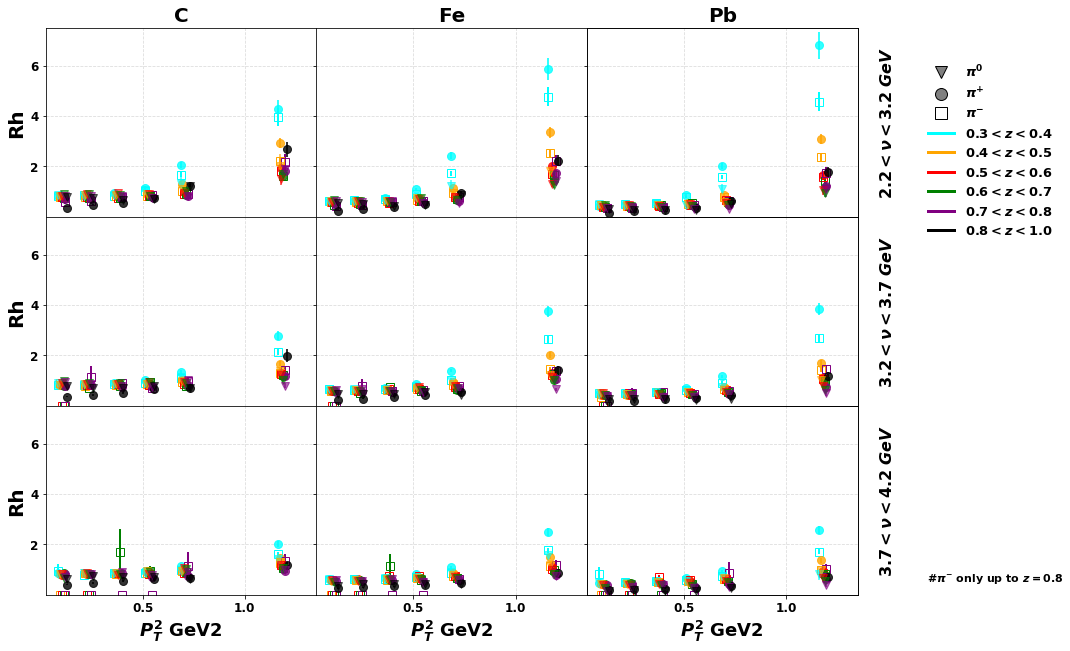

In [86]:
file_pip_nu_dep = TFile.Open('TAYA_errCut_bin_Pt2_MR_pip.root')
file_pim_nu_dep = TFile.Open('TAYA_errCut_bin_Pt2_MR_pim.root')

ydata = {}
xdata = {} 
erry={}
for nubin in range(1,4):
    for zbin in range (4,10):
        data = file_pip_nu_dep.Get('g_zh_%i_C_nu_%i'%(zbin,nubin))
        #print('g_zh_%i_C_nu_%i'%(zbin, nubin))
        #print('data type is :', zbin , type(data))
        ydata['C_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetY(),copy=True)
        xdata['C_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['C_pip_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data.GetEY(),copy=True)

        data = file_pip_nu_dep.Get('g_zh_%i_Fe_nu_%i'%(zbin, nubin))
        ydata['Fe_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetY(),copy=True)
        xdata['Fe_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Fe_pip_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data.GetEY(),copy=True)
        
        data = file_pip_nu_dep.Get('g_zh_%i_Pb_nu_%i'%(zbin, nubin))
        ydata['Pb_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetY(),copy=True)
        xdata['Pb_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Pb_pip_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data.GetEY(),copy=True)
        ## Pi MINUS
        data = file_pim_nu_dep.Get('g_zh_%i_C_nu_%i'%(zbin, nubin))
        ydata['C_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetY(),copy=True)
        xdata['C_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['C_pim_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data.GetEY(),copy=True)

        data = file_pim_nu_dep.Get('g_zh_%i_Fe_nu_%i'%(zbin, nubin))
        ydata['Fe_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetY(),copy=True)
        xdata['Fe_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Fe_pim_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data.GetEY(),copy=True)
        
        data = file_pim_nu_dep.Get('g_zh_%i_Pb_nu_%i'%(zbin, nubin))
        ydata['Pb_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetY(),copy=True)
        xdata['Pb_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data.GetX(),copy=True)
        erry['Pb_pim_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data.GetEY(),copy=True)





fig, axs = plt.subplots(3, 3,sharex=True, sharey=True,figsize=(16,9),gridspec_kw={'hspace': 0, 'wspace':0})
color_list = plt.cm.tab20c(np.linspace(0, 1, 5))

zlabel = {} 
zlabel['bin_4'] = '$0.3<z<0.4$' 
zlabel['bin_5'] = '$0.4<z<0.5$' 
zlabel['bin_6'] = '$0.5<z<0.6$' 
zlabel['bin_7'] = '$0.6<z<0.7$' 
zlabel['bin_8'] = '$0.7<z<0.8$' 
zlabel['bin_9'] = '$0.8<z<1.0$' 

nulabel2 = {} 
nulabel2['bin_1'] =  r'Rh' 
nulabel2['bin_2'] =  r'Rh' 
nulabel2['bin_3'] =  r'Rh' 

nulabel = {} 
nulabel['bin_1'] = r'C' 
nulabel['bin_2'] =  r'Fe' 
nulabel['bin_3'] =  r'Pb'

colors = {}
colors['bin_4'] = 'cyan'
colors['bin_5'] = 'orange'
colors['bin_6']=  'red'
colors['bin_7'] = 'green'
colors['bin_8'] = 'purple'
colors['bin_9']=  'black'


marker = {}
marker['bin_1'] = 'full'
marker['bin_2'] = 'none'
marker['bin_3'] = 'full'
transp_alpha = 0.8 
sysError=0.05
shiftx=0.009
for nubin in range(1,4):
    for zbin in range(4,10):
        skip = 200 ## meaningless here
        if(nubin==3): 
            skip = 300 ## meaningless here
        y=ydata
        x=xdata            
        if True:
            ibin = 'pip_zh_%ibin_nu_%ibin'%(zbin,nubin)
            key = 'C_'+ibin

            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
    
            axs[nubin-1,0].errorbar(x[key]+shiftx*(zbin),y[key],yerr=totalerror,color=colors['bin_%i'%zbin],
                                    fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                    ms=8,label=nulabel['bin_%i'%nubin], ls='')
            key = 'Fe_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,1].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,color=colors['bin_%i'%zbin],
                                    fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                    ms=8,label=nulabel['bin_%i'%nubin], ls='')
            key = 'Pb_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,2].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,color=colors['bin_%i'%zbin],
                                    fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                    ms=8,label=nulabel['bin_%i'%nubin], ls='')
        #pi minus
        if zbin!=9:
            ibin = 'pim_zh_%ibin_nu_%ibin'%(zbin,nubin)
            key = 'C_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            #print(totalerror)
            axs[nubin-1,0].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,
                                    color=colors['bin_%i'%zbin],fmt='s',fillstyle=marker['bin_2'],
                                    lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin], ls='')
            
            key = 'Fe_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,1].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,
                                    color=colors['bin_%i'%zbin],fmt='s',fillstyle=marker['bin_2'],
                                    lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin], ls='')
            key = 'Pb_'+ibin

            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,2].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,
                                    color=colors['bin_%i'%zbin],fmt='s',fillstyle=marker['bin_2'],
                                    lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin], ls='')
    
        axs[2,nubin-1].xaxis.set_label_text('$P_{T}^{2}$ GeV2',fontsize=18, fontweight='bold')
        axs[0,nubin-1].set_ylim([0.001,7.5])
        axs[1,nubin-1].set_ylim([0.001,7.5])
        
        
        axs[0,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[1,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[2,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[0,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        axs[1,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        axs[2,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        
        axs[0,nubin-1].set_xlim([0.025,1.35])
        #axs[0,nubin-1].set_xticks(np.arange(0,1.5,0.2))
        #axs[0,nubin-1].set_yticks(np.arange(0,2.5,0.25))

    #axs[q2bin-1].legend(loc='best',ncol=3,frameon=False,fontsize=15)
    axs[0,nubin-1].set_title(nulabel['bin_%i'%nubin],fontsize=20, fontweight='bold')
## adding Taya's numbers for pi0    
    
for i,target in enumerate(['C','Fe','Pb']):  
    ibin = 'pim_zh_4bin_nu_1bin'
    key = 'C_'+ibin
    for zbin in range(4,10):
        if zbin !=9 and zbin!=4 and zbin!=5:   
            axs[0,i].errorbar(x[key]+shiftx*zbin,y_pi0['%s_nu_1_z_%i'%(target,zbin)],
                            yerr=erry_pi0['%s_nu_1_z_%i'%(target,zbin)],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')   
        if zbin==9: 
            axs[0,i].errorbar(x[key][:-1]+shiftx*zbin,y_pi0['%s_nu_1_z_%i'%(target,zbin)][:-1],
                            yerr=erry_pi0['%s_nu_1_z_%i'%(target,zbin)][:-1],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')     
        if zbin==4: 
            axs[0,i].errorbar(x[key][:-1]+shiftx*zbin,y_pi0['%s_nu_1_z_%i'%(target,zbin)][:-1],
                            yerr=erry_pi0['%s_nu_1_z_%i'%(target,zbin)][:-1],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')
        if zbin==5 and target=='Pb':     
            axs[0,i].errorbar(x[key][:-1]+shiftx*zbin,y_pi0['%s_nu_1_z_%i'%(target,zbin)][:-1],
                            yerr=erry_pi0['%s_nu_1_z_%i'%(target,zbin)][:-1],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')   
        if zbin==5 and target=='C': 
            axs[0,i].errorbar(x[key]+shiftx*zbin,y_pi0['%s_nu_1_z_%i'%(target,zbin)],
                            yerr=erry_pi0['%s_nu_1_z_%i'%(target,zbin)],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')               
        if zbin==5 and target=='Fe':               
            axs[0,i].errorbar(x[key]+shiftx*zbin,y_pi0['%s_nu_1_z_%i'%(target,zbin)],
                            yerr=erry_pi0['%s_nu_1_z_%i'%(target,zbin)],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')               
            
    
for i,target in enumerate(['C','Fe','Pb']):  
    for zbin in range(4,10):
        if zbin !=9 and zbin!=4:        
            axs[1,i].errorbar(x[key]+shiftx*zbin,y_pi0['%s_nu_2_z_%i'%(target,zbin)],
                            yerr=erry_pi0['%s_nu_2_z_%i'%(target,zbin)],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')    
        if zbin==9:
            axs[1,i].errorbar(x[key][:-1]+shiftx*zbin,y_pi0['%s_nu_2_z_%i'%(target,zbin)][:-1],
                            yerr=erry_pi0['%s_nu_2_z_%i'%(target,zbin)][:-1],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')             
        if zbin==4:
            axs[1,i].errorbar(x[key][:-1]+shiftx*zbin,y_pi0['%s_nu_2_z_%i'%(target,zbin)][:-1],
                            yerr=erry_pi0['%s_nu_2_z_%i'%(target,zbin)][:-1],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')            
            
for i,target in enumerate(['C','Fe','Pb']):  
    for zbin in range(4,10):
        if zbin !=9:
            axs[2,i].errorbar(x[key]+shiftx*zbin,y_pi0['%s_nu_3_z_%i'%(target,zbin)],
                            yerr=erry_pi0['%s_nu_3_z_%i'%(target,zbin)],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')     
        if zbin==9:
            axs[2,i].errorbar(x[key][:-1]+shiftx*zbin,y_pi0['%s_nu_3_z_%i'%(target,zbin)][:-1],
                            yerr=erry_pi0['%s_nu_3_z_%i'%(target,zbin)][:-1],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.6,lw=2, ls='')               
            
    
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
h32, = axs[0,0].plot([], ls='none', marker='v', fillstyle='full',
              ms=12, mec='black', mfc='gray', mew=1, alpha=1.0)
h3, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='gray', mew=1, alpha=1.0)

h4, = axs[0,0].plot([], ls='none', marker='s', fillstyle='none',
              ms=12, mec='black', mfc='white', mew=1, alpha=1.0)

h5, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='black', mew=1, alpha=1.0)

handles = [h32, h3,h4,Line2D([0], [0], color=colors['bin_4'], lw=3),
                Line2D([0], [0], color=colors['bin_5'], lw=3),
                Line2D([0], [0], color=colors['bin_6'], lw=3) ,
          Line2D([0], [0], color=colors['bin_7'], lw=3),
                Line2D([0], [0], color=colors['bin_8'], lw=3),
                Line2D([0], [0], color=colors['bin_9'], lw=3) ]

handles = [handles[i] for i in [0,1,2,3,4,5,6,7,8]]
line_labels =[r'$\pi^{0}$' ,r'$\pi^{+}$' , r'$\pi^{-}$', r'$0.3<z<0.4$',
              r'$0.4<z<0.5$',r'$0.5<z<0.6$',r'$0.6<z<0.7$',r'$0.7<z<0.8$',r'$0.8<z<1.0$' ]
fig.legend(handles=handles,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=1,    # Small spacing around legend box
           title='\n' , # Title for the legend
           frameon=False,
           fontsize=13
          )

plt.subplots_adjust(right=0.83,top=1)
for i in range(0,3):
    axs[i,0].tick_params(axis='y', which='major', labelsize=12)
    axs[2,i].tick_params(axis='both', which='major', labelsize=12)
nulabel3 = {} 
nulabel3['bin_1'] = r'$2.2<\nu<3.2$ $GeV$' 
nulabel3['bin_2'] =  r'$3.2<\nu<3.7$ $GeV$'  
nulabel3['bin_3'] =  r'$3.7<\nu<4.2$ $GeV$'  

ax01 = axs[0,2].twinx()
ax01.tick_params(axis='y', colors='red')  
ax01.yaxis.set_label_text('\n' + nulabel3['bin_1'] ,fontsize=16, color='black')
ax01.set_ylim([3.2,2.21])
ax01.set_yticks(np.arange(3.2,2.21,1))
ax02 = axs[1,2].twinx()
ax02.tick_params(axis='y', colors='red')  
ax02.yaxis.set_label_text( '\n' + nulabel3['bin_2'] ,fontsize=16, color='black')
ax02.set_ylim([3.2,2.21])
ax02.set_yticks(np.arange(3.2,2.21,1))

ax03 = axs[2,2].twinx()
ax03.tick_params(axis='y', colors='red')  
ax03.yaxis.set_label_text('\n' + nulabel3['bin_3'] ,fontsize=16, color='black')
ax03.set_ylim([3.2,2.21])
ax03.set_yticks(np.arange(3.2,2.21,1))
fig.text(0.89, 0.15, '#$\pi^{-}$ only up to $z=0.8$', fontsize=11, va='center')

axs[0,0].yaxis.set_label_text(nulabel2['bin_1'],fontsize=20, fontweight='bold')
axs[1,0].yaxis.set_label_text(nulabel2['bin_2'],fontsize=20, fontweight='bold')
axs[2,0].yaxis.set_label_text(nulabel2['bin_3'],fontsize=20, fontweight='bold')
#axs[0,0].set_yscale('log')
plt.savefig('3D_chargedPions_Cronin_TAYA_Binning_errCut.pdf', bbox_inches='tight')
#plt.savefig('test.png', bbox_inches='tight')

**Testin pi0, i should have the same that taya presents**

Text(0, 0.5, 'Rh')

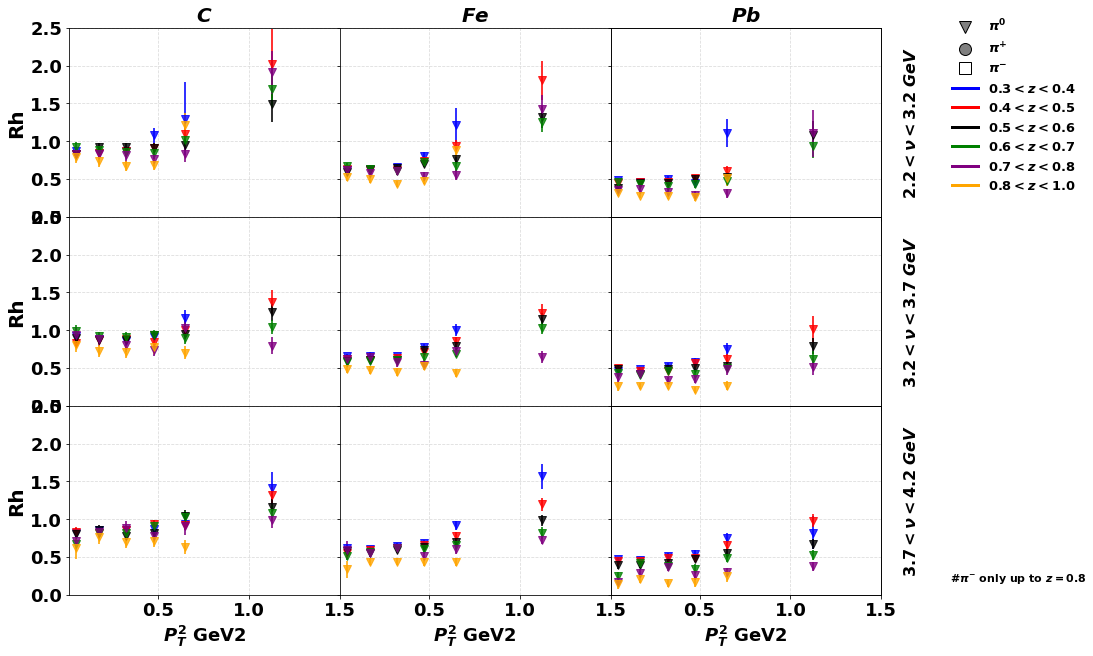

In [18]:
fig, axs = plt.subplots(3, 3,sharex=True, sharey=True,figsize=(16,9),gridspec_kw={'hspace': 0, 'wspace':0})
color_list = plt.cm.tab20c(np.linspace(0, 1, 5))

zlabel = {} 
zlabel['bin_4'] = '$0.3<z<0.4$' 
zlabel['bin_5'] = '$0.4<z<0.5$' 
zlabel['bin_6'] = '$0.5<z<0.6$' 
zlabel['bin_7'] = '$0.6<z<0.7$' 
zlabel['bin_8'] = '$0.7<z<0.8$' 
zlabel['bin_9'] = '$0.8<z<1.0$' 

nulabel2 = {} 
nulabel2['bin_1'] =  r'Rh' 
nulabel2['bin_2'] =  r'Rh' 
nulabel2['bin_3'] =  r'Rh' 

nulabel = {} 
nulabel['bin_1'] = r'$C$' 
nulabel['bin_2'] =  r'$Fe$' 
nulabel['bin_3'] =  r'$Pb$'

colors = {}
colors['bin_4'] = 'cyan'
colors['bin_5'] = 'orange'
colors['bin_6']=  'red'
colors['bin_7'] = 'green'
colors['bin_8'] = 'purple'
colors['bin_9']=  'black'


marker = {}
marker['bin_1'] = 'full'
marker['bin_2'] = 'none'
marker['bin_3'] = 'full'
transp_alpha = 0.8 
sysError=0.05

for nubin in range(1,4):
    for zbin in range(4,10):
        skip = 200 ## meaningless
        if(nubin==3): 
            skip = 300 ## meaningless
        y=ydata
        x=xdata            
 

    
        axs[2,nubin-1].xaxis.set_label_text('$P_{T}^{2}$ GeV2',fontsize=18, fontweight='bold')
        axs[0,nubin-1].set_ylim([0.0,2.5])
        axs[1,nubin-1].set_ylim([0.0,2.5])
        
        
        axs[0,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[1,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[2,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[0,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        axs[1,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        axs[2,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        
        axs[0,nubin-1].set_xlim([0.01,1.5])
        #axs[0,nubin-1].set_xticks(np.arange(0,1.5,0.2))
        #axs[0,nubin-1].set_yticks(np.arange(0,2.5,0.25))

    #axs[q2bin-1].legend(loc='best',ncol=3,frameon=False,fontsize=15)
    axs[0,nubin-1].set_title(nulabel['bin_%i'%nubin],fontsize=20)

## adding Taya's numbers for pi0    
    
for i,target in enumerate(['C','Fe','Pb']):  
    ibin = 'pim_zh_4bin_nu_1bin'
    key = 'C_'+ibin
    for zbin in range(4,10):
        if zbin !=9 and zbin!=4 and zbin!=5:   
            axs[0,i].errorbar(x[key]+0.0*zbin,y_pi0['%s_nu_1_z_%i'%(target,zbin)],
                            yerr=erry_pi0['%s_nu_1_z_%i'%(target,zbin)],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.8,lw=2, ls='')   
        if zbin==9: 
            axs[0,i].errorbar(x[key][:-1]+0.0*zbin,y_pi0['%s_nu_1_z_%i'%(target,zbin)][:-1],
                            yerr=erry_pi0['%s_nu_1_z_%i'%(target,zbin)][:-1],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.8,lw=2, ls='')     
        if zbin==4: 
            axs[0,i].errorbar(x[key][:-1]+0.0*zbin,y_pi0['%s_nu_1_z_%i'%(target,zbin)][:-1],
                            yerr=erry_pi0['%s_nu_1_z_%i'%(target,zbin)][:-1],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.8,lw=2, ls='')
        if zbin==5 and target=='Pb':     
            axs[0,i].errorbar(x[key][:-1]+0.0*zbin,y_pi0['%s_nu_1_z_%i'%(target,zbin)][:-1],
                            yerr=erry_pi0['%s_nu_1_z_%i'%(target,zbin)][:-1],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.8,lw=2, ls='')   
        if zbin==5 and target=='C': 
            axs[0,i].errorbar(x[key]+0.0*zbin,y_pi0['%s_nu_1_z_%i'%(target,zbin)],
                            yerr=erry_pi0['%s_nu_1_z_%i'%(target,zbin)],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.8,lw=2, ls='')               
        if zbin==5 and target=='Fe':               
            axs[0,i].errorbar(x[key]+0.0*zbin,y_pi0['%s_nu_1_z_%i'%(target,zbin)],
                            yerr=erry_pi0['%s_nu_1_z_%i'%(target,zbin)],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.8,lw=2, ls='')               
            
    
for i,target in enumerate(['C','Fe','Pb']):  
    for zbin in range(4,10):
        if zbin !=9 and zbin!=4:        
            axs[1,i].errorbar(x[key]+0.0*zbin,y_pi0['%s_nu_2_z_%i'%(target,zbin)],
                            yerr=erry_pi0['%s_nu_2_z_%i'%(target,zbin)],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.8,lw=2, ls='')    
        if zbin==9:
            axs[1,i].errorbar(x[key][:-1]+0.0*zbin,y_pi0['%s_nu_2_z_%i'%(target,zbin)][:-1],
                            yerr=erry_pi0['%s_nu_2_z_%i'%(target,zbin)][:-1],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.8,lw=2, ls='')             
        if zbin==4:
            axs[1,i].errorbar(x[key][:-1]+0.0*zbin,y_pi0['%s_nu_2_z_%i'%(target,zbin)][:-1],
                            yerr=erry_pi0['%s_nu_2_z_%i'%(target,zbin)][:-1],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.8,lw=2, ls='')            
            
for i,target in enumerate(['C','Fe','Pb']):  
    for zbin in range(4,10):
        if zbin !=9:
            axs[2,i].errorbar(x[key]+0.0*zbin,y_pi0['%s_nu_3_z_%i'%(target,zbin)],
                            yerr=erry_pi0['%s_nu_3_z_%i'%(target,zbin)],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.8,lw=2, ls='')     
        if zbin==9:
            axs[2,i].errorbar(x[key][:-1]+0.0*zbin,y_pi0['%s_nu_3_z_%i'%(target,zbin)][:-1],
                            yerr=erry_pi0['%s_nu_3_z_%i'%(target,zbin)][:-1],label='$\pi^{0}$'if i == 0 else "",
                            fmt='v',ms=8, color=colors['bin_%i'%zbin], alpha=0.8,lw=2, ls='')               
            
    
    
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
h32, = axs[0,0].plot([], ls='none', marker='v', fillstyle='full',
              ms=12, mec='black', mfc='gray', mew=1, alpha=1.0)
h3, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='gray', mew=1, alpha=1.0)

h4, = axs[0,0].plot([], ls='none', marker='s', fillstyle='none',
              ms=12, mec='black', mfc='white', mew=1, alpha=1.0)

h5, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='black', mew=1, alpha=1.0)

handles = [h32, h3,h4,Line2D([0], [0], color=colors['bin_4'], lw=3),
                Line2D([0], [0], color=colors['bin_5'], lw=3),
                Line2D([0], [0], color=colors['bin_6'], lw=3) ,
          Line2D([0], [0], color=colors['bin_7'], lw=3),
                Line2D([0], [0], color=colors['bin_8'], lw=3),
                Line2D([0], [0], color=colors['bin_9'], lw=3) ]

handles = [handles[i] for i in [0,1,2,3,4,5,6,7,8]]
line_labels =[r'$\pi^{0}$' ,r'$\pi^{+}$' , r'$\pi^{-}$', r'$0.3<z<0.4$',
              r'$0.4<z<0.5$',r'$0.5<z<0.6$',r'$0.6<z<0.7$',r'$0.7<z<0.8$',r'$0.8<z<1.0$' ]
fig.legend(handles=handles,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=1,    # Small spacing around legend box
           #title="  " , # Title for the legend
           frameon=False,
           fontsize=13
          )

plt.subplots_adjust(right=0.83,top=1)
#for i in range(0,3):
#    axs[i,0].tick_params(axis='y', which='major', labelsize=12)
#    axs[2,i].tick_params(axis='both', which='major', labelsize=12)
nulabel3 = {} 
nulabel3['bin_1'] = r'$2.2<\nu<3.2$ $GeV$' 
nulabel3['bin_2'] =  r'$3.2<\nu<3.7$ $GeV$'  
nulabel3['bin_3'] =  r'$3.7<\nu<4.2$ $GeV$'  

ax01 = axs[0,2].twinx()
ax01.tick_params(axis='y', colors='red')  
ax01.yaxis.set_label_text('\n' + nulabel3['bin_1'] ,fontsize=16, color='black')
ax01.set_ylim([3.2,2.21])
ax01.set_yticks(np.arange(3.2,2.21,1))
ax02 = axs[1,2].twinx()
ax02.tick_params(axis='y', colors='red')  
ax02.yaxis.set_label_text( '\n' + nulabel3['bin_2'] ,fontsize=16, color='black')
ax02.set_ylim([3.2,2.21])
ax02.set_yticks(np.arange(3.2,2.21,1))

ax03 = axs[2,2].twinx()
ax03.tick_params(axis='y', colors='red')  
ax03.yaxis.set_label_text('\n' + nulabel3['bin_3'] ,fontsize=16, color='black')
ax03.set_ylim([3.2,2.21])
ax03.set_yticks(np.arange(3.2,2.21,1))
fig.text(0.89, 0.15, '#$\pi^{-}$ only up to $z=0.8$', fontsize=11, va='center')

axs[0,0].yaxis.set_label_text(nulabel2['bin_1'],fontsize=20, fontweight='bold')
axs[1,0].yaxis.set_label_text(nulabel2['bin_2'],fontsize=20, fontweight='bold')
axs[2,0].yaxis.set_label_text(nulabel2['bin_3'],fontsize=20, fontweight='bold')
#axs[0,0].set_xscale('log')
#plt.savefig('3D_chargedPions_Cronin_TAYA_Binning.pdf', bbox_inches='tight')
#plt.savefig('test.png', bbox_inches='tight')

In [19]:
print( y_pi0['C_nu_2_z_5'][1:] )

[0.875605 0.876036 0.846991 0.996461 1.37442 ]


In [20]:
print( y_pi0['C_nu_2_z_5'] )

[0.823018 0.875605 0.876036 0.846991 0.996461 1.37442 ]


**Only piplus**

Text(0, 0.5, 'Rh')

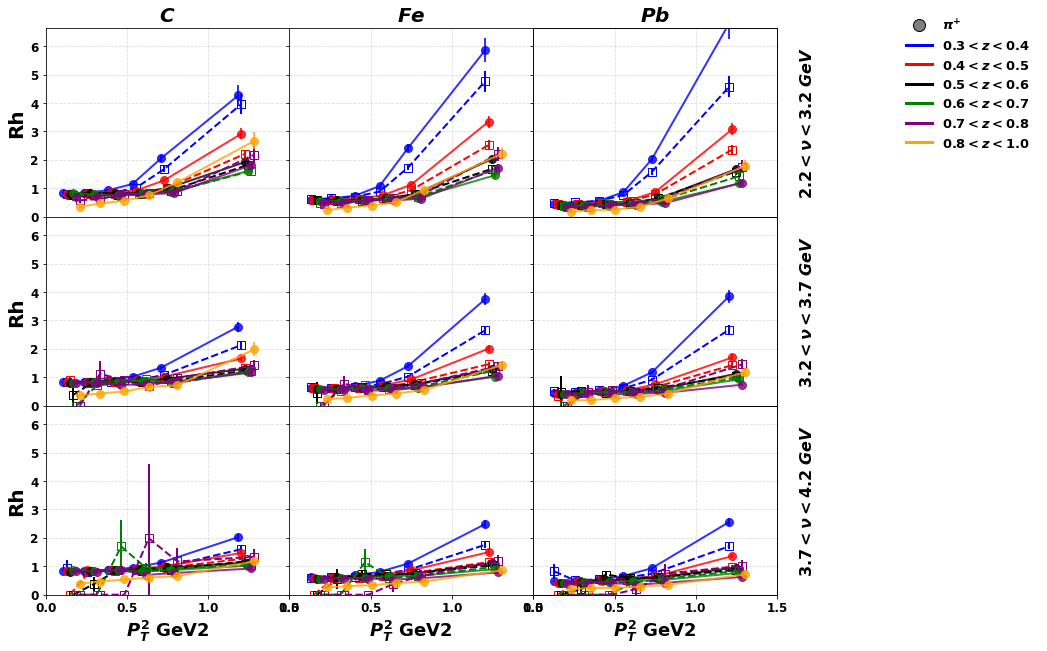

In [21]:
fig, axs = plt.subplots(3, 3,sharex=True, sharey=True,figsize=(16,9),gridspec_kw={'hspace': 0, 'wspace':0})
color_list = plt.cm.tab20c(np.linspace(0, 1, 5))

zlabel = {} 
zlabel['bin_4'] = '$0.3<z<0.4$' 
zlabel['bin_5'] = '$0.4<z<0.5$' 
zlabel['bin_6'] = '$0.5<z<0.6$' 
zlabel['bin_7'] = '$0.6<z<0.7$' 
zlabel['bin_8'] = '$0.7<z<0.8$' 
zlabel['bin_9'] = '$0.8<z<1.0$' 

nulabel2 = {} 
nulabel2['bin_1'] =  r'Rh' 
nulabel2['bin_2'] =  r'Rh' 
nulabel2['bin_3'] =  r'Rh' 

nulabel = {} 
nulabel['bin_1'] = r'$C$' 
nulabel['bin_2'] =  r'$Fe$' 
nulabel['bin_3'] =  r'$Pb$'

colors = {}
colors['bin_4'] = 'cyan'
colors['bin_5'] = 'orange'
colors['bin_6']=  'red'
colors['bin_7'] = 'green'
colors['bin_8'] = 'purple'
colors['bin_9']=  'black'


marker = {}
marker['bin_1'] = 'full'
marker['bin_2'] = 'none'
marker['bin_3'] = 'full'
transp_alpha = 0.8 
sysError=0.05

for nubin in range(1,4):
    for zbin in range(4,10):
        skip = 2
        if(nubin==3): 
            skip = 3
        y=ydata
        x=xdata            
        if True:
            ibin = 'pip_zh_%ibin_nu_%ibin'%(zbin,nubin)
            key = 'C_'+ibin

            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
    
            axs[nubin-1,0].errorbar(x[key]+0.02*(zbin-1),y[key],yerr=totalerror,color=colors['bin_%i'%zbin],
                                    fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                    ms=8,label=nulabel['bin_%i'%nubin], ls='-')
            key = 'Fe_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,1].errorbar(x[key]+0.02*zbin,y[key],yerr=totalerror,color=colors['bin_%i'%zbin],
                                    fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                    ms=8,label=nulabel['bin_%i'%nubin], ls='-')
            key = 'Pb_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,2].errorbar(x[key]+0.02*zbin,y[key],yerr=totalerror,color=colors['bin_%i'%zbin],
                                    fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                    ms=8,label=nulabel['bin_%i'%nubin], ls='-')
        #pi minus
        if zbin!=9:
            ibin = 'pim_zh_%ibin_nu_%ibin'%(zbin,nubin)
            key = 'C_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            #print(totalerror)
            axs[nubin-1,0].errorbar(x[key]+0.02*zbin,y[key],yerr=totalerror,
                                    color=colors['bin_%i'%zbin],fmt='s',fillstyle=marker['bin_2'],
                                    lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin], ls='--')
            
            key = 'Fe_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,1].errorbar(x[key]+0.02*zbin,y[key],yerr=totalerror,
                                    color=colors['bin_%i'%zbin],fmt='s',fillstyle=marker['bin_2'],
                                    lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin], ls='--')
            key = 'Pb_'+ibin

            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,2].errorbar(x[key]+0.02*zbin,y[key],yerr=totalerror,
                                    color=colors['bin_%i'%zbin],fmt='s',fillstyle=marker['bin_2'],
                                    lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin], ls='--')
    
        
        axs[2,nubin-1].xaxis.set_label_text('$P_{T}^{2}$ GeV2',fontsize=18, fontweight='bold')
        axs[0,nubin-1].set_ylim([0.0,6.65])
        axs[1,nubin-1].set_ylim([0.0,6.65])
        
        
        axs[0,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[1,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[2,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[0,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        axs[1,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        axs[2,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        
        axs[0,nubin-1].set_xlim([0.0,1.5])
        #axs[0,nubin-1].set_xticks(np.arange(0,1.5,0.2))
        #axs[0,nubin-1].set_yticks(np.arange(0,2.5,0.25))

    #axs[q2bin-1].legend(loc='best',ncol=3,frameon=False,fontsize=15)
    axs[0,nubin-1].set_title(nulabel['bin_%i'%nubin],fontsize=20)
    
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

h3, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='gray', mew=1, alpha=1.0)

h4, = axs[0,0].plot([], ls='none', marker='s', fillstyle='none',
              ms=12, mec='black', mfc='white', mew=1, alpha=1.0)

h5, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='black', mew=1, alpha=1.0)

handles = [ h3,Line2D([0], [0], color=colors['bin_4'], lw=3),
                Line2D([0], [0], color=colors['bin_5'], lw=3),
                Line2D([0], [0], color=colors['bin_6'], lw=3) ,
          Line2D([0], [0], color=colors['bin_7'], lw=3),
                Line2D([0], [0], color=colors['bin_8'], lw=3),
                Line2D([0], [0], color=colors['bin_9'], lw=3) ]

handles = [handles[i] for i in [0,1,2,3,4,5,6]]
line_labels =[r'$\pi^{+}$' , r'$0.3<z<0.4$',
              r'$0.4<z<0.5$',r'$0.5<z<0.6$',r'$0.6<z<0.7$',r'$0.7<z<0.8$',r'$0.8<z<1.0$' ]
fig.legend(handles=handles,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=1,    # Small spacing around legend box
           #title="  " , # Title for the legend
           frameon=False,
           fontsize=13
          )

plt.subplots_adjust(right=0.76,top=1)
for i in range(0,3):
    axs[i,0].tick_params(axis='y', which='major', labelsize=12)
    axs[2,i].tick_params(axis='both', which='major', labelsize=12)
nulabel3 = {} 
nulabel3['bin_1'] = r'$2.2<\nu<3.2$ $GeV$' 
nulabel3['bin_2'] =  r'$3.2<\nu<3.7$ $GeV$'  
nulabel3['bin_3'] =  r'$3.7<\nu<4.2$ $GeV$'  

ax01 = axs[0,2].twinx()
ax01.tick_params(axis='y', colors='red')  
ax01.yaxis.set_label_text('\n' + nulabel3['bin_1'] ,fontsize=16, color='black')
ax01.set_ylim([3.2,2.21])
ax01.set_yticks(np.arange(3.2,2.21,1))
ax02 = axs[1,2].twinx()
ax02.tick_params(axis='y', colors='red')  
ax02.yaxis.set_label_text( '\n' + nulabel3['bin_2'] ,fontsize=16, color='black')
ax02.set_ylim([3.2,2.21])
ax02.set_yticks(np.arange(3.2,2.21,1))

ax03 = axs[2,2].twinx()
ax03.tick_params(axis='y', colors='red')  
ax03.yaxis.set_label_text('\n' + nulabel3['bin_3'] ,fontsize=16, color='black')
ax03.set_ylim([3.2,2.21])
ax03.set_yticks(np.arange(3.2,2.21,1))

axs[0,0].yaxis.set_label_text(nulabel2['bin_1'],fontsize=20, fontweight='bold')
axs[1,0].yaxis.set_label_text(nulabel2['bin_2'],fontsize=20, fontweight='bold')
axs[2,0].yaxis.set_label_text(nulabel2['bin_3'],fontsize=20, fontweight='bold')
#plt.savefig('3D_chargedPions.pdf', bbox_inches='tight')
#plt.savefig('test.png', bbox_inches='tight')

**Only pi Minus**

Text(0, 0.5, 'Rh')

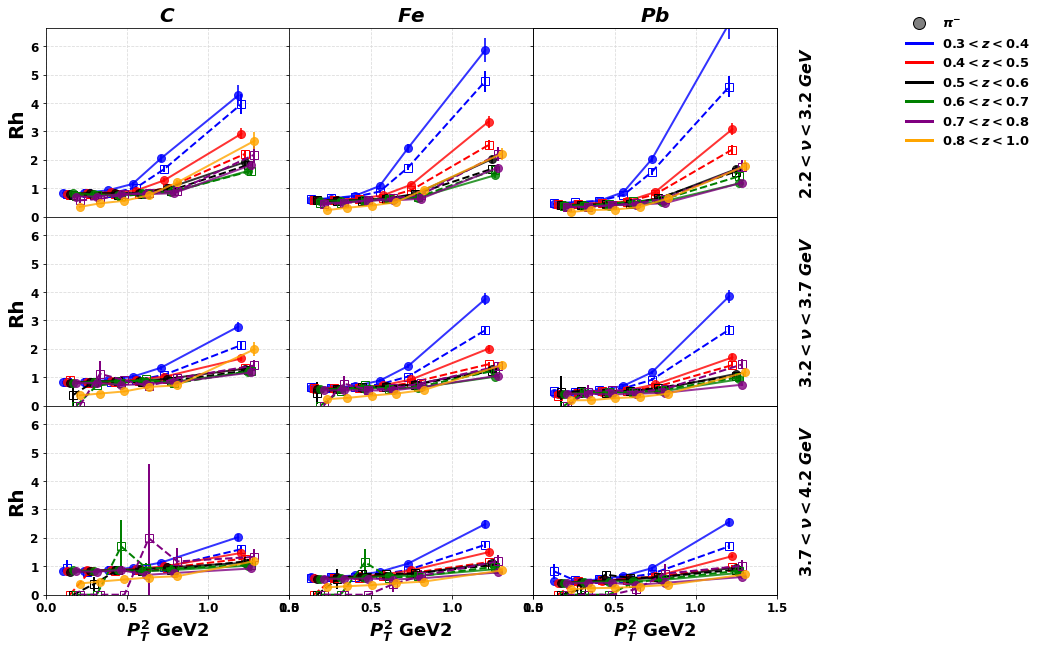

In [22]:
fig, axs = plt.subplots(3, 3,sharex=True, sharey=True,figsize=(16,9),gridspec_kw={'hspace': 0, 'wspace':0})
color_list = plt.cm.tab20c(np.linspace(0, 1, 5))

zlabel = {} 
zlabel['bin_4'] = '$0.3<z<0.4$' 
zlabel['bin_5'] = '$0.4<z<0.5$' 
zlabel['bin_6'] = '$0.5<z<0.6$' 
zlabel['bin_7'] = '$0.6<z<0.7$' 
zlabel['bin_8'] = '$0.7<z<0.8$' 
zlabel['bin_9'] = '$0.8<z<1.0$' 

nulabel2 = {} 
nulabel2['bin_1'] =  r'Rh' 
nulabel2['bin_2'] =  r'Rh' 
nulabel2['bin_3'] =  r'Rh' 

nulabel = {} 
nulabel['bin_1'] = r'$C$' 
nulabel['bin_2'] =  r'$Fe$' 
nulabel['bin_3'] =  r'$Pb$'

colors = {}
colors['bin_4'] = 'cyan'
colors['bin_5'] = 'orange'
colors['bin_6']=  'red'
colors['bin_7'] = 'green'
colors['bin_8'] = 'purple'
colors['bin_9']=  'black'


marker = {}
marker['bin_1'] = 'full'
marker['bin_2'] = 'none'
marker['bin_3'] = 'full'
transp_alpha = 0.8 
sysError=0.05

for nubin in range(1,4):
    for zbin in range(4,10):
        skip = 2
        if(nubin==3): 
            skip = 3
        y=ydata
        x=xdata            
        if True:
            ibin = 'pip_zh_%ibin_nu_%ibin'%(zbin,nubin)
            key = 'C_'+ibin

            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
    
            axs[nubin-1,0].errorbar(x[key]+0.02*(zbin-1),y[key],yerr=totalerror,color=colors['bin_%i'%zbin],
                                    fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                    ms=8,label=nulabel['bin_%i'%nubin], ls='-')
            key = 'Fe_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,1].errorbar(x[key]+0.02*zbin,y[key],yerr=totalerror,color=colors['bin_%i'%zbin],
                                    fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                    ms=8,label=nulabel['bin_%i'%nubin], ls='-')
            key = 'Pb_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,2].errorbar(x[key]+0.02*zbin,y[key],yerr=totalerror,color=colors['bin_%i'%zbin],
                                    fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                    ms=8,label=nulabel['bin_%i'%nubin], ls='-')
        #pi minus
        if zbin!=9:
            ibin = 'pim_zh_%ibin_nu_%ibin'%(zbin,nubin)
            key = 'C_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            #print(totalerror)
            axs[nubin-1,0].errorbar(x[key]+0.02*zbin,y[key],yerr=totalerror,
                                    color=colors['bin_%i'%zbin],fmt='s',fillstyle=marker['bin_2'],
                                    lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin], ls='--')
            
            key = 'Fe_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,1].errorbar(x[key]+0.02*zbin,y[key],yerr=totalerror,
                                    color=colors['bin_%i'%zbin],fmt='s',fillstyle=marker['bin_2'],
                                    lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin], ls='--')
            key = 'Pb_'+ibin

            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,2].errorbar(x[key]+0.02*zbin,y[key],yerr=totalerror,
                                    color=colors['bin_%i'%zbin],fmt='s',fillstyle=marker['bin_2'],
                                    lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin], ls='--')
    
        
        axs[2,nubin-1].xaxis.set_label_text('$P_{T}^{2}$ GeV2',fontsize=18, fontweight='bold')
        axs[0,nubin-1].set_ylim([0.0,6.65])
        axs[1,nubin-1].set_ylim([0.0,6.65])
        
        
        axs[0,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[1,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[2,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[0,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        axs[1,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        axs[2,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        
        axs[0,nubin-1].set_xlim([0.0,1.5])
        #axs[0,nubin-1].set_xticks(np.arange(0,1.5,0.2))
        #axs[0,nubin-1].set_yticks(np.arange(0,2.5,0.25))

    #axs[q2bin-1].legend(loc='best',ncol=3,frameon=False,fontsize=15)
    axs[0,nubin-1].set_title(nulabel['bin_%i'%nubin],fontsize=20)
    
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

h3, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='gray', mew=1, alpha=1.0)

h4, = axs[0,0].plot([], ls='none', marker='s', fillstyle='none',
              ms=12, mec='black', mfc='white', mew=1, alpha=1.0)

h5, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='black', mew=1, alpha=1.0)

handles = [ h3,Line2D([0], [0], color=colors['bin_4'], lw=3),
                Line2D([0], [0], color=colors['bin_5'], lw=3),
                Line2D([0], [0], color=colors['bin_6'], lw=3) ,
          Line2D([0], [0], color=colors['bin_7'], lw=3),
                Line2D([0], [0], color=colors['bin_8'], lw=3),
                Line2D([0], [0], color=colors['bin_9'], lw=3) ]

handles = [handles[i] for i in [0,1,2,3,4,5,6]]
line_labels =[r'$\pi^{-}$' , r'$0.3<z<0.4$',
              r'$0.4<z<0.5$',r'$0.5<z<0.6$',r'$0.6<z<0.7$',r'$0.7<z<0.8$',r'$0.8<z<1.0$' ]
fig.legend(handles=handles,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=1,    # Small spacing around legend box
           #title="  " , # Title for the legend
           frameon=False,
           fontsize=13
          )

plt.subplots_adjust(right=0.76,top=1)
for i in range(0,3):
    axs[i,0].tick_params(axis='y', which='major', labelsize=12)
    axs[2,i].tick_params(axis='both', which='major', labelsize=12)
nulabel3 = {} 
nulabel3['bin_1'] = r'$2.2<\nu<3.2$ $GeV$' 
nulabel3['bin_2'] =  r'$3.2<\nu<3.7$ $GeV$'  
nulabel3['bin_3'] =  r'$3.7<\nu<4.2$ $GeV$'  

ax01 = axs[0,2].twinx()
ax01.tick_params(axis='y', colors='red')  
ax01.yaxis.set_label_text('\n' + nulabel3['bin_1'] ,fontsize=16, color='black')
ax01.set_ylim([3.2,2.21])
ax01.set_yticks(np.arange(3.2,2.21,1))
ax02 = axs[1,2].twinx()
ax02.tick_params(axis='y', colors='red')  
ax02.yaxis.set_label_text( '\n' + nulabel3['bin_2'] ,fontsize=16, color='black')
ax02.set_ylim([3.2,2.21])
ax02.set_yticks(np.arange(3.2,2.21,1))

ax03 = axs[2,2].twinx()
ax03.tick_params(axis='y', colors='red')  
ax03.yaxis.set_label_text('\n' + nulabel3['bin_3'] ,fontsize=16, color='black')
ax03.set_ylim([3.2,2.21])
ax03.set_yticks(np.arange(3.2,2.21,1))

axs[0,0].yaxis.set_label_text(nulabel2['bin_1'],fontsize=20, fontweight='bold')
axs[1,0].yaxis.set_label_text(nulabel2['bin_2'],fontsize=20, fontweight='bold')
axs[2,0].yaxis.set_label_text(nulabel2['bin_3'],fontsize=20, fontweight='bold')
#plt.savefig('3D_chargedPions.pdf', bbox_inches='tight')
#plt.savefig('test.png', bbox_inches='tight')

**GiBUU only**

(0.0, 6.7)

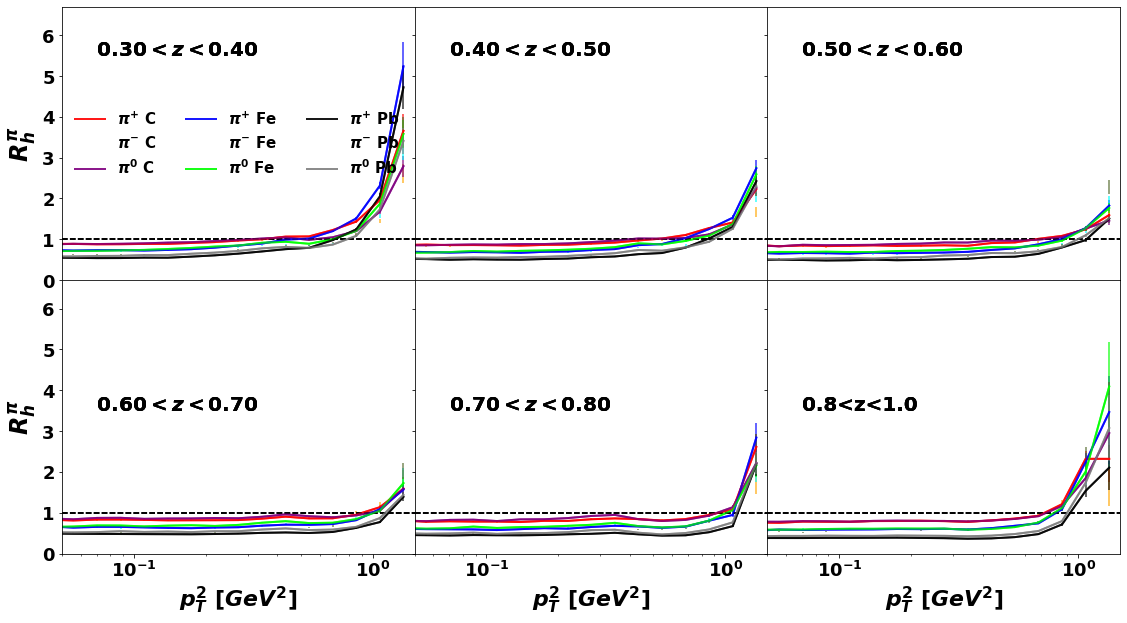

In [23]:
fig, axs = plt.subplots(2, 3,sharex=True,sharey='row',figsize=(16,9),gridspec_kw={'hspace': 0, 'wspace':0})
sysError=0.05

CroninBins_pip = np.logspace(np.log10(0.02),np.log10(1.5),20)#np.array([0.0,0.1,0.25,0.4,0.55,0.75,1.0,1.25])
colors={}
colors['C'] = 'red'#'#1f77b4'
colors['Fe'] = 'blue'#'#ff7f0e'
colors['Pb']=  'black'#'#2ca02c'

colors2={}
colors2['C'] = 'orange'#'#1f77b4'
colors2['Fe'] = 'cyan'#'#ff7f0e'
colors2['Pb']=  'darkolivegreen'#'#2ca02c'

colors3={}
colors3['C'] = 'purple'#'#1f77b4'
colors3['Fe'] = 'lime'#'#ff7f0e'
colors3['Pb']=  'gray'#'#2ca02c'

for zbin in range(1,10):
    if(zbin==1 or zbin==2 or zbin==3): continue
    col = ((zbin-1)%3)
    row = ((zbin-1)//3)-1
    if zbin!=9:
        zquery = ' z>%2.2f and z<%2.2f'%((zbin-1)*0.1,zbin*0.1)
        label = '%2.2f<z<%2.2f'%(((zbin-1)*0.1,zbin*0.1))
    if zbin==9:
        zquery = ' z>0.8 and z<1.0'
        label = '0.8<z<1.0'        
        
    for i,target in enumerate(['C','Fe','Pb']):
    #zquery = ' z>0.3 and z<0.8'
        #print(i)
        r, err,x = getRatio(df['GiBUU_%s_hadron'%target].query('pid==211 and' +zquery), 
                            df['GiBUU_D_hadron'].query('pid==211 and' + zquery),
                            df['GiBUU_%s_electron'%target], df['GiBUU_D_electron'],
                             variable='pt2',mybins=CroninBins_pip)
        #axs[row,col].fill_between(x,r-err,r+err,label='GiBUU %s'%target)
        axs[0,col].set_ylim(bottom=0.0,top=7.1)
        axs[1,col].set_ylim(bottom=0.0,top=4.3)
        axs[row,col].set_xlim(left=0.05,right=1.5)

        axs[row,col].errorbar(x,r,yerr=err,color=colors['%s'%target],lw=2,alpha=0.6,ls='-')#,ds='steps')
        axs[row,col].plot(x,r,label='$\pi^{+}$ %s'%target,color=colors['%s'%target],lw=2,alpha=0.9,ls='-')#,ds='steps')

        r, err,x = getRatio(df['GiBUU_%s_hadron'%target].query('pid==-211 and' +zquery), 
                            df['GiBUU_D_hadron'].query('pid==-211 and' + zquery),
                            df['GiBUU_%s_electron'%target], df['GiBUU_D_electron'],
                             variable='pt2',mybins=CroninBins_pip)
        #axs[row,col].fill_between(x,r-err,r+err,label='GiBUU %s'%target)
        axs[0,col].set_ylim(bottom=0.0,top=7.1)
        axs[1,col].set_ylim(bottom=0.0,top=4.3)
        axs[row,col].set_xlim(left=0.05,right=1.5)
        
        axs[row,col].errorbar(x,r,yerr=err,color=colors2['%s'%target],lw=2,alpha=0.6, ls='')#,ds='steps')
        axs[row,col].plot(x,r,label='$\pi^{-}$ %s'%target,color=colors2['%s'%target],lw=2,ls='',alpha=0.9)#,ds='steps')

        r, err,x = getRatio(df['GiBUU_%s_hadron'%target].query('pid==111 and' +zquery), 
                            df['GiBUU_D_hadron'].query('pid==111 and' + zquery),
                            df['GiBUU_%s_electron'%target], df['GiBUU_D_electron'],
                             variable='pt2',mybins=CroninBins_pip)
        #axs[row,col].fill_between(x,r-err,r+err,label='GiBUU %s'%target)
        axs[0,col].set_ylim(bottom=0.0,top=7.1)
        axs[1,col].set_ylim(bottom=0.0,top=4.3)
        axs[row,col].set_xlim(left=0.05,right=1.5)
        
        axs[row,col].errorbar(x,r,yerr=err,color=colors3['%s'%target],lw=2,alpha=0.6, ls='-')#,ds='steps')
        axs[row,col].plot(x,r,label='$\pi^{0}$ %s'%target,color=colors3['%s'%target],lw=2,ls='-',alpha=0.9)#,ds='steps')

                
        
        axs[row,col].xaxis.set_label_text('$p_{T}^{2}$ $[GeV^{2}]$',fontsize=22)
        axs[row,0].yaxis.set_label_text('$R_{h}^{\pi}$',fontsize=24)
        axs[row,col].axhline(y=1.0,color='black',linestyle='--')
        axs[row,col].set_xscale('log')
        #axs[row,col].set_yscale('log')

        zmax = 0.1*zbin
        zmin = 0.1*(zbin-1)
        title=r'     %2.2f$<z<$%2.2f'%(zmin,zmax)
        title2=r'     0.8<z<1.0'
        if (not(row==1 and col==2)  ):
            if(row==0):
                axs[row,col].text(0.05, 5.5,title, fontsize=20)
            else:
                axs[row,col].text(0.05, 3.5,title, fontsize=20)
            
        if (row==1 and col==2):   
            axs[row,col].text(0.05, 3.5,title2, fontsize=20)            
            
leg = axs[0,0].legend(frameon=False,ncol=3,loc='center left',fontsize=15)  
plt.setp(leg.get_title(),fontsize=20)

plt.tight_layout()
#axs[0,0].grid(True, axis='y',color='gainsboro', linestyle='dashed')
#axs[0,1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
#axs[0,2].grid(True, axis='y',color='gainsboro', linestyle='dashed')
#axs[1,0].grid(True, axis='y',color='gainsboro', linestyle='dashed')
#axs[1,1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
#axs[1,2].grid(True, axis='y',color='gainsboro', linestyle='dashed')

#plt.savefig('Cronin_pip.pdf', bbox_inches='tight')
axs[0,0].set_ylim([0.,6.7])
axs[1,0].set_ylim([0.,6.7])

**3D cronin-like as a function of pt2 for GiBUU only, three pions comparison**

 z>0.300000 and z<0.400000 and  Nu>2.200000 and Nu<3.200000
 z>0.400000 and z<0.500000 and  Nu>2.200000 and Nu<3.200000
 z>0.500000 and z<0.600000 and  Nu>2.200000 and Nu<3.200000
 z>0.600000 and z<0.700000 and  Nu>2.200000 and Nu<3.200000
 z>0.700000 and z<0.800000 and  Nu>2.200000 and Nu<3.200000
 z>0.800000 and z<1.000000 and  Nu>2.200000 and Nu<3.200000
 z>0.300000 and z<0.400000 and  Nu>3.200000 and Nu<3.730000
 z>0.400000 and z<0.500000 and  Nu>3.200000 and Nu<3.730000
 z>0.500000 and z<0.600000 and  Nu>3.200000 and Nu<3.730000
 z>0.600000 and z<0.700000 and  Nu>3.200000 and Nu<3.730000
 z>0.700000 and z<0.800000 and  Nu>3.200000 and Nu<3.730000
 z>0.800000 and z<1.000000 and  Nu>3.200000 and Nu<3.730000
 z>0.300000 and z<0.400000 and  Nu>3.730000 and Nu<4.250000
 z>0.400000 and z<0.500000 and  Nu>3.730000 and Nu<4.250000
 z>0.500000 and z<0.600000 and  Nu>3.730000 and Nu<4.250000
 z>0.600000 and z<0.700000 and  Nu>3.730000 and Nu<4.250000
 z>0.700000 and z<0.800000 and  Nu>3.730

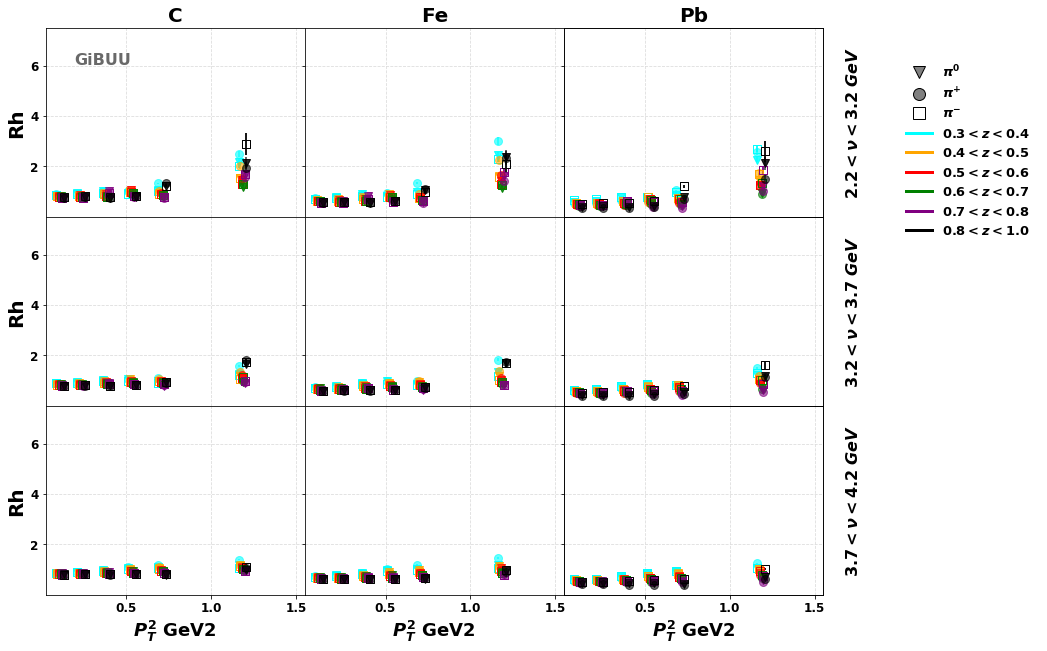

In [75]:
fig, axs = plt.subplots(3, 3,sharex=True, sharey=True,figsize=(16,9),gridspec_kw={'hspace': 0, 'wspace':0})
color_list = plt.cm.tab20c(np.linspace(0, 1, 5))

zlabel = {} 
zlabel['bin_4'] = '$0.3<z<0.4$' 
zlabel['bin_5'] = '$0.4<z<0.5$' 
zlabel['bin_6'] = '$0.5<z<0.6$' 
zlabel['bin_7'] = '$0.6<z<0.7$' 
zlabel['bin_8'] = '$0.7<z<0.8$' 
zlabel['bin_9'] = '$0.8<z<1.0$' 

nulabel2 = {} 
nulabel2['bin_1'] =  r'Rh' 
nulabel2['bin_2'] =  r'Rh' 
nulabel2['bin_3'] =  r'Rh' 

nulabel = {} 
nulabel['bin_1'] = r'C' 
nulabel['bin_2'] =  r'Fe' 
nulabel['bin_3'] =  r'Pb'

colors = {}

colors['bin_4'] = 'cyan'
colors['bin_5'] = 'orange'
colors['bin_6']=  'red'
colors['bin_7'] = 'green'
colors['bin_8'] = 'purple'
colors['bin_9']=  'black'

marker = {}
marker['bin_1'] = 'full'
marker['bin_2'] = 'none'
marker['bin_3'] = 'full'
z_lim=[0,0,0,0,0.3, 0.4,0.5,0.6,0.7,0.8,1.0]
nu_lim=[0,2.2,3.2,3.73,4.25]
CroninBins_pip = np.array([0.0, 0.1, 0.25, 0.4, 0.55, 0.75, 1.5])
#CroninBins_pip = np.logspace(np.log10(0.02),np.log10(1.5),20)#np.array([0.0,0.1,0.25,0.4,0.55,0.75,1.0,1.25])


transp_alpha = 0.8 
sysError=0.05
shiftx=0.009
for nubin in range(1,4):
    for zbin in range(4,10):
        zquery=' z>%f and z<%f and '%(z_lim[zbin], z_lim[zbin+1])
        nuquery=' Nu>%f and Nu<%f'%(nu_lim[nubin], nu_lim[nubin+1])
        query= zquery+nuquery
        print(query)
        
        
        for i,target in enumerate(['C','Fe','Pb']):
    
            r, err,x = getRatio(df['GiBUU_%s_hadron'%target].query('pid==211 and' +query), 
                                df['GiBUU_D_hadron'].query('pid==211 and' + query),
                                df['GiBUU_%s_electron'%target].query(nuquery), df['GiBUU_D_electron'].query(nuquery),
                                 variable='pt2',mybins=CroninBins_pip)

            axs[nubin-1,i].errorbar(x+shiftx*zbin,r,yerr=err,color=colors['bin_%i'%zbin],lw=2,alpha=0.6,ls='',marker='o',ms=8)#,ds='steps')
            axs[nubin-1,i].plot(x+shiftx*zbin,r,label='$\pi^{+}$ %s'%target,color=colors['bin_%i'%zbin],lw=2,alpha=0.6,ls='',ms=8)#,ds='steps')
        
        for i,target in enumerate(['C','Fe','Pb']):
    
            r, err,x = getRatio(df['GiBUU_%s_hadron'%target].query('pid==-211 and' +query), 
                                df['GiBUU_D_hadron'].query('pid==-211 and' + query),
                                df['GiBUU_%s_electron'%target].query(nuquery), df['GiBUU_D_electron'].query(nuquery),
                                 variable='pt2',mybins=CroninBins_pip)

            axs[nubin-1,i].errorbar(x+shiftx*zbin,r,yerr=err,color=colors['bin_%i'%zbin],lw=2,alpha=0.9,ls='',marker='s',fillstyle='none',ms=8)#,ds='steps')
            axs[nubin-1,i].plot(x+shiftx*zbin,r,label='$\pi^{-}$ %s'%target,color=colors['bin_%i'%zbin],lw=2,alpha=0.9,ls='',marker='s',fillstyle='none',ms=8)#,ds='steps')
        
        
        for i,target in enumerate(['C','Fe','Pb']):
    
            r, err,x = getRatio(df['GiBUU_%s_hadron'%target].query('pid==111 and' +query), 
                                df['GiBUU_D_hadron'].query('pid==111 and' + query),
                                df['GiBUU_%s_electron'%target].query(nuquery), df['GiBUU_D_electron'].query(nuquery),
                                 variable='pt2',mybins=CroninBins_pip)

            axs[nubin-1,i].errorbar(x+shiftx*zbin,r,yerr=err,color=colors['bin_%i'%zbin],lw=2,alpha=0.6,ls='',marker='v',fillstyle='full',ms=8)#,ds='steps')
            axs[nubin-1,i].plot(x+shiftx*zbin,r,label='$\pi^{0}$ %s'%target,color=colors['bin_%i'%zbin],lw=2,alpha=0.6,ls='',marker='v',fillstyle='full',ms=8)#,ds='steps')
  
        axs[2,nubin-1].xaxis.set_label_text('$P_{T}^{2}$ GeV2',fontsize=18, fontweight='bold')
        axs[0,nubin-1].set_ylim([0.001,7.5])
        axs[1,nubin-1].set_ylim([0.001,7.5])
        
        
        axs[0,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[1,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[2,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[0,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        axs[1,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        axs[2,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        
        axs[0,nubin-1].set_xlim([0.025,1.55])
        #axs[0,nubin-1].set_xticks(np.arange(0,1.5,0.2))
        #axs[0,nubin-1].set_yticks(np.arange(0,2.5,0.25))

    #axs[q2bin-1].legend(loc='best',ncol=3,frameon=False,fontsize=15)
    axs[0,nubin-1].set_title(nulabel['bin_%i'%nubin],fontsize=20, fontweight='bold')

    
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
h32, = axs[0,0].plot([], ls='none', marker='v', fillstyle='full',
              ms=12, mec='black', mfc='gray', mew=1, alpha=1.0)
h3, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='gray', mew=1, alpha=1.0)

h4, = axs[0,0].plot([], ls='none', marker='s', fillstyle='none',
              ms=12, mec='black', mfc='white', mew=1, alpha=1.0)

h5, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='black', mew=1, alpha=1.0)

handles = [h32, h3,h4,Line2D([0], [0], color=colors['bin_4'], lw=3),
                Line2D([0], [0], color=colors['bin_5'], lw=3),
                Line2D([0], [0], color=colors['bin_6'], lw=3) ,
          Line2D([0], [0], color=colors['bin_7'], lw=3),
                Line2D([0], [0], color=colors['bin_8'], lw=3),
                Line2D([0], [0], color=colors['bin_9'], lw=3) ]

handles = [handles[i] for i in [0,1,2,3,4,5,6,7,8]]
line_labels =[r'$\pi^{0}$' ,r'$\pi^{+}$' , r'$\pi^{-}$', r'$0.3<z<0.4$',
              r'$0.4<z<0.5$',r'$0.5<z<0.6$',r'$0.6<z<0.7$',r'$0.7<z<0.8$',r'$0.8<z<1.0$' ]
fig.legend(handles=handles,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=1,    # Small spacing around legend box
           title='\n' , # Title for the legend
           frameon=False,
           fontsize=13
          )

plt.subplots_adjust(right=0.8,top=1)
for i in range(0,3):
    axs[i,0].tick_params(axis='y', which='major', labelsize=12)
    axs[2,i].tick_params(axis='both', which='major', labelsize=12)
nulabel3 = {} 
nulabel3['bin_1'] = r'$2.2<\nu<3.2$ $GeV$' 
nulabel3['bin_2'] =  r'$3.2<\nu<3.7$ $GeV$'  
nulabel3['bin_3'] =  r'$3.7<\nu<4.2$ $GeV$'  

ax01 = axs[0,2].twinx()
ax01.tick_params(axis='y', colors='red')  
ax01.yaxis.set_label_text('\n' + nulabel3['bin_1'] ,fontsize=16, color='black')
ax01.set_ylim([3.2,2.21])
ax01.set_yticks(np.arange(3.2,2.21,1))
ax02 = axs[1,2].twinx()
ax02.tick_params(axis='y', colors='red')  
ax02.yaxis.set_label_text( '\n' + nulabel3['bin_2'] ,fontsize=16, color='black')
ax02.set_ylim([3.2,2.21])
ax02.set_yticks(np.arange(3.2,2.21,1))

ax03 = axs[2,2].twinx()
ax03.tick_params(axis='y', colors='red')  
ax03.yaxis.set_label_text('\n' + nulabel3['bin_3'] ,fontsize=16, color='black')
ax03.set_ylim([3.2,2.21])
ax03.set_yticks(np.arange(3.2,2.21,1))
fig.text(0.15, 0.95, 'GiBUU', fontsize=16, va='center', fontweight='bold', color='dimgray')

axs[0,0].yaxis.set_label_text(nulabel2['bin_1'],fontsize=20, fontweight='bold')
axs[1,0].yaxis.set_label_text(nulabel2['bin_2'],fontsize=20, fontweight='bold')
axs[2,0].yaxis.set_label_text(nulabel2['bin_3'],fontsize=20, fontweight='bold')
#axs[0,0].set_yscale('log')
plt.savefig('3D_chargedPions_Cronin_TAYA_Binning_GiBUU.pdf', bbox_inches='tight')
#plt.savefig('test.png', bbox_inches='tight')

**Now, with the binning I used in the note**

 z>0.300000 and z<0.400000 and  Nu>2.200000 and Nu<3.200000
 z>0.400000 and z<0.500000 and  Nu>2.200000 and Nu<3.200000
 z>0.500000 and z<0.600000 and  Nu>2.200000 and Nu<3.200000
 z>0.600000 and z<0.700000 and  Nu>2.200000 and Nu<3.200000
 z>0.700000 and z<0.800000 and  Nu>2.200000 and Nu<3.200000
 z>0.800000 and z<1.000000 and  Nu>2.200000 and Nu<3.200000
 z>0.300000 and z<0.400000 and  Nu>3.200000 and Nu<3.730000
 z>0.400000 and z<0.500000 and  Nu>3.200000 and Nu<3.730000
 z>0.500000 and z<0.600000 and  Nu>3.200000 and Nu<3.730000
 z>0.600000 and z<0.700000 and  Nu>3.200000 and Nu<3.730000
 z>0.700000 and z<0.800000 and  Nu>3.200000 and Nu<3.730000
 z>0.800000 and z<1.000000 and  Nu>3.200000 and Nu<3.730000
 z>0.300000 and z<0.400000 and  Nu>3.730000 and Nu<4.250000
 z>0.400000 and z<0.500000 and  Nu>3.730000 and Nu<4.250000
 z>0.500000 and z<0.600000 and  Nu>3.730000 and Nu<4.250000
 z>0.600000 and z<0.700000 and  Nu>3.730000 and Nu<4.250000
 z>0.700000 and z<0.800000 and  Nu>3.730

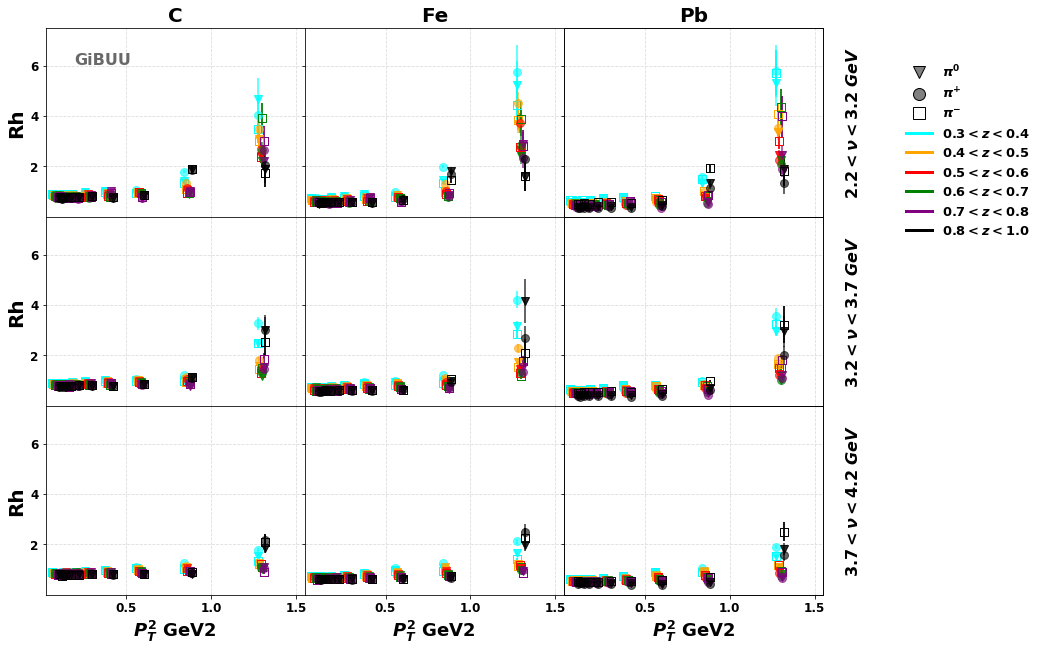

In [76]:
fig, axs = plt.subplots(3, 3,sharex=True, sharey=True,figsize=(16,9),gridspec_kw={'hspace': 0, 'wspace':0})
color_list = plt.cm.tab20c(np.linspace(0, 1, 5))

zlabel = {} 
zlabel['bin_4'] = '$0.3<z<0.4$' 
zlabel['bin_5'] = '$0.4<z<0.5$' 
zlabel['bin_6'] = '$0.5<z<0.6$' 
zlabel['bin_7'] = '$0.6<z<0.7$' 
zlabel['bin_8'] = '$0.7<z<0.8$' 
zlabel['bin_9'] = '$0.8<z<1.0$' 

nulabel2 = {} 
nulabel2['bin_1'] =  r'Rh' 
nulabel2['bin_2'] =  r'Rh' 
nulabel2['bin_3'] =  r'Rh' 

nulabel = {} 
nulabel['bin_1'] = r'C' 
nulabel['bin_2'] =  r'Fe' 
nulabel['bin_3'] =  r'Pb'

colors = {}

colors['bin_4'] = 'cyan'
colors['bin_5'] = 'orange'
colors['bin_6']=  'red'
colors['bin_7'] = 'green'
colors['bin_8'] = 'purple'
colors['bin_9']=  'black'

marker = {}
marker['bin_1'] = 'full'
marker['bin_2'] = 'none'
marker['bin_3'] = 'full'
z_lim=[0,0,0,0,0.3, 0.4,0.5,0.6,0.7,0.8,1.0]
nu_lim=[0,2.2,3.2,3.73,4.25]
CroninBins_pip = np.array([0.02, 0.03079896 ,0.04742881, 0.07303792, 0.11247461, 0.17320508, 0.26672686, 0.41074556, 0.63252691, 0.97405871, 1.5])
#CroninBins_pip = np.logspace(np.log10(0.02),np.log10(1.5),20)#np.array([0.0,0.1,0.25,0.4,0.55,0.75,1.0,1.25])


transp_alpha = 0.8 
sysError=0.05
shiftx=0.009
for nubin in range(1,4):
    for zbin in range(4,10):
        zquery=' z>%f and z<%f and '%(z_lim[zbin], z_lim[zbin+1])
        nuquery=' Nu>%f and Nu<%f'%(nu_lim[nubin], nu_lim[nubin+1])
        query= zquery+nuquery
        print(query)
        
        
        for i,target in enumerate(['C','Fe','Pb']):
    
            r, err,x = getRatio(df['GiBUU_%s_hadron'%target].query('pid==211 and' +query), 
                                df['GiBUU_D_hadron'].query('pid==211 and' + query),
                                df['GiBUU_%s_electron'%target].query(nuquery), df['GiBUU_D_electron'].query(nuquery),
                                 variable='pt2',mybins=CroninBins_pip)

            axs[nubin-1,i].errorbar(x+shiftx*zbin,r,yerr=err,color=colors['bin_%i'%zbin],lw=2,alpha=0.6,ls='',marker='o',ms=8)#,ds='steps')
            axs[nubin-1,i].plot(x+shiftx*zbin,r,label='$\pi^{+}$ %s'%target,color=colors['bin_%i'%zbin],lw=2,alpha=0.6,ls='',ms=8)#,ds='steps')
        
        for i,target in enumerate(['C','Fe','Pb']):
    
            r, err,x = getRatio(df['GiBUU_%s_hadron'%target].query('pid==-211 and' +query), 
                                df['GiBUU_D_hadron'].query('pid==-211 and' + query),
                                df['GiBUU_%s_electron'%target].query(nuquery), df['GiBUU_D_electron'].query(nuquery),
                                 variable='pt2',mybins=CroninBins_pip)

            axs[nubin-1,i].errorbar(x+shiftx*zbin,r,yerr=err,color=colors['bin_%i'%zbin],lw=2,alpha=0.9,ls='',marker='s',fillstyle='none',ms=8)#,ds='steps')
            axs[nubin-1,i].plot(x+shiftx*zbin,r,label='$\pi^{-}$ %s'%target,color=colors['bin_%i'%zbin],lw=2,alpha=0.9,ls='',marker='s',fillstyle='none',ms=8)#,ds='steps')
        
        
        for i,target in enumerate(['C','Fe','Pb']):
    
            r, err,x = getRatio(df['GiBUU_%s_hadron'%target].query('pid==111 and' +query), 
                                df['GiBUU_D_hadron'].query('pid==111 and' + query),
                                df['GiBUU_%s_electron'%target].query(nuquery), df['GiBUU_D_electron'].query(nuquery),
                                 variable='pt2',mybins=CroninBins_pip)

            axs[nubin-1,i].errorbar(x+shiftx*zbin,r,yerr=err,color=colors['bin_%i'%zbin],lw=2,alpha=0.6,ls='',marker='v',fillstyle='full',ms=8)#,ds='steps')
            axs[nubin-1,i].plot(x+shiftx*zbin,r,label='$\pi^{0}$ %s'%target,color=colors['bin_%i'%zbin],lw=2,alpha=0.6,ls='',marker='v',fillstyle='full',ms=8)#,ds='steps')
  
        axs[2,nubin-1].xaxis.set_label_text('$P_{T}^{2}$ GeV2',fontsize=18, fontweight='bold')
        axs[0,nubin-1].set_ylim([0.001,7.5])
        axs[1,nubin-1].set_ylim([0.001,7.5])
        
        
        axs[0,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[1,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[2,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[0,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        axs[1,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        axs[2,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        
        axs[0,nubin-1].set_xlim([0.025,1.55])
        #axs[0,nubin-1].set_xticks(np.arange(0,1.5,0.2))
        #axs[0,nubin-1].set_yticks(np.arange(0,2.5,0.25))

    #axs[q2bin-1].legend(loc='best',ncol=3,frameon=False,fontsize=15)
    axs[0,nubin-1].set_title(nulabel['bin_%i'%nubin],fontsize=20, fontweight='bold')

    
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
h32, = axs[0,0].plot([], ls='none', marker='v', fillstyle='full',
              ms=12, mec='black', mfc='gray', mew=1, alpha=1.0)
h3, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='gray', mew=1, alpha=1.0)

h4, = axs[0,0].plot([], ls='none', marker='s', fillstyle='none',
              ms=12, mec='black', mfc='white', mew=1, alpha=1.0)

h5, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='black', mew=1, alpha=1.0)

handles = [h32, h3,h4,Line2D([0], [0], color=colors['bin_4'], lw=3),
                Line2D([0], [0], color=colors['bin_5'], lw=3),
                Line2D([0], [0], color=colors['bin_6'], lw=3) ,
          Line2D([0], [0], color=colors['bin_7'], lw=3),
                Line2D([0], [0], color=colors['bin_8'], lw=3),
                Line2D([0], [0], color=colors['bin_9'], lw=3) ]

handles = [handles[i] for i in [0,1,2,3,4,5,6,7,8]]
line_labels =[r'$\pi^{0}$' ,r'$\pi^{+}$' , r'$\pi^{-}$', r'$0.3<z<0.4$',
              r'$0.4<z<0.5$',r'$0.5<z<0.6$',r'$0.6<z<0.7$',r'$0.7<z<0.8$',r'$0.8<z<1.0$' ]
fig.legend(handles=handles,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=1,    # Small spacing around legend box
           title='\n' , # Title for the legend
           frameon=False,
           fontsize=13
          )

plt.subplots_adjust(right=0.8,top=1)
for i in range(0,3):
    axs[i,0].tick_params(axis='y', which='major', labelsize=12)
    axs[2,i].tick_params(axis='both', which='major', labelsize=12)
nulabel3 = {} 
nulabel3['bin_1'] = r'$2.2<\nu<3.2$ $GeV$' 
nulabel3['bin_2'] =  r'$3.2<\nu<3.7$ $GeV$'  
nulabel3['bin_3'] =  r'$3.7<\nu<4.2$ $GeV$'  

ax01 = axs[0,2].twinx()
ax01.tick_params(axis='y', colors='red')  
ax01.yaxis.set_label_text('\n' + nulabel3['bin_1'] ,fontsize=16, color='black')
ax01.set_ylim([3.2,2.21])
ax01.set_yticks(np.arange(3.2,2.21,1))
ax02 = axs[1,2].twinx()
ax02.tick_params(axis='y', colors='red')  
ax02.yaxis.set_label_text( '\n' + nulabel3['bin_2'] ,fontsize=16, color='black')
ax02.set_ylim([3.2,2.21])
ax02.set_yticks(np.arange(3.2,2.21,1))

ax03 = axs[2,2].twinx()
ax03.tick_params(axis='y', colors='red')  
ax03.yaxis.set_label_text('\n' + nulabel3['bin_3'] ,fontsize=16, color='black')
ax03.set_ylim([3.2,2.21])
ax03.set_yticks(np.arange(3.2,2.21,1))
fig.text(0.15, 0.95, 'GiBUU', fontsize=16, va='center', fontweight='bold', color='dimgray')

axs[0,0].yaxis.set_label_text(nulabel2['bin_1'],fontsize=20, fontweight='bold')
axs[1,0].yaxis.set_label_text(nulabel2['bin_2'],fontsize=20, fontweight='bold')
axs[2,0].yaxis.set_label_text(nulabel2['bin_3'],fontsize=20, fontweight='bold')
#axs[0,0].set_yscale('log')
plt.savefig('3D_chargedPions_Cronin_ANANOTE_Binning_GiBUU.pdf', bbox_inches='tight')
#plt.savefig('test.png', bbox_inches='tight')

**The 3D comparison between pi+ and pi- for the binning choice that it is in the note**

In [77]:
file_pip_nu_dep2 = TFile.Open('NOTE_bin_Pt2_MR_pip.root')
file_pim_nu_dep2 = TFile.Open('NOTE_bin_Pt2_MR_pim.root')

ydata2 = {}
xdata2 = {} 
erry2={}
for nubin in range(1,4):
    for zbin in range (4,10):
        data2 = file_pip_nu_dep2.Get('g_zh_%i_C_nu_%i'%(zbin,nubin))
        #print('g_zh_%i_C_nu_%i'%(zbin, nubin))
        #print('data type is :', zbin , type(data))
        ydata2['C_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetY(),copy=True)
        xdata2['C_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetX(),copy=True)
        erry2['C_pip_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data2.GetEY(),copy=True)

        data2 = file_pip_nu_dep2.Get('g_zh_%i_Fe_nu_%i'%(zbin, nubin))
        ydata2['Fe_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetY(),copy=True)
        xdata2['Fe_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetX(),copy=True)
        erry2['Fe_pip_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data2.GetEY(),copy=True)
        
        data2 = file_pip_nu_dep2.Get('g_zh_%i_Pb_nu_%i'%(zbin, nubin))
        ydata2['Pb_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetY(),copy=True)
        xdata2['Pb_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetX(),copy=True)
        erry2['Pb_pip_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data2.GetEY(),copy=True)
        ## Pi MINUS
        data2 = file_pim_nu_dep2.Get('g_zh_%i_C_nu_%i'%(zbin, nubin))
        ydata2['C_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetY(),copy=True)
        xdata2['C_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetX(),copy=True)
        erry2['C_pim_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data2.GetEY(),copy=True)

        data2 = file_pim_nu_dep2.Get('g_zh_%i_Fe_nu_%i'%(zbin, nubin))
        ydata2['Fe_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetY(),copy=True)
        xdata2['Fe_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetX(),copy=True)
        erry2['Fe_pim_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data2.GetEY(),copy=True)
        
        data2 = file_pim_nu_dep2.Get('g_zh_%i_Pb_nu_%i'%(zbin, nubin))
        ydata2['Pb_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetY(),copy=True)
        xdata2['Pb_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetX(),copy=True)
        erry2['Pb_pim_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data2.GetEY(),copy=True)




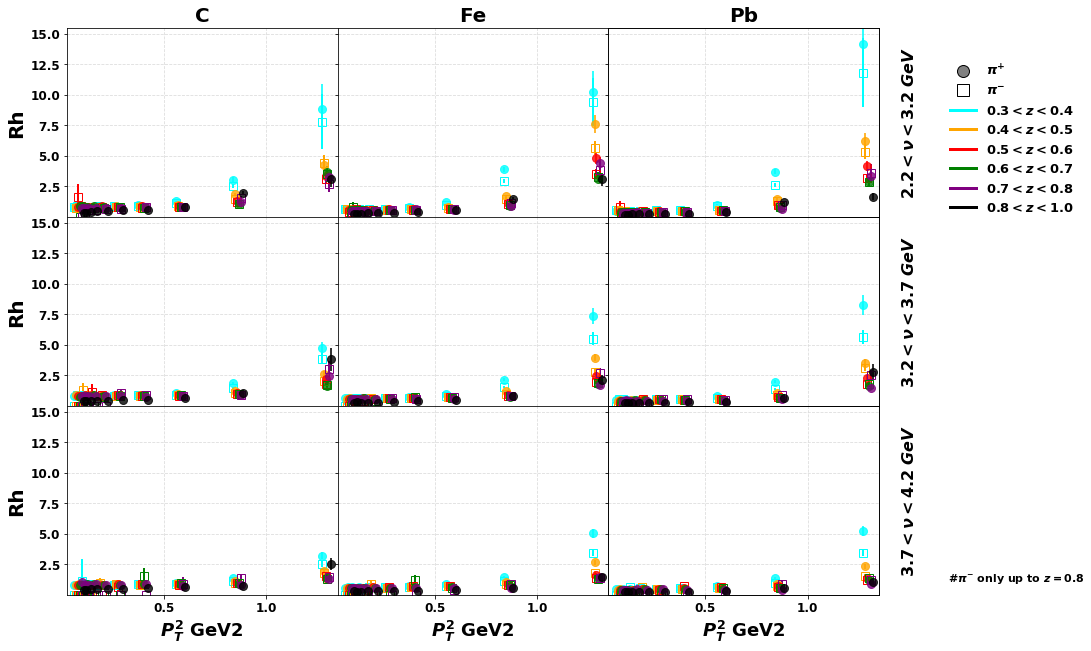

In [83]:
fig, axs = plt.subplots(3, 3,sharex=True, sharey=True,figsize=(16,9),gridspec_kw={'hspace': 0, 'wspace':0})
color_list = plt.cm.tab20c(np.linspace(0, 1, 5))

zlabel = {} 
zlabel['bin_4'] = '$0.3<z<0.4$' 
zlabel['bin_5'] = '$0.4<z<0.5$' 
zlabel['bin_6'] = '$0.5<z<0.6$' 
zlabel['bin_7'] = '$0.6<z<0.7$' 
zlabel['bin_8'] = '$0.7<z<0.8$' 
zlabel['bin_9'] = '$0.8<z<1.0$' 

nulabel2 = {} 
nulabel2['bin_1'] =  r'Rh' 
nulabel2['bin_2'] =  r'Rh' 
nulabel2['bin_3'] =  r'Rh' 

nulabel = {} 
nulabel['bin_1'] = r'C' 
nulabel['bin_2'] =  r'Fe' 
nulabel['bin_3'] =  r'Pb'

colors = {}
colors['bin_4'] = 'cyan'
colors['bin_5'] = 'orange'
colors['bin_6']=  'red'
colors['bin_7'] = 'green'
colors['bin_8'] = 'purple'
colors['bin_9']=  'black'


marker = {}
marker['bin_1'] = 'full'
marker['bin_2'] = 'none'
marker['bin_3'] = 'full'
transp_alpha = 0.8 
sysError=0.05
shiftx=0.009
for nubin in range(1,4):
    for zbin in range(4,10):
        skip = 200 ## meaningless here
        if(nubin==3): 
            skip = 300 ## meaningless here
        y=ydata2
        x=xdata2
        erry=erry2
        if True:
            ibin = 'pip_zh_%ibin_nu_%ibin'%(zbin,nubin)
            key = 'C_'+ibin

            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
    
            axs[nubin-1,0].errorbar(x[key]+shiftx*(zbin),y[key],yerr=totalerror,color=colors['bin_%i'%zbin],
                                    fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                    ms=8,label=nulabel['bin_%i'%nubin], ls='')
            key = 'Fe_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,1].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,color=colors['bin_%i'%zbin],
                                    fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                    ms=8,label=nulabel['bin_%i'%nubin], ls='')
            key = 'Pb_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,2].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,color=colors['bin_%i'%zbin],
                                    fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                    ms=8,label=nulabel['bin_%i'%nubin], ls='')
        #pi minus
        if zbin!=9:
            ibin = 'pim_zh_%ibin_nu_%ibin'%(zbin,nubin)
            key = 'C_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            #print(totalerror)
            axs[nubin-1,0].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,
                                    color=colors['bin_%i'%zbin],fmt='s',fillstyle=marker['bin_2'],
                                    lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin], ls='')
            
            key = 'Fe_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,1].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,
                                    color=colors['bin_%i'%zbin],fmt='s',fillstyle=marker['bin_2'],
                                    lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin], ls='')
            key = 'Pb_'+ibin

            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,2].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,
                                    color=colors['bin_%i'%zbin],fmt='s',fillstyle=marker['bin_2'],
                                    lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin], ls='')
    
        axs[2,nubin-1].xaxis.set_label_text('$P_{T}^{2}$ GeV2',fontsize=18, fontweight='bold')
        axs[0,nubin-1].set_ylim([0.001,15.5])
        axs[1,nubin-1].set_ylim([0.001,15.5])
        
        
        axs[0,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[1,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[2,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[0,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        axs[1,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        axs[2,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        
        axs[0,nubin-1].set_xlim([0.025,1.35])
        #axs[0,nubin-1].set_xticks(np.arange(0,1.5,0.2))
        #axs[0,nubin-1].set_yticks(np.arange(0,2.5,0.25))

    #axs[q2bin-1].legend(loc='best',ncol=3,frameon=False,fontsize=15)
    axs[0,nubin-1].set_title(nulabel['bin_%i'%nubin],fontsize=20, fontweight='bold')

from matplotlib.lines import Line2D
from matplotlib.patches import Patch
h32, = axs[0,0].plot([], ls='none', marker='v', fillstyle='full',
              ms=12, mec='black', mfc='gray', mew=1, alpha=1.0)
h3, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='gray', mew=1, alpha=1.0)

h4, = axs[0,0].plot([], ls='none', marker='s', fillstyle='none',
              ms=12, mec='black', mfc='white', mew=1, alpha=1.0)

h5, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='black', mew=1, alpha=1.0)

handles = [ h3,h4,Line2D([0], [0], color=colors['bin_4'], lw=3),
                Line2D([0], [0], color=colors['bin_5'], lw=3),
                Line2D([0], [0], color=colors['bin_6'], lw=3) ,
          Line2D([0], [0], color=colors['bin_7'], lw=3),
                Line2D([0], [0], color=colors['bin_8'], lw=3),
                Line2D([0], [0], color=colors['bin_9'], lw=3) ]

handles = [handles[i] for i in [0,1,2,3,4,5,6,7]]
line_labels =[r'$\pi^{+}$' , r'$\pi^{-}$', r'$0.3<z<0.4$',
              r'$0.4<z<0.5$',r'$0.5<z<0.6$',r'$0.6<z<0.7$',r'$0.7<z<0.8$',r'$0.8<z<1.0$' ]
fig.legend(handles=handles,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=1,    # Small spacing around legend box
           title='\n' , # Title for the legend
           frameon=False,
           fontsize=13
          )

plt.subplots_adjust(right=0.83,top=1)
for i in range(0,3):
    axs[i,0].tick_params(axis='y', which='major', labelsize=12)
    axs[2,i].tick_params(axis='both', which='major', labelsize=12)
nulabel3 = {} 
nulabel3['bin_1'] = r'$2.2<\nu<3.2$ $GeV$' 
nulabel3['bin_2'] =  r'$3.2<\nu<3.7$ $GeV$'  
nulabel3['bin_3'] =  r'$3.7<\nu<4.2$ $GeV$'  

ax01 = axs[0,2].twinx()
ax01.tick_params(axis='y', colors='red')  
ax01.yaxis.set_label_text('\n' + nulabel3['bin_1'] ,fontsize=16, color='black')
ax01.set_ylim([3.2,2.21])
ax01.set_yticks(np.arange(3.2,2.21,1))
ax02 = axs[1,2].twinx()
ax02.tick_params(axis='y', colors='red')  
ax02.yaxis.set_label_text( '\n' + nulabel3['bin_2'] ,fontsize=16, color='black')
ax02.set_ylim([3.2,2.21])
ax02.set_yticks(np.arange(3.2,2.21,1))

ax03 = axs[2,2].twinx()
ax03.tick_params(axis='y', colors='red')  
ax03.yaxis.set_label_text('\n' + nulabel3['bin_3'] ,fontsize=16, color='black')
ax03.set_ylim([3.2,2.21])
ax03.set_yticks(np.arange(3.2,2.21,1))
fig.text(0.89, 0.15, '#$\pi^{-}$ only up to $z=0.8$', fontsize=11, va='center')

axs[0,0].yaxis.set_label_text(nulabel2['bin_1'],fontsize=20, fontweight='bold')
axs[1,0].yaxis.set_label_text(nulabel2['bin_2'],fontsize=20, fontweight='bold')
axs[2,0].yaxis.set_label_text(nulabel2['bin_3'],fontsize=20, fontweight='bold')
#axs[0,0].set_yscale('log')
plt.savefig('3D_chargedPions_Cronin_NOTE_Binning.pdf', bbox_inches='tight')
#plt.savefig('test.png', bbox_inches='tight')

**Checking the effect of the cut in the errors ($\omega$ and $\delta\omega$)**

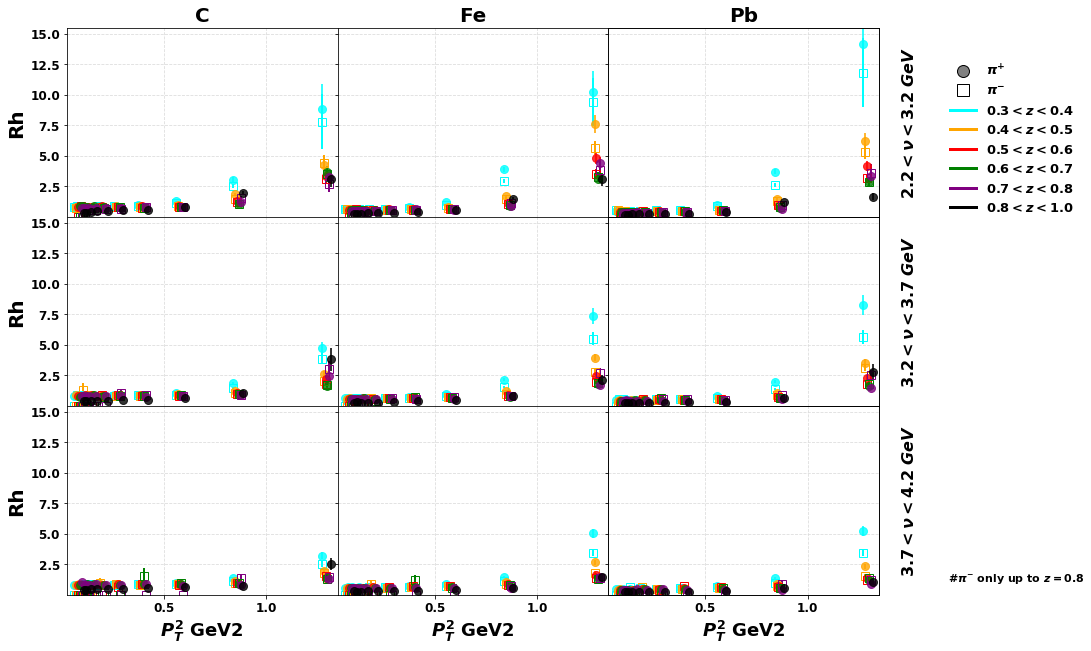

In [85]:
file_pip_nu_dep2 = TFile.Open('NOTE_errCut_bin_Pt2_MR_pip.root')
file_pim_nu_dep2 = TFile.Open('NOTE_errCut_bin_Pt2_MR_pim.root')

ydata2 = {}
xdata2 = {} 
erry2={}
for nubin in range(1,4):
    for zbin in range (4,10):
        data2 = file_pip_nu_dep2.Get('g_zh_%i_C_nu_%i'%(zbin,nubin))
        #print('g_zh_%i_C_nu_%i'%(zbin, nubin))
        #print('data type is :', zbin , type(data))
        ydata2['C_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetY(),copy=True)
        xdata2['C_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetX(),copy=True)
        erry2['C_pip_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data2.GetEY(),copy=True)

        data2 = file_pip_nu_dep2.Get('g_zh_%i_Fe_nu_%i'%(zbin, nubin))
        ydata2['Fe_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetY(),copy=True)
        xdata2['Fe_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetX(),copy=True)
        erry2['Fe_pip_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data2.GetEY(),copy=True)
        
        data2 = file_pip_nu_dep2.Get('g_zh_%i_Pb_nu_%i'%(zbin, nubin))
        ydata2['Pb_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetY(),copy=True)
        xdata2['Pb_pip_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetX(),copy=True)
        erry2['Pb_pip_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data2.GetEY(),copy=True)
        ## Pi MINUS
        data2 = file_pim_nu_dep2.Get('g_zh_%i_C_nu_%i'%(zbin, nubin))
        ydata2['C_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetY(),copy=True)
        xdata2['C_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetX(),copy=True)
        erry2['C_pim_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data2.GetEY(),copy=True)

        data2 = file_pim_nu_dep2.Get('g_zh_%i_Fe_nu_%i'%(zbin, nubin))
        ydata2['Fe_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetY(),copy=True)
        xdata2['Fe_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetX(),copy=True)
        erry2['Fe_pim_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data2.GetEY(),copy=True)
        
        data2 = file_pim_nu_dep2.Get('g_zh_%i_Pb_nu_%i'%(zbin, nubin))
        ydata2['Pb_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetY(),copy=True)
        xdata2['Pb_pim_zh_%ibin_nu_%ibin'%(zbin,nubin)] =  np.array(data2.GetX(),copy=True)
        erry2['Pb_pim_zh_%ibin_nu_%ibin'%(zbin ,nubin)] =  np.array(data2.GetEY(),copy=True)


fig, axs = plt.subplots(3, 3,sharex=True, sharey=True,figsize=(16,9),gridspec_kw={'hspace': 0, 'wspace':0})
color_list = plt.cm.tab20c(np.linspace(0, 1, 5))

zlabel = {} 
zlabel['bin_4'] = '$0.3<z<0.4$' 
zlabel['bin_5'] = '$0.4<z<0.5$' 
zlabel['bin_6'] = '$0.5<z<0.6$' 
zlabel['bin_7'] = '$0.6<z<0.7$' 
zlabel['bin_8'] = '$0.7<z<0.8$' 
zlabel['bin_9'] = '$0.8<z<1.0$' 

nulabel2 = {} 
nulabel2['bin_1'] =  r'Rh' 
nulabel2['bin_2'] =  r'Rh' 
nulabel2['bin_3'] =  r'Rh' 

nulabel = {} 
nulabel['bin_1'] = r'C' 
nulabel['bin_2'] =  r'Fe' 
nulabel['bin_3'] =  r'Pb'

colors = {}
colors['bin_4'] = 'cyan'
colors['bin_5'] = 'orange'
colors['bin_6']=  'red'
colors['bin_7'] = 'green'
colors['bin_8'] = 'purple'
colors['bin_9']=  'black'


marker = {}
marker['bin_1'] = 'full'
marker['bin_2'] = 'none'
marker['bin_3'] = 'full'
transp_alpha = 0.8 
sysError=0.05
shiftx=0.009
for nubin in range(1,4):
    for zbin in range(4,10):
        skip = 200 ## meaningless here
        if(nubin==3): 
            skip = 300 ## meaningless here
        y=ydata2
        x=xdata2
        erry=erry2
        if True:
            ibin = 'pip_zh_%ibin_nu_%ibin'%(zbin,nubin)
            key = 'C_'+ibin

            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
    
            axs[nubin-1,0].errorbar(x[key]+shiftx*(zbin),y[key],yerr=totalerror,color=colors['bin_%i'%zbin],
                                    fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                    ms=8,label=nulabel['bin_%i'%nubin], ls='')
            key = 'Fe_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,1].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,color=colors['bin_%i'%zbin],
                                    fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                    ms=8,label=nulabel['bin_%i'%nubin], ls='')
            key = 'Pb_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,2].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,color=colors['bin_%i'%zbin],
                                    fmt='o',fillstyle=marker['bin_1'],lw=2,alpha=transp_alpha,
                                    ms=8,label=nulabel['bin_%i'%nubin], ls='')
        #pi minus
        if zbin!=9:
            ibin = 'pim_zh_%ibin_nu_%ibin'%(zbin,nubin)
            key = 'C_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            #print(totalerror)
            axs[nubin-1,0].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,
                                    color=colors['bin_%i'%zbin],fmt='s',fillstyle=marker['bin_2'],
                                    lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin], ls='')
            
            key = 'Fe_'+ibin
            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,1].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,
                                    color=colors['bin_%i'%zbin],fmt='s',fillstyle=marker['bin_2'],
                                    lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin], ls='')
            key = 'Pb_'+ibin

            totalerror = np.sqrt(np.power(np.array(erry[key]),2) + np.power(np.array(y[key])*sysError,2))
            axs[nubin-1,2].errorbar(x[key]+shiftx*zbin,y[key],yerr=totalerror,
                                    color=colors['bin_%i'%zbin],fmt='s',fillstyle=marker['bin_2'],
                                    lw=2,alpha=transp_alpha+0.2,ms=8,label=nulabel['bin_%i'%nubin], ls='')
    
        axs[2,nubin-1].xaxis.set_label_text('$P_{T}^{2}$ GeV2',fontsize=18, fontweight='bold')
        axs[0,nubin-1].set_ylim([0.001,15.5])
        axs[1,nubin-1].set_ylim([0.001,15.5])
        
        
        axs[0,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[1,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[2,nubin-1].grid(True, axis='y',color='gainsboro', linestyle='dashed')
        axs[0,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        axs[1,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        axs[2,nubin-1].grid(True, axis='x',color='gainsboro', linestyle='dashed')
        
        axs[0,nubin-1].set_xlim([0.025,1.35])
        #axs[0,nubin-1].set_xticks(np.arange(0,1.5,0.2))
        #axs[0,nubin-1].set_yticks(np.arange(0,2.5,0.25))

    #axs[q2bin-1].legend(loc='best',ncol=3,frameon=False,fontsize=15)
    axs[0,nubin-1].set_title(nulabel['bin_%i'%nubin],fontsize=20, fontweight='bold')

from matplotlib.lines import Line2D
from matplotlib.patches import Patch
h32, = axs[0,0].plot([], ls='none', marker='v', fillstyle='full',
              ms=12, mec='black', mfc='gray', mew=1, alpha=1.0)
h3, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='gray', mew=1, alpha=1.0)

h4, = axs[0,0].plot([], ls='none', marker='s', fillstyle='none',
              ms=12, mec='black', mfc='white', mew=1, alpha=1.0)

h5, = axs[0,0].plot([], ls='none', marker='o', fillstyle='full',
              ms=12, mec='black', mfc='black', mew=1, alpha=1.0)

handles = [ h3,h4,Line2D([0], [0], color=colors['bin_4'], lw=3),
                Line2D([0], [0], color=colors['bin_5'], lw=3),
                Line2D([0], [0], color=colors['bin_6'], lw=3) ,
          Line2D([0], [0], color=colors['bin_7'], lw=3),
                Line2D([0], [0], color=colors['bin_8'], lw=3),
                Line2D([0], [0], color=colors['bin_9'], lw=3) ]

handles = [handles[i] for i in [0,1,2,3,4,5,6,7]]
line_labels =[r'$\pi^{+}$' , r'$\pi^{-}$', r'$0.3<z<0.4$',
              r'$0.4<z<0.5$',r'$0.5<z<0.6$',r'$0.6<z<0.7$',r'$0.7<z<0.8$',r'$0.8<z<1.0$' ]
fig.legend(handles=handles,     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=1,    # Small spacing around legend box
           title='\n' , # Title for the legend
           frameon=False,
           fontsize=13
          )

plt.subplots_adjust(right=0.83,top=1)
for i in range(0,3):
    axs[i,0].tick_params(axis='y', which='major', labelsize=12)
    axs[2,i].tick_params(axis='both', which='major', labelsize=12)
nulabel3 = {} 
nulabel3['bin_1'] = r'$2.2<\nu<3.2$ $GeV$' 
nulabel3['bin_2'] =  r'$3.2<\nu<3.7$ $GeV$'  
nulabel3['bin_3'] =  r'$3.7<\nu<4.2$ $GeV$'  

ax01 = axs[0,2].twinx()
ax01.tick_params(axis='y', colors='red')  
ax01.yaxis.set_label_text('\n' + nulabel3['bin_1'] ,fontsize=16, color='black')
ax01.set_ylim([3.2,2.21])
ax01.set_yticks(np.arange(3.2,2.21,1))
ax02 = axs[1,2].twinx()
ax02.tick_params(axis='y', colors='red')  
ax02.yaxis.set_label_text( '\n' + nulabel3['bin_2'] ,fontsize=16, color='black')
ax02.set_ylim([3.2,2.21])
ax02.set_yticks(np.arange(3.2,2.21,1))

ax03 = axs[2,2].twinx()
ax03.tick_params(axis='y', colors='red')  
ax03.yaxis.set_label_text('\n' + nulabel3['bin_3'] ,fontsize=16, color='black')
ax03.set_ylim([3.2,2.21])
ax03.set_yticks(np.arange(3.2,2.21,1))
fig.text(0.89, 0.15, '#$\pi^{-}$ only up to $z=0.8$', fontsize=11, va='center')

axs[0,0].yaxis.set_label_text(nulabel2['bin_1'],fontsize=20, fontweight='bold')
axs[1,0].yaxis.set_label_text(nulabel2['bin_2'],fontsize=20, fontweight='bold')
axs[2,0].yaxis.set_label_text(nulabel2['bin_3'],fontsize=20, fontweight='bold')
#axs[0,0].set_yscale('log')
plt.savefig('3D_chargedPions_Cronin_NOTE_Binning_errCut.pdf', bbox_inches='tight')
#plt.savefig('test.png', bbox_inches='tight')

In [25]:
print(np.logspace(np.log10(0.02),np.log10(1.5),20))

[0.02       0.02510253 0.03150684 0.03954507 0.04963405 0.06229701
 0.07819061 0.09813909 0.12317696 0.15460264 0.19404584 0.24355204
 0.30568858 0.38367778 0.48156408 0.60442375 0.75862815 0.95217416
 1.19509884 1.5       ]


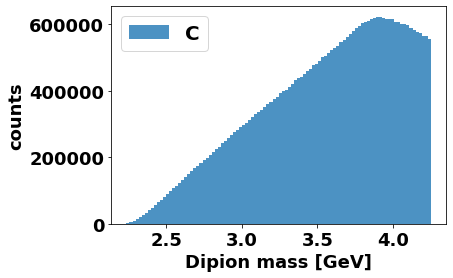

In [36]:
y, x, _ = plt.hist(df['GiBUU_C_hadron'].query('Q2>1 ')['Nu'],alpha=0.8,lw=2,
                       bins=100,  label=target, density=False)

#plt.xlim(10,30)  
#plt.yscale('log')
#plt.xticks(rotation='vertical')
plt.xlabel('Dipion mass [GeV]',fontweight='bold' )
plt.ylabel('counts',fontweight='bold' )
plt.legend()    
plt.show()